In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
np.random.seed(10)

##### Euclidean distance formula
![Euclidean distance](assets/euclidean_distance.svg)

In [3]:
# euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [7]:
class KMeans:
    def __init__(self, K=5, max_iteration=100, plot_steps=False):
        self.K = K
        self.max_iteration = max_iteration
        self.plot_steps = plot_steps
        
        # list of sample indices for each clusters
        self.clusters = [[] for _ in range(self.K)]
        # mean feature vector for each cluster
        self.centroids = []
    
    def predict(self, X):
        self.X = X
        # .shape returns an tuple of array dimensions
        self.n_samples, self.n_features = X.shape
        
        # initilize the centroids
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        
        # optimization
        for _ in range(self.max_iteration):
            
            # update the clusters
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()
            
            # update centroids
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            if self.plot_steps:
                self.plot()
            
            # check if converged
            if self._is_converged(centroids_old, self.centroids):
                break
        
        # return cluster labels
        return self._get_cluster_labels(self.clusters)
    
    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
        
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroids(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    def _closest_centroids(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx
    
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    
    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old, centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
            
        for point in self.centroids:
            ax.scatter(*point, marker='x', color='black', linewidth=2)
        
        plt.show()

(500, 2)
3


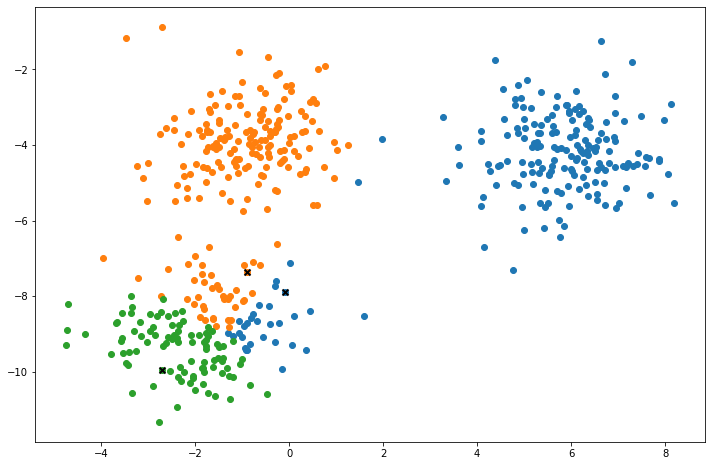

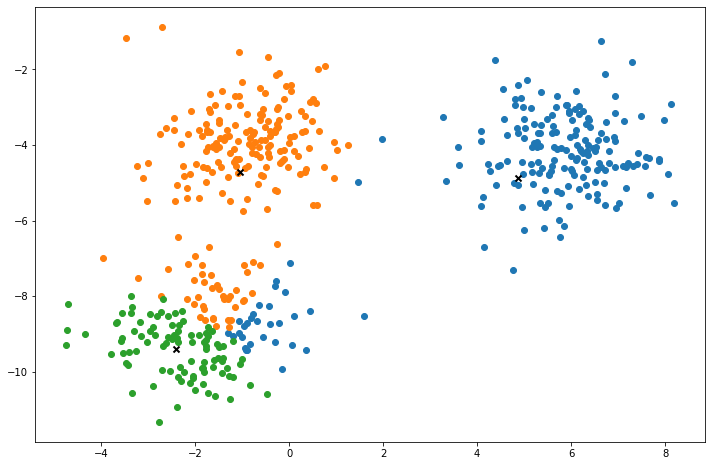

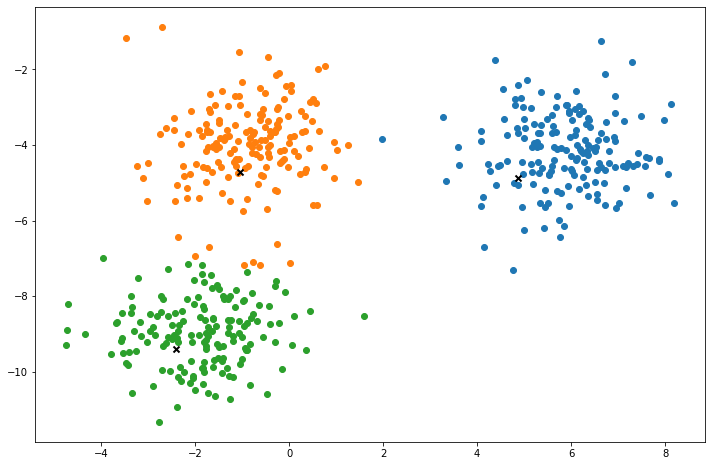

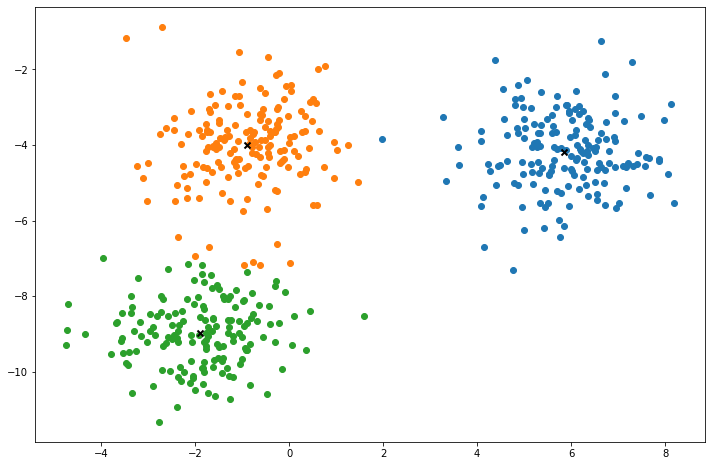

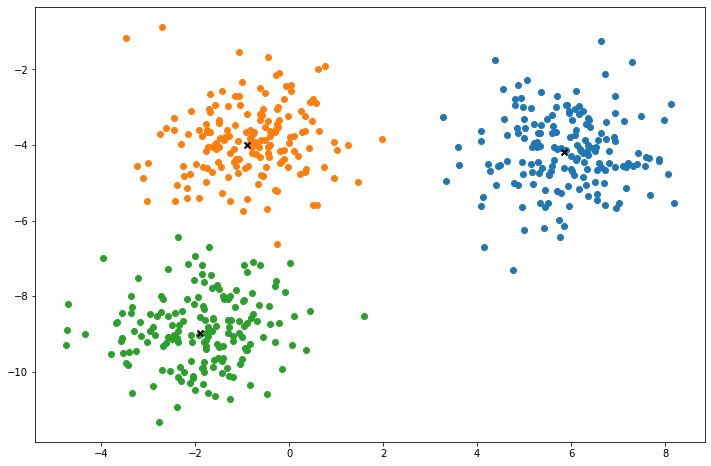

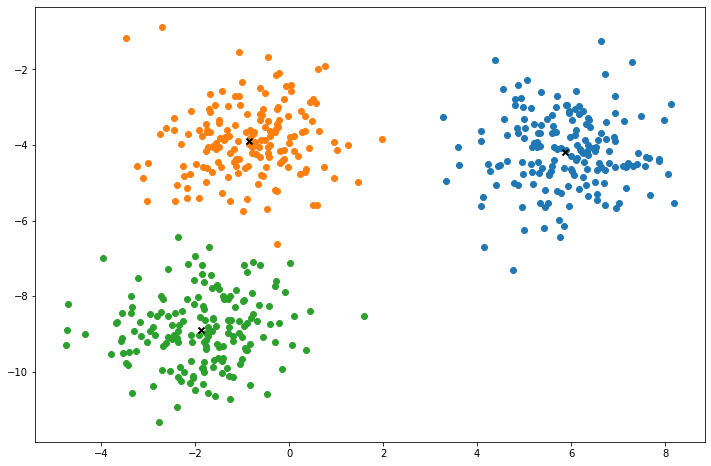

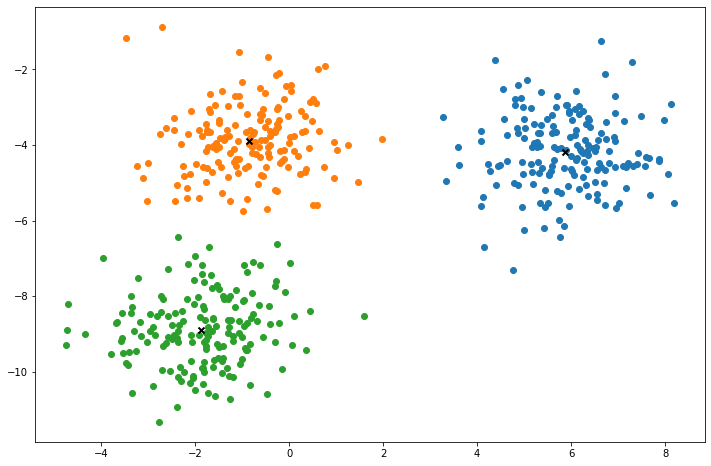

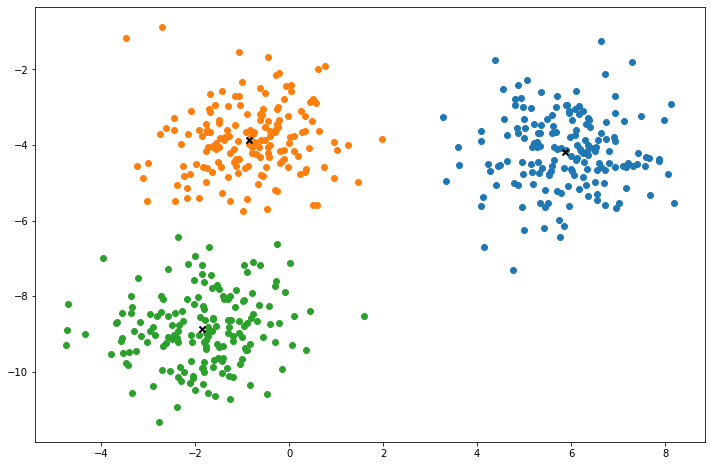

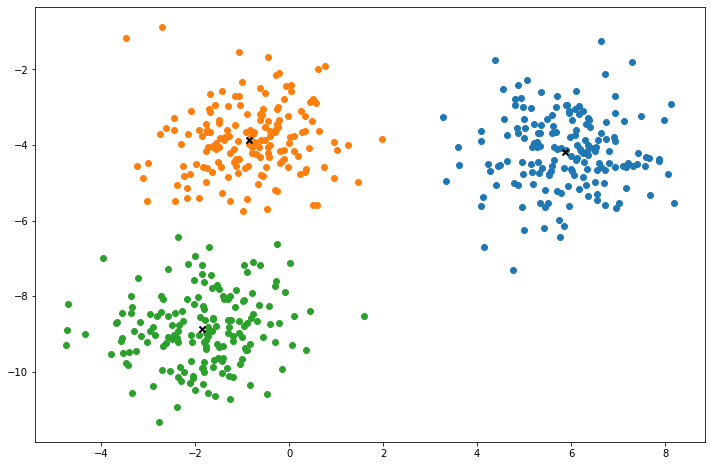

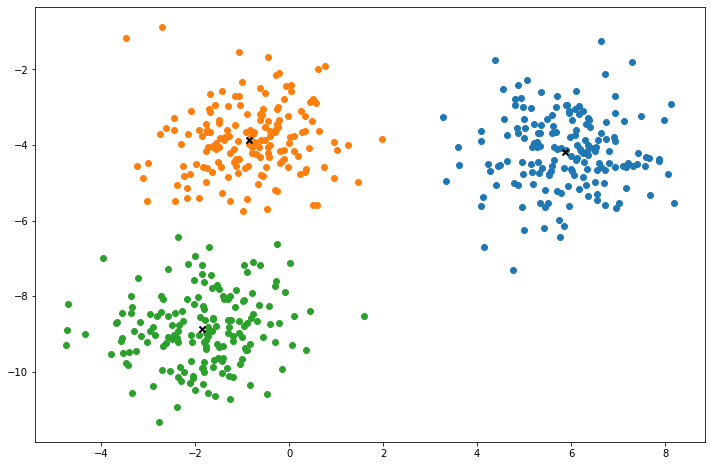

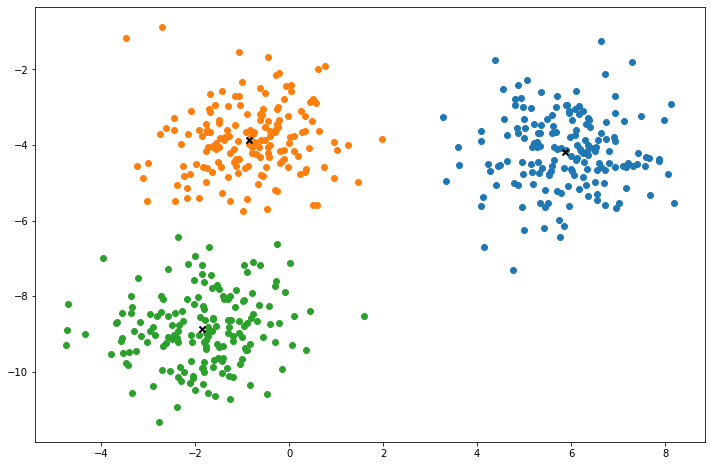

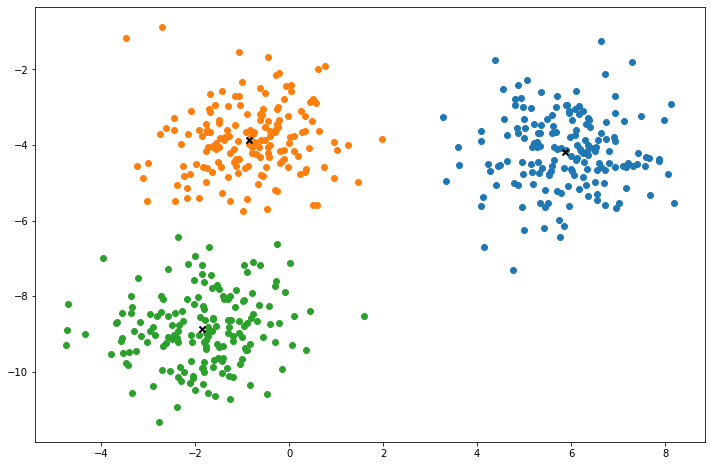

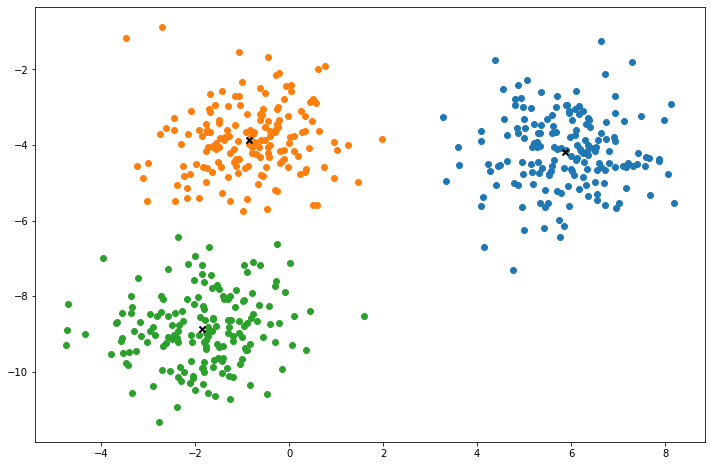

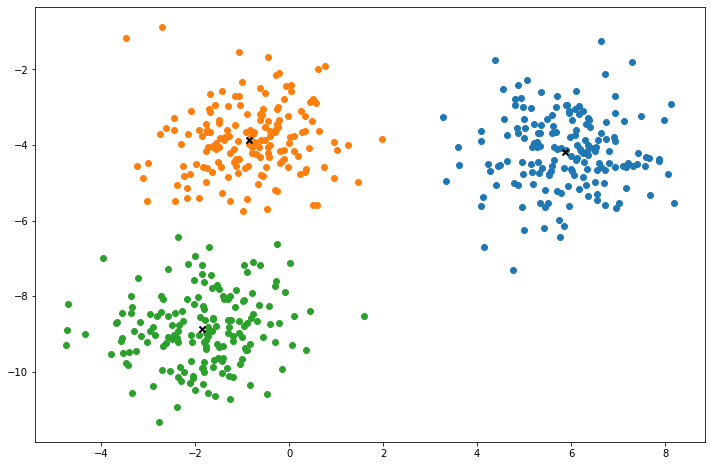

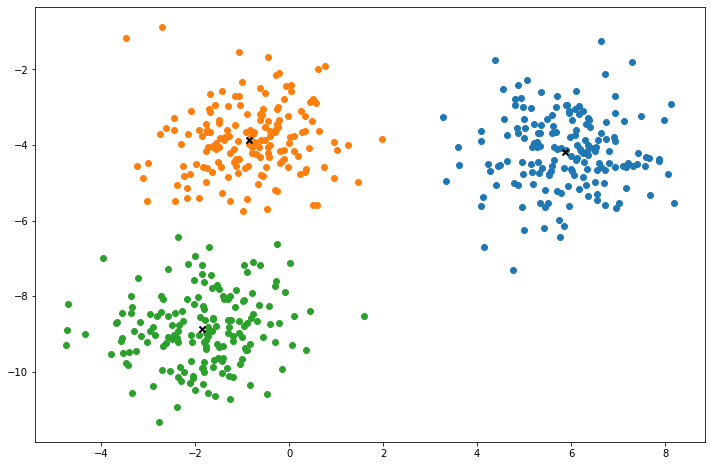

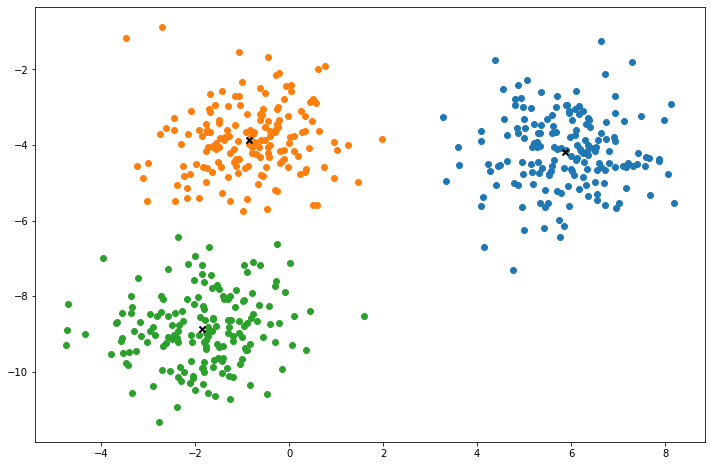

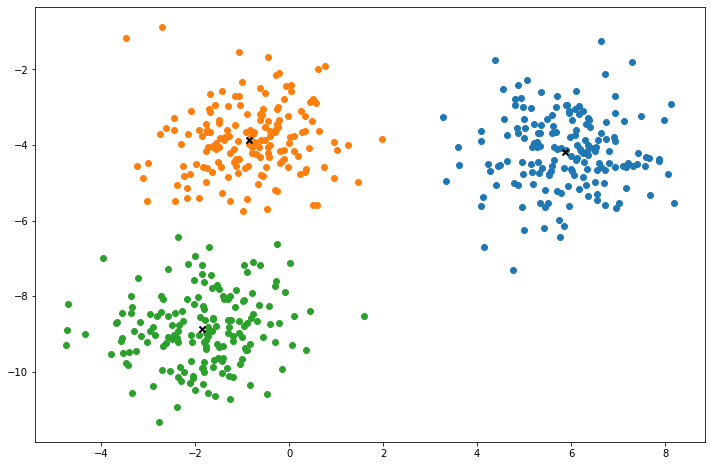

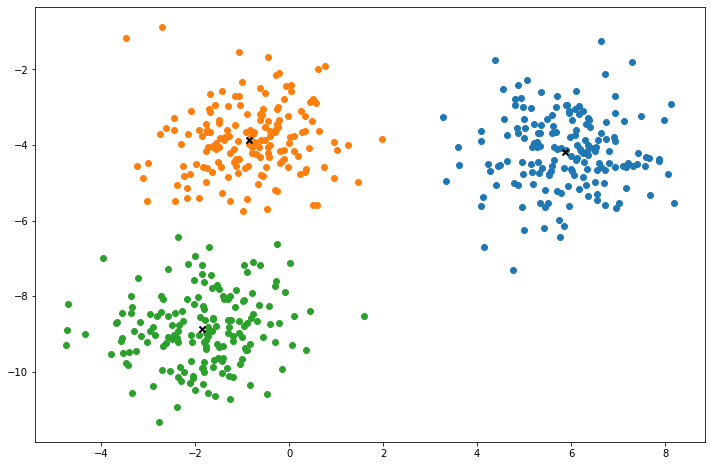

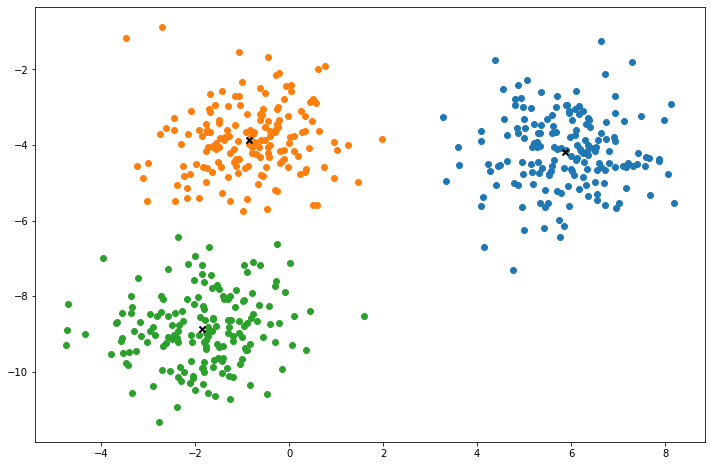

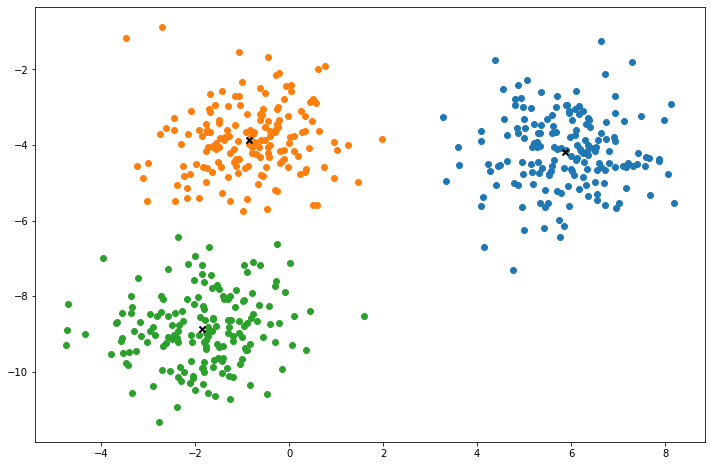

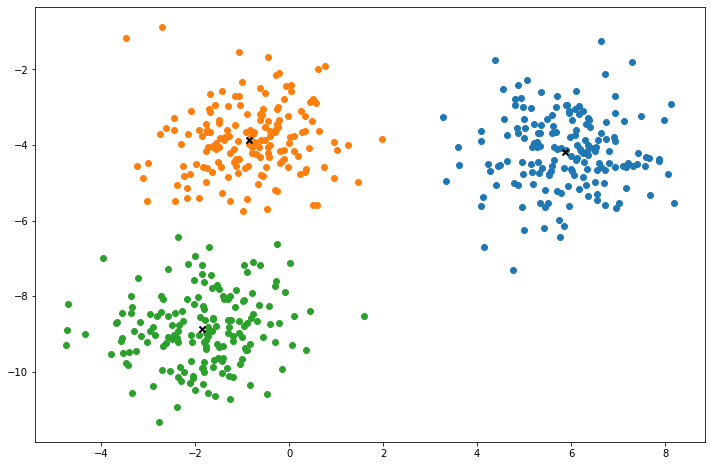

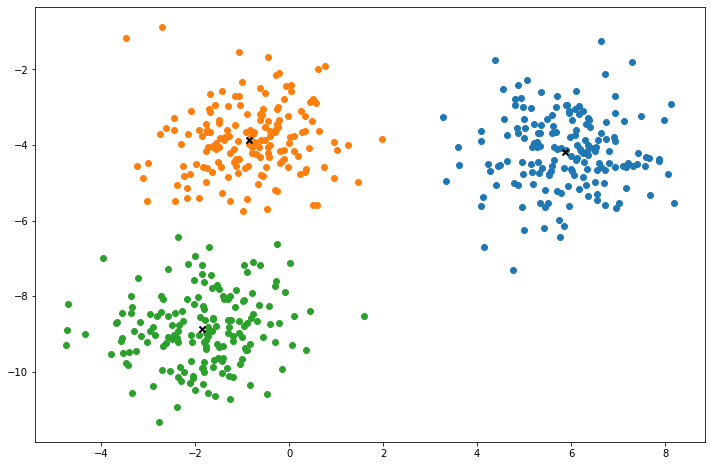

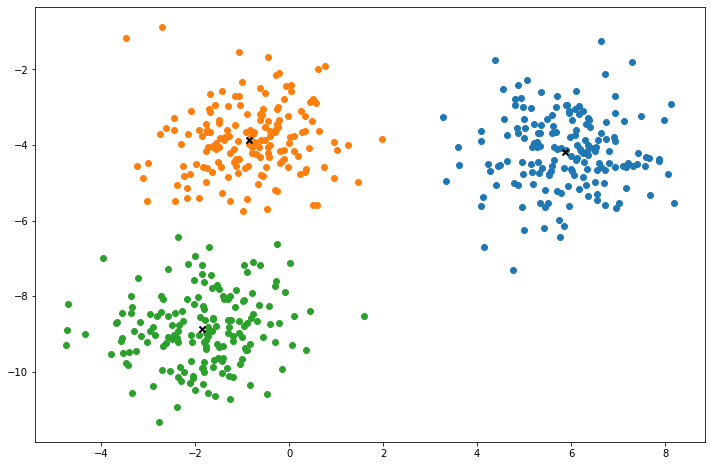

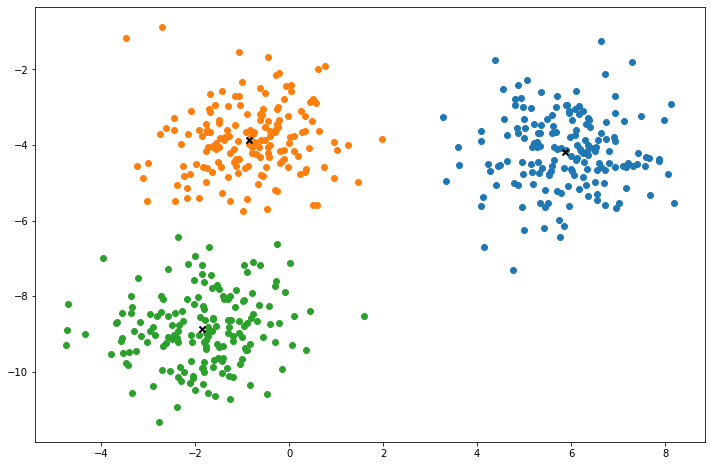

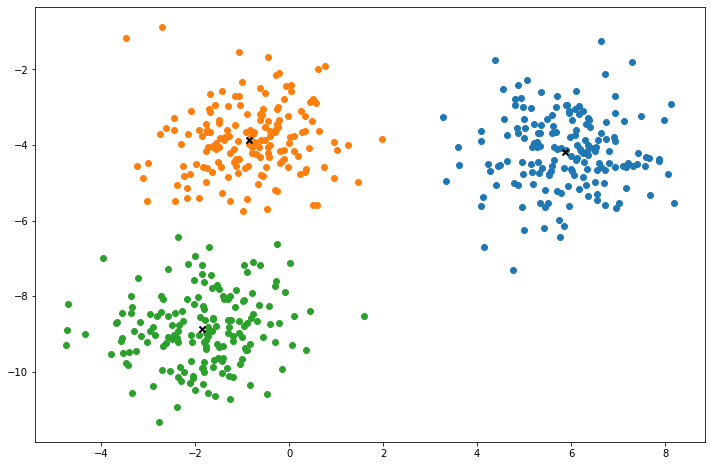

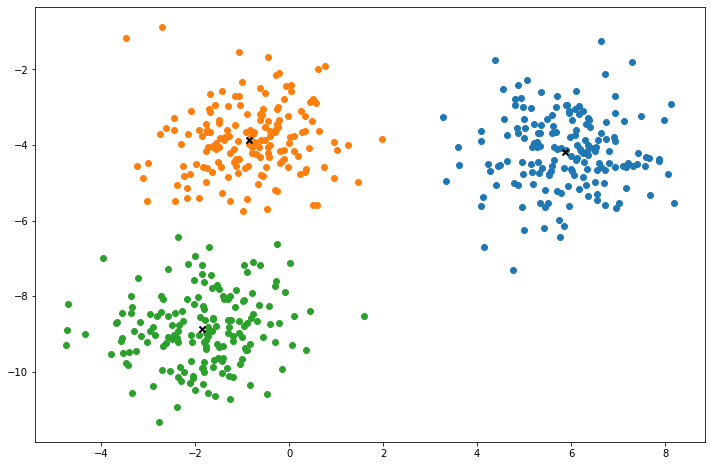

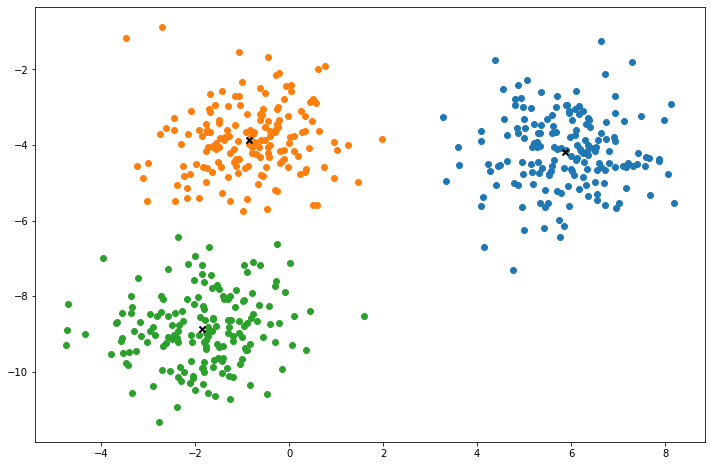

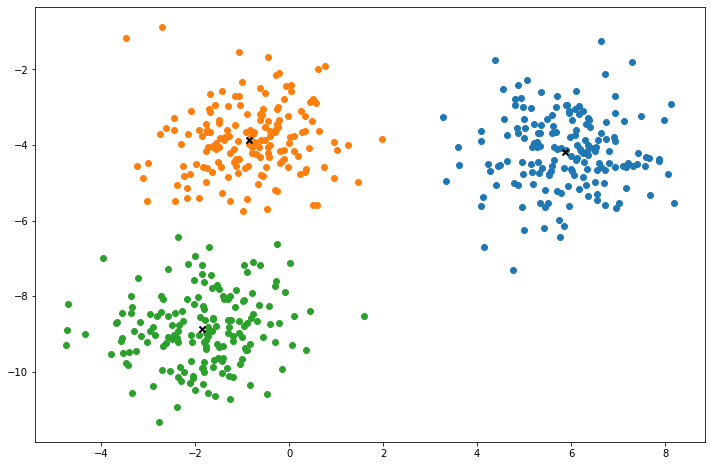

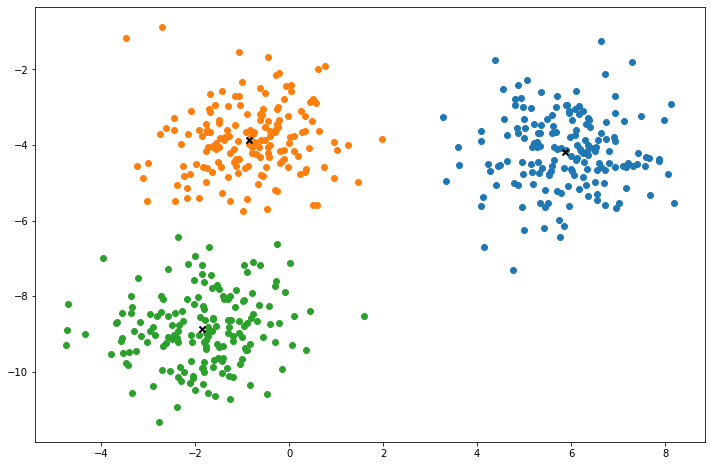

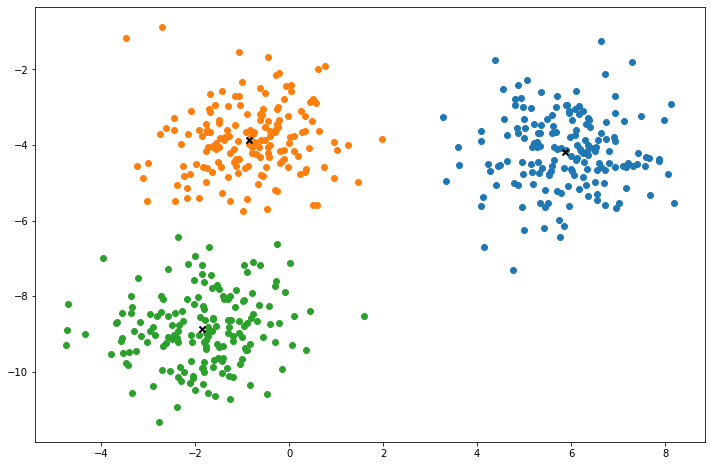

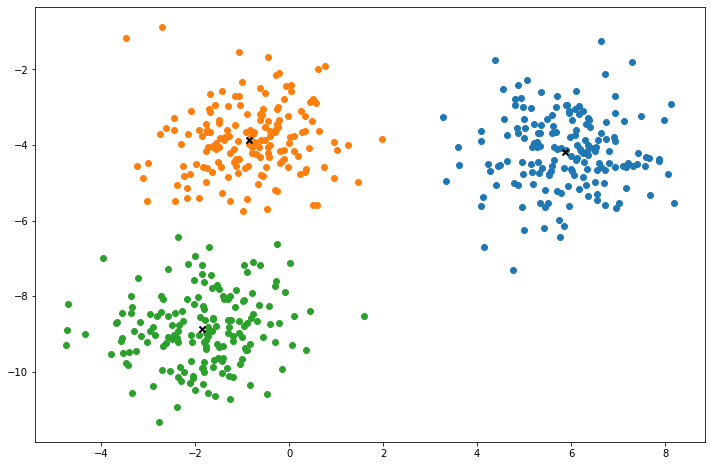

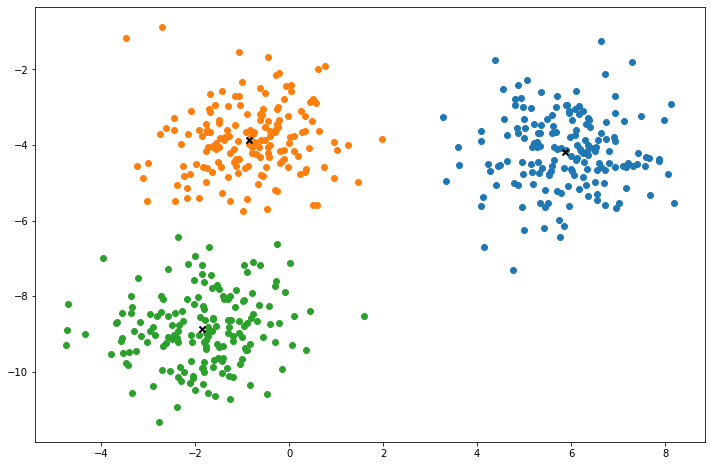

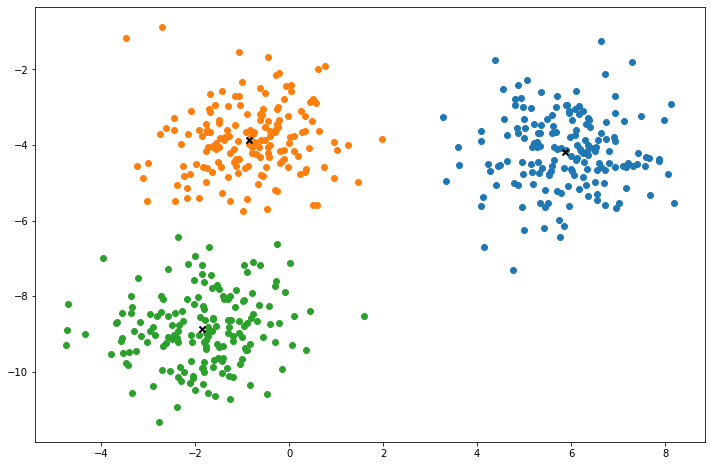

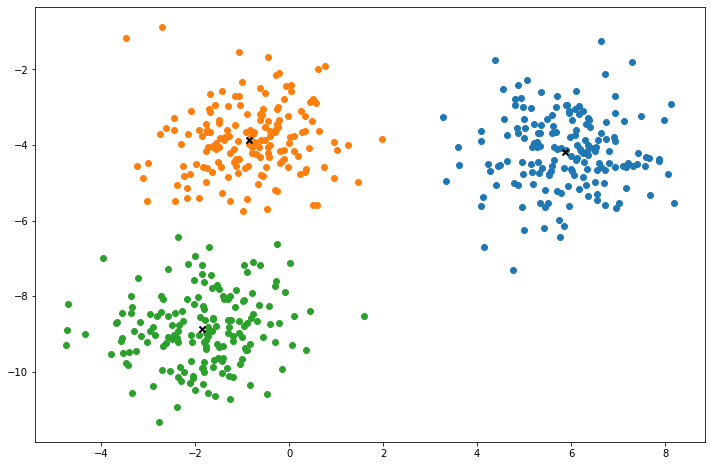

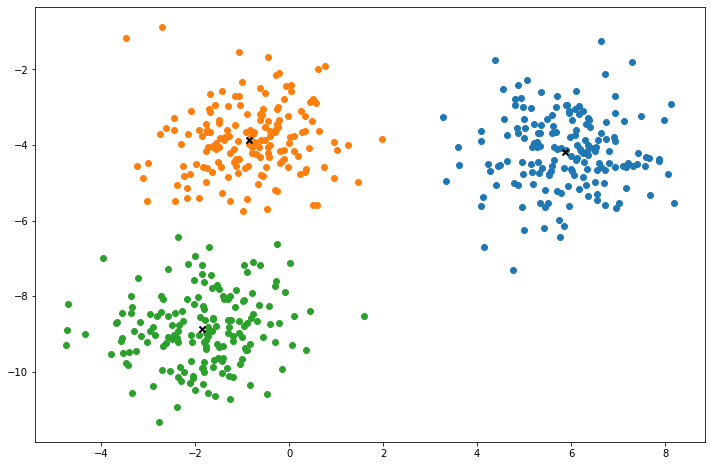

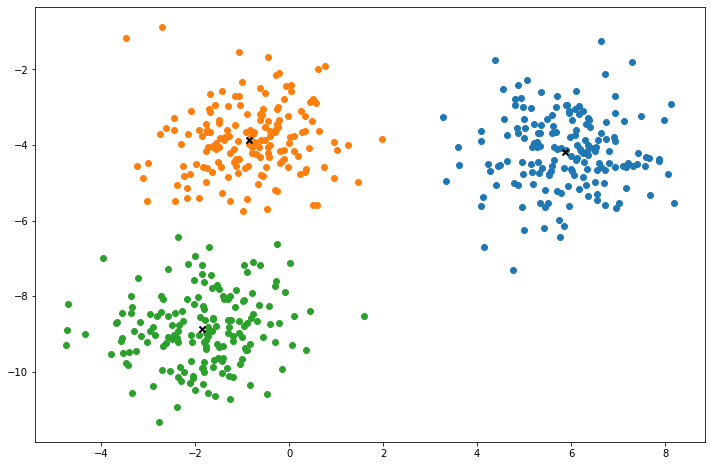

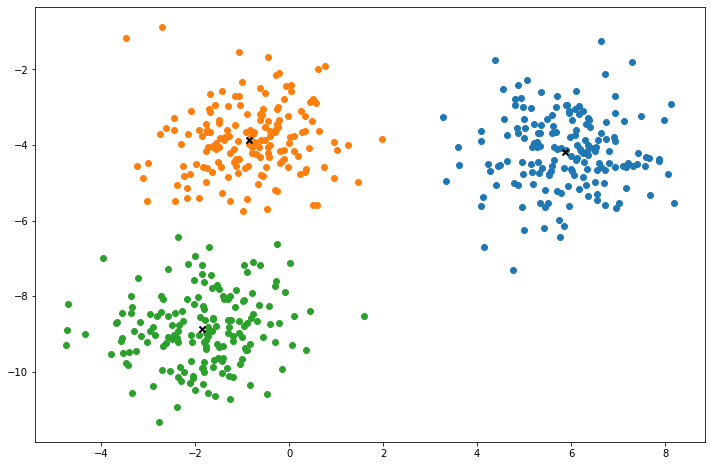

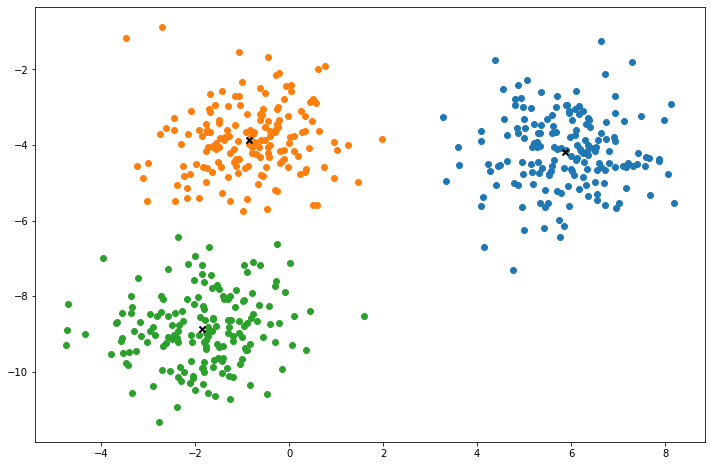

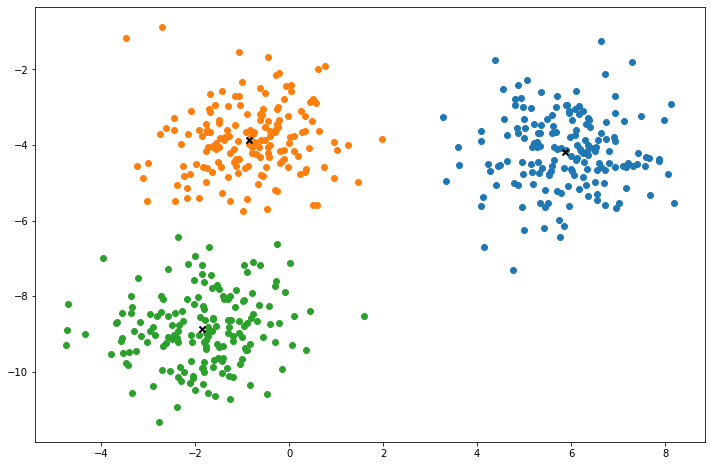

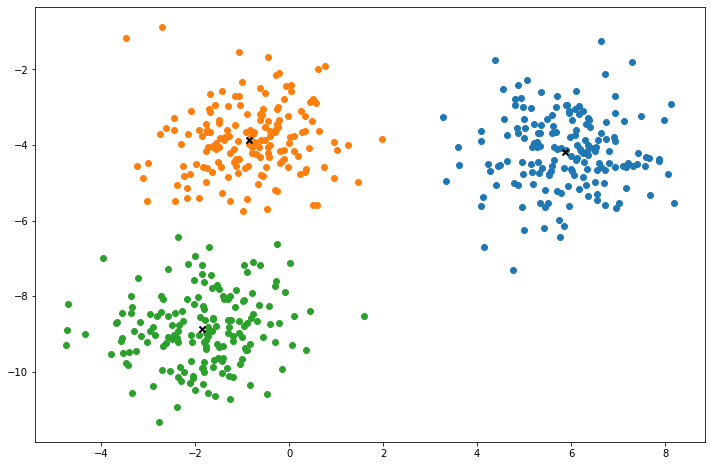

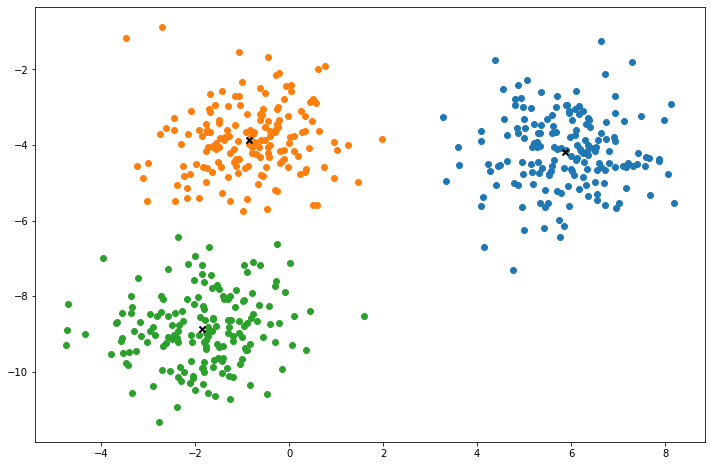

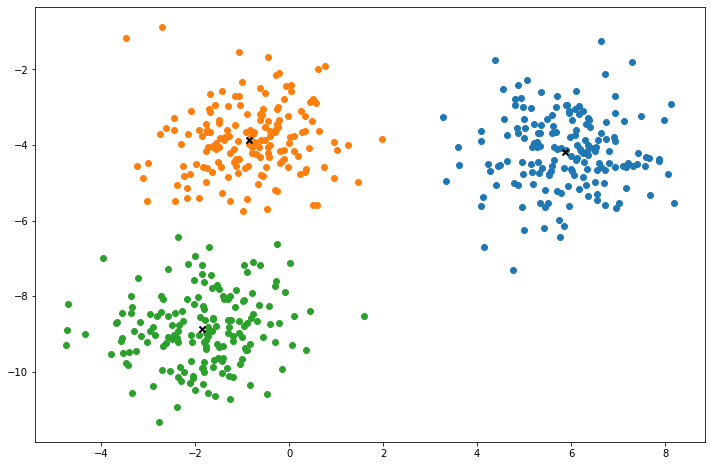

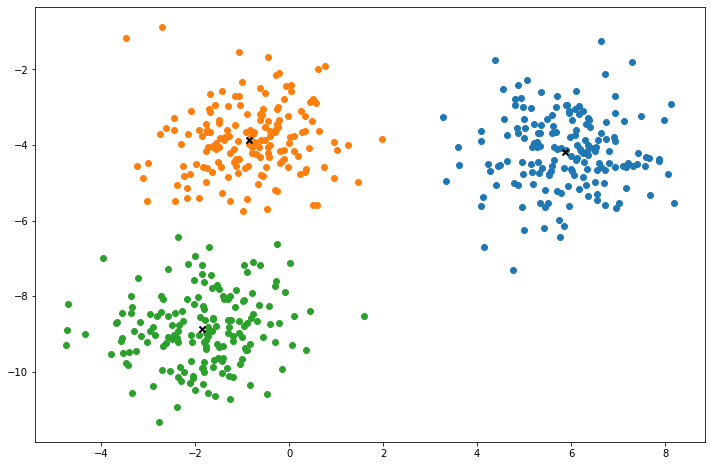

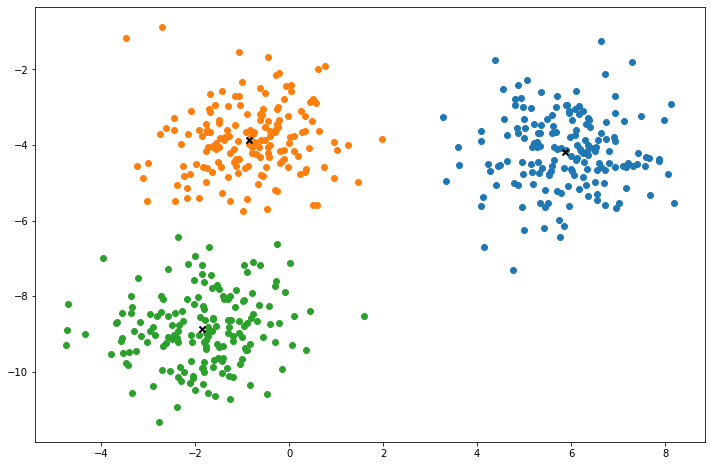

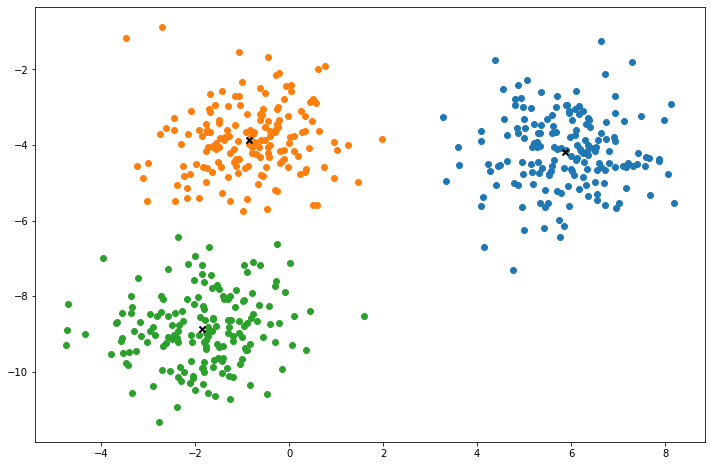

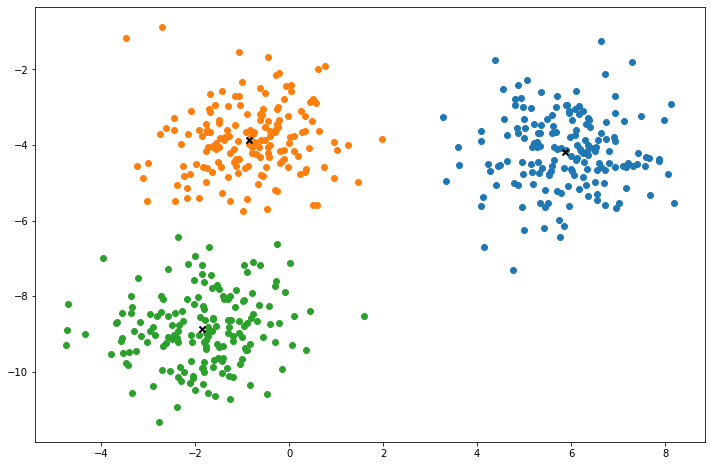

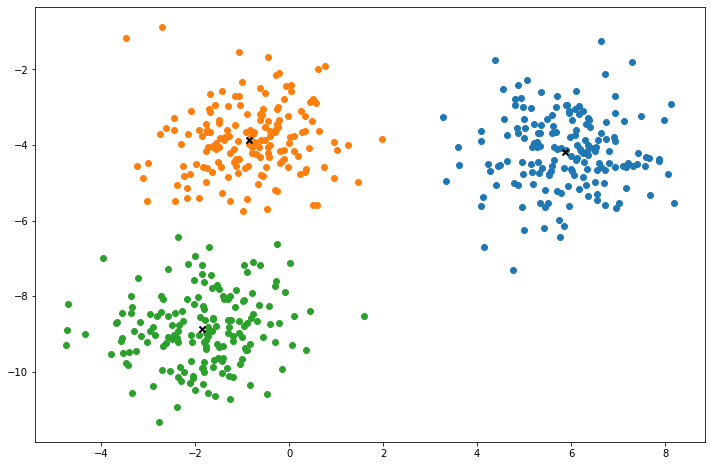

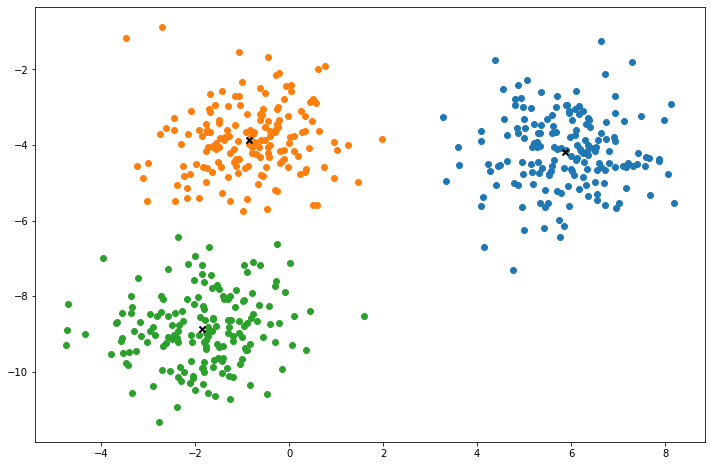

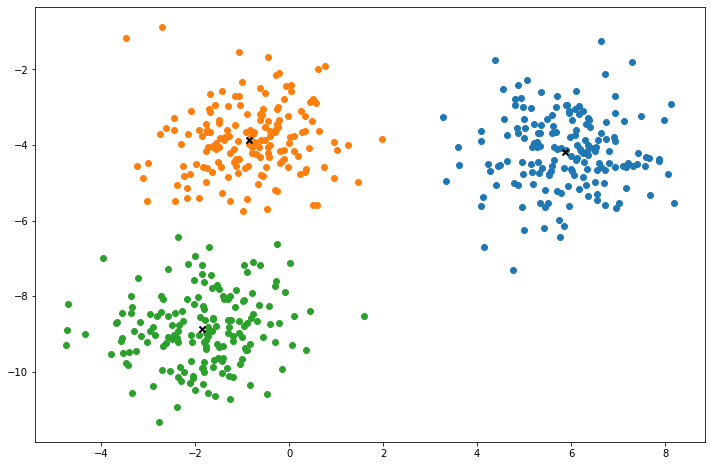

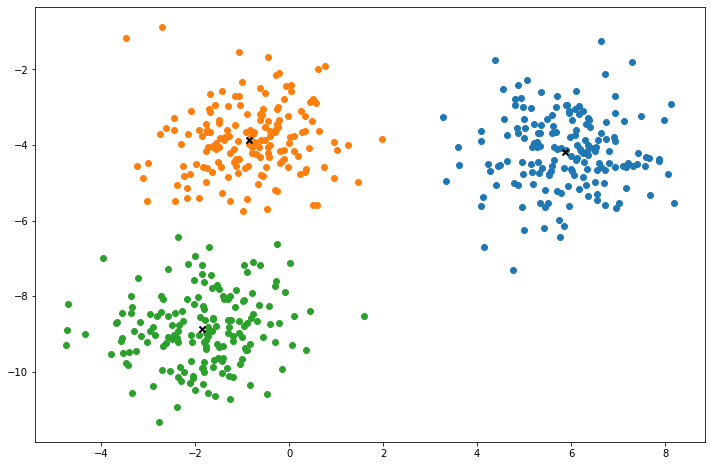

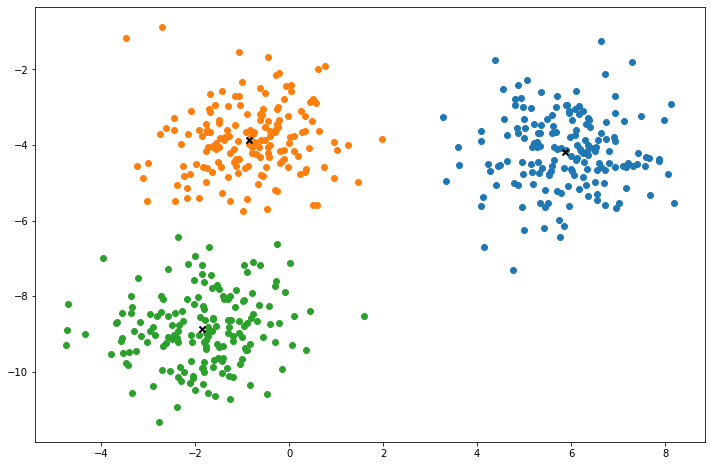

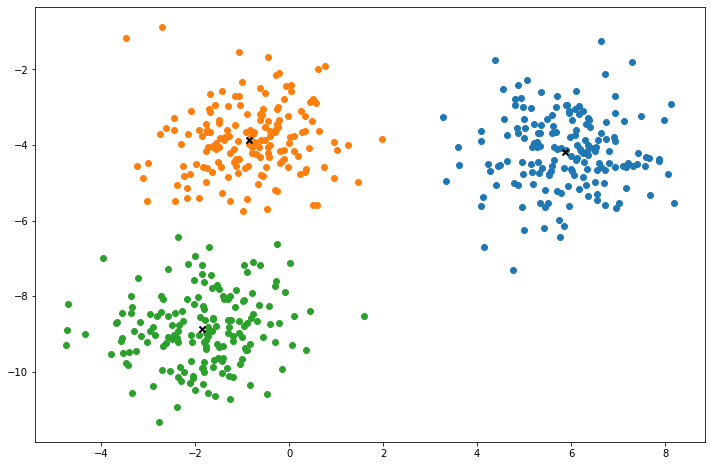

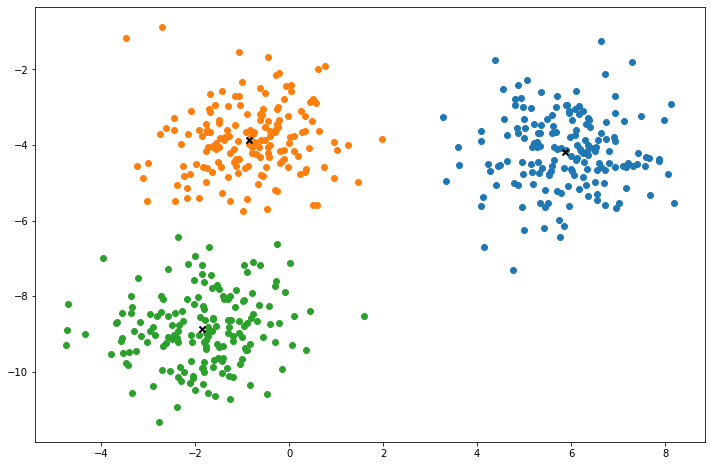

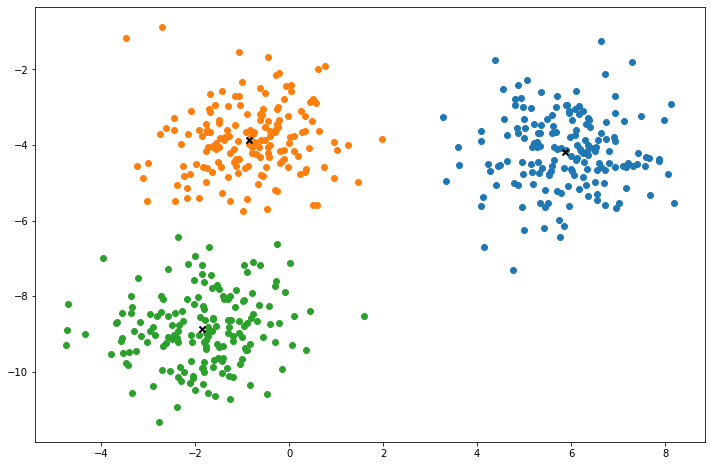

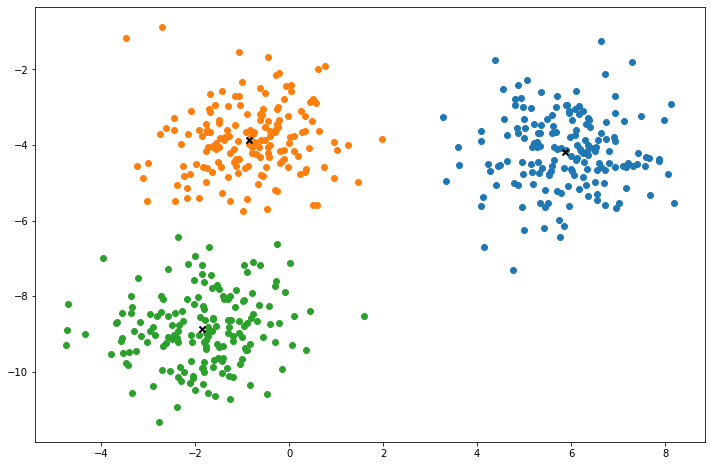

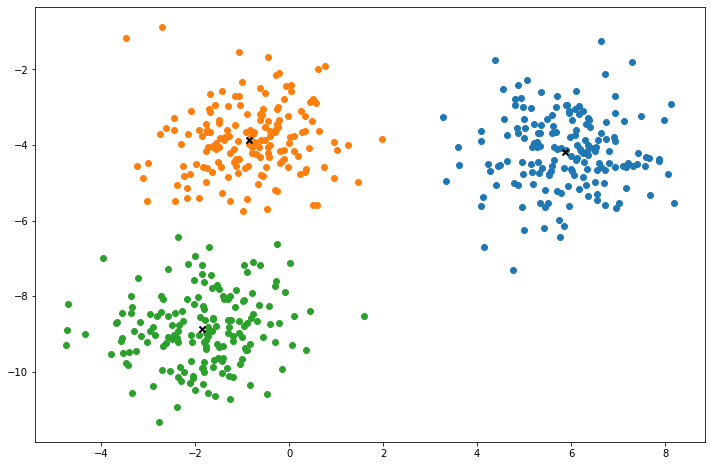

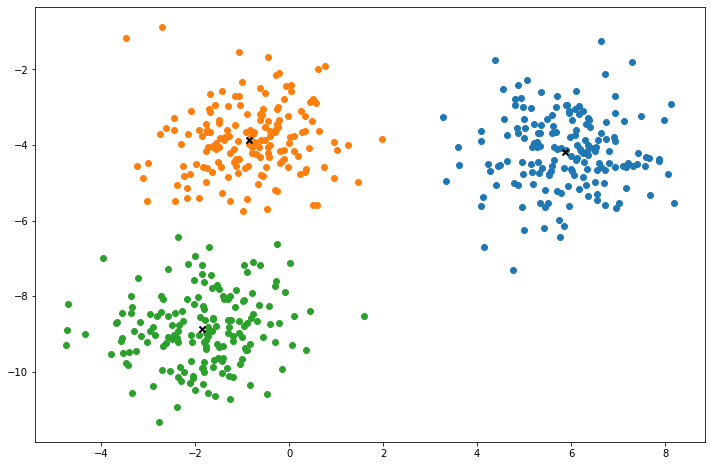

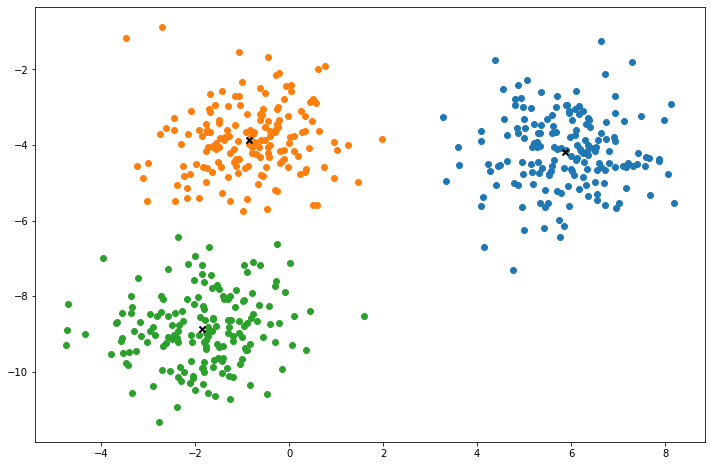

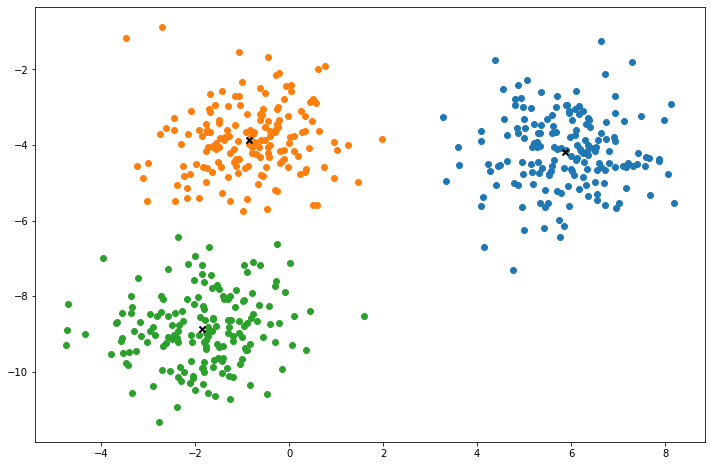

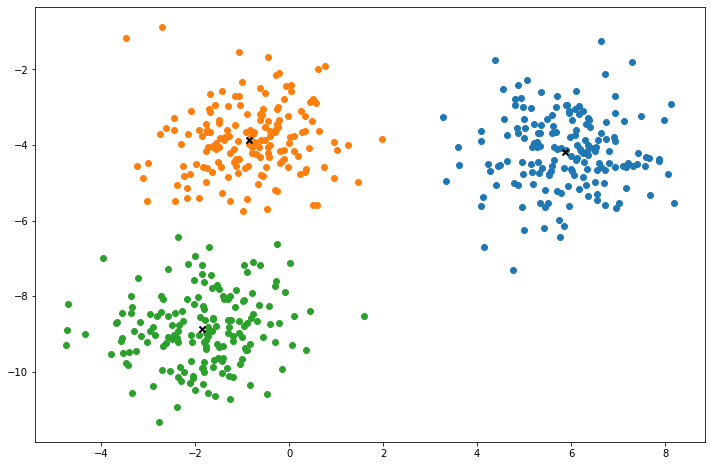

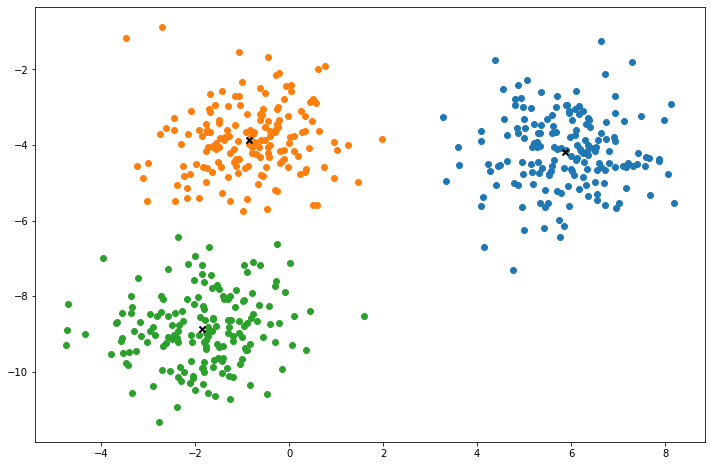

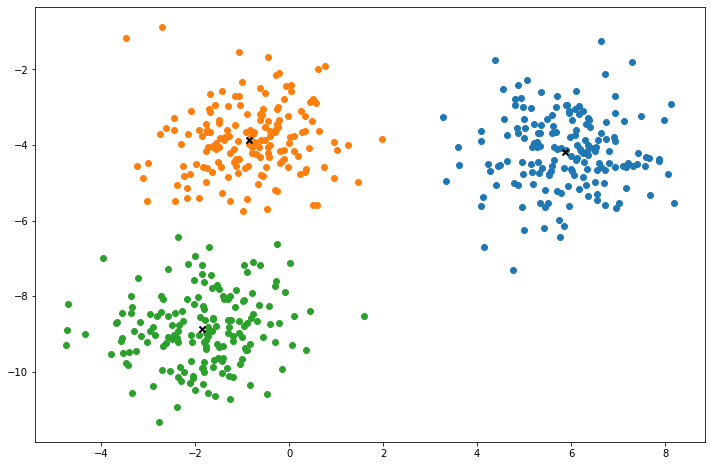

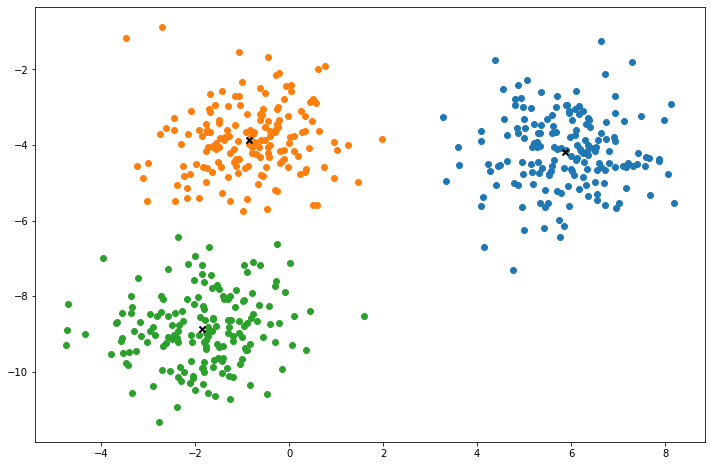

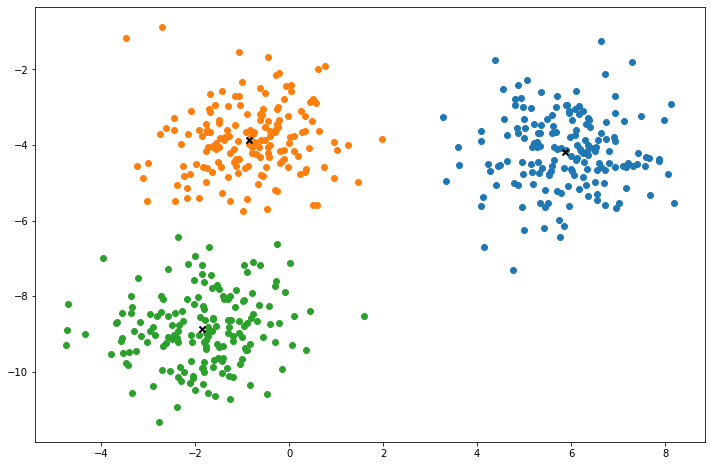

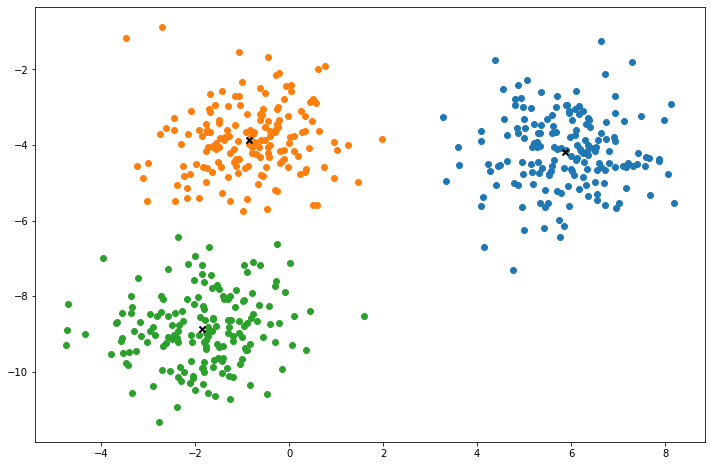

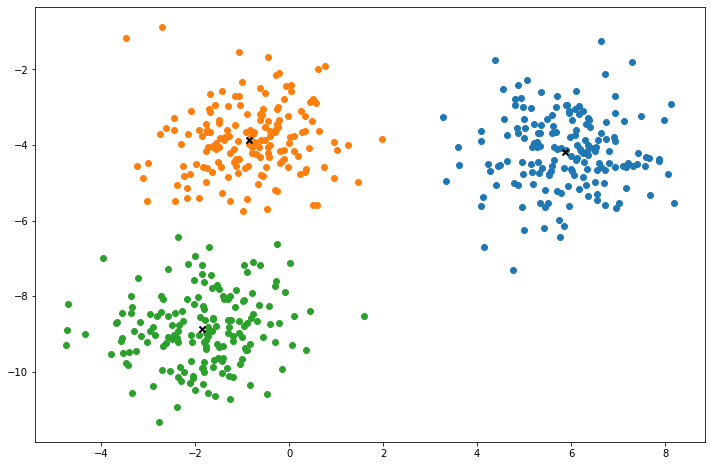

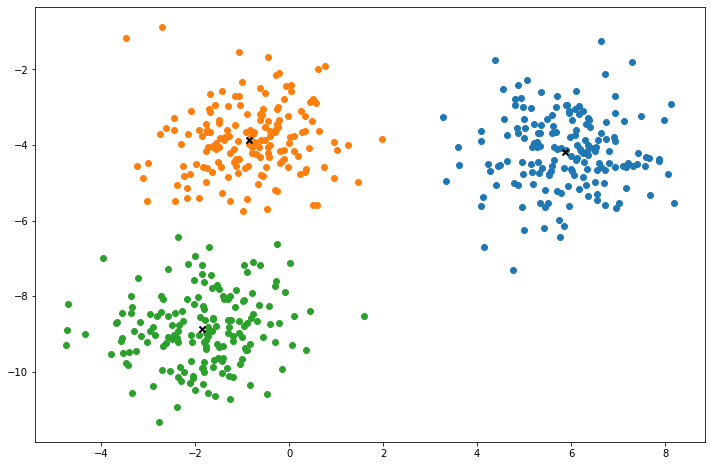

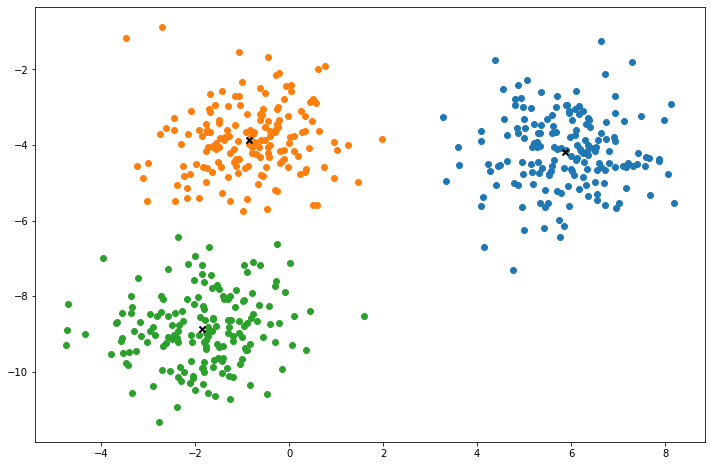

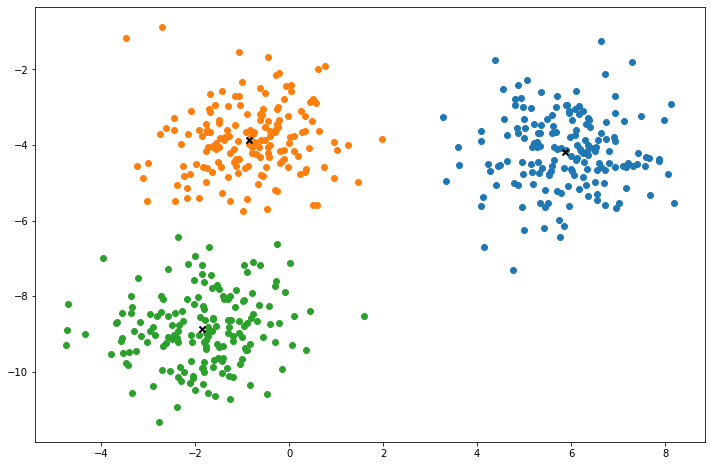

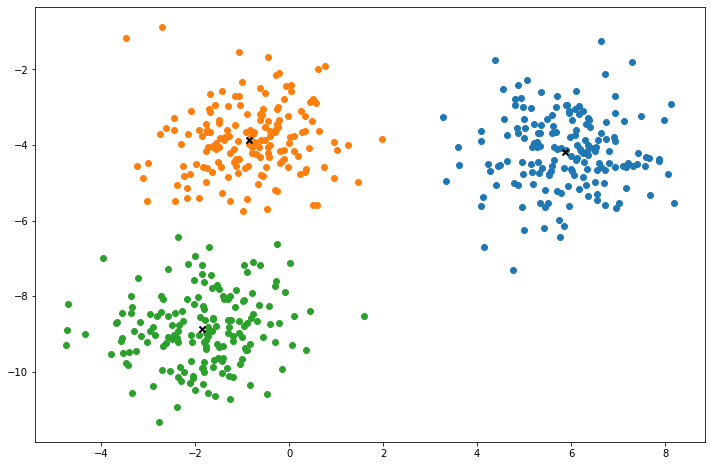

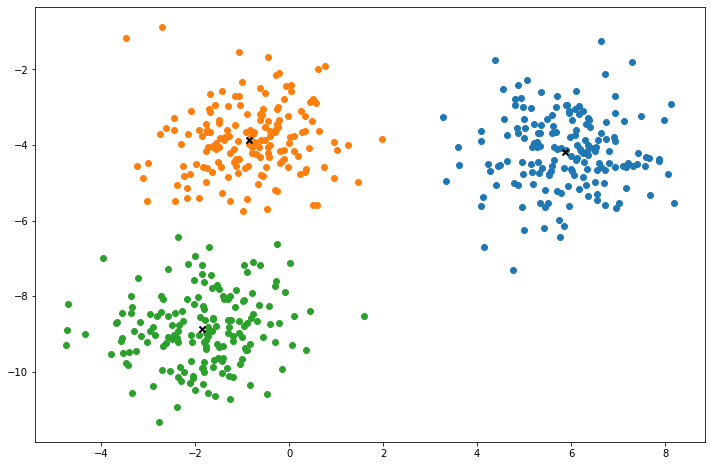

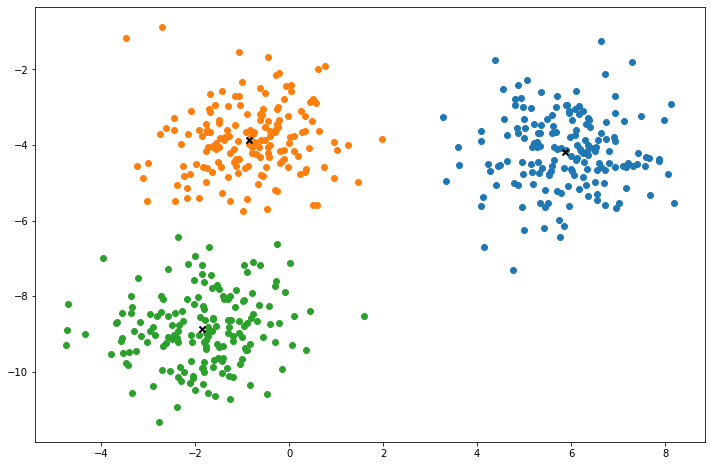

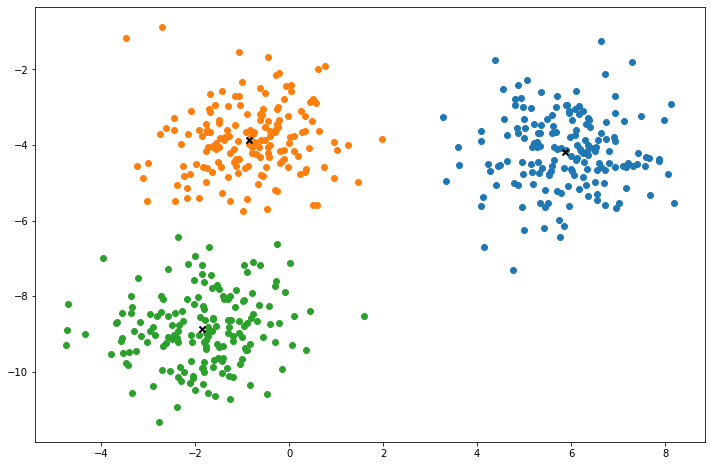

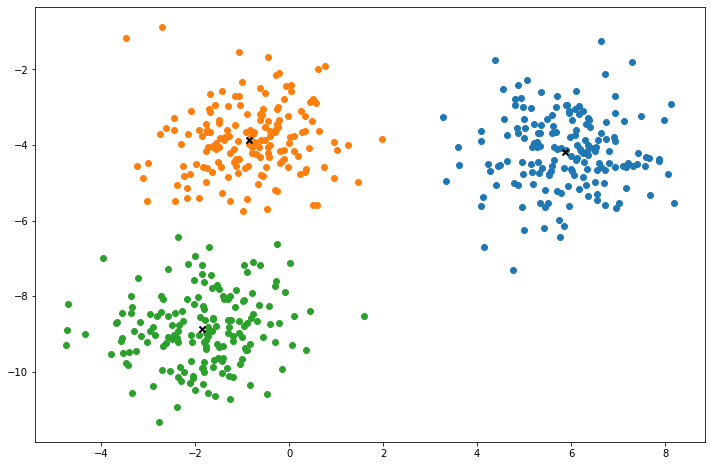

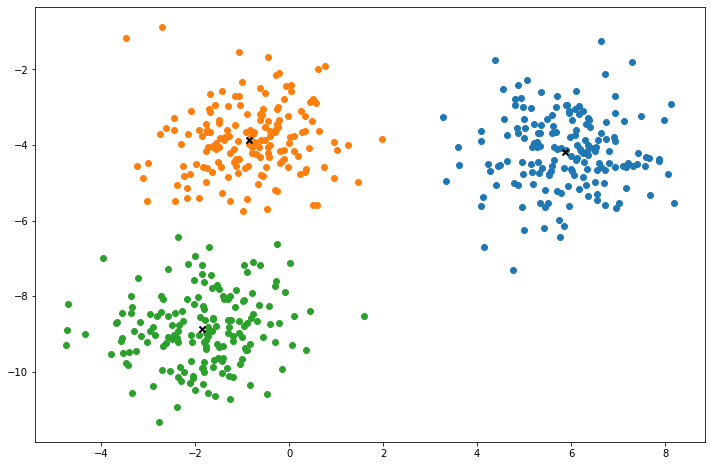

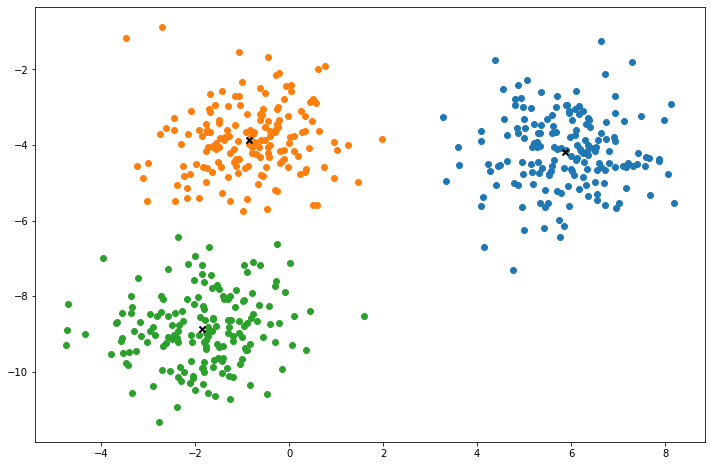

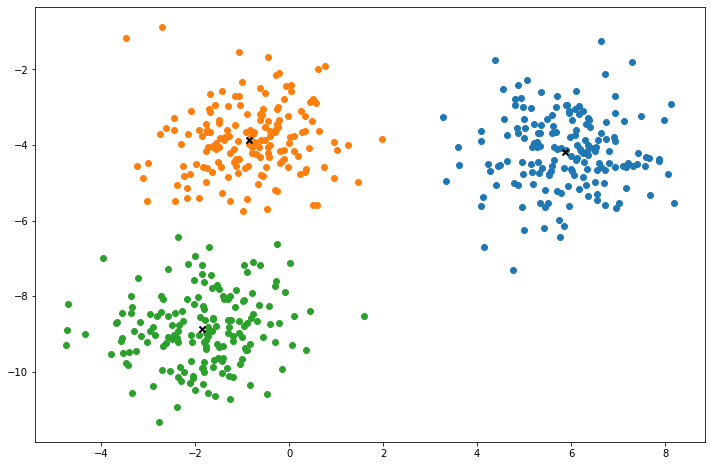

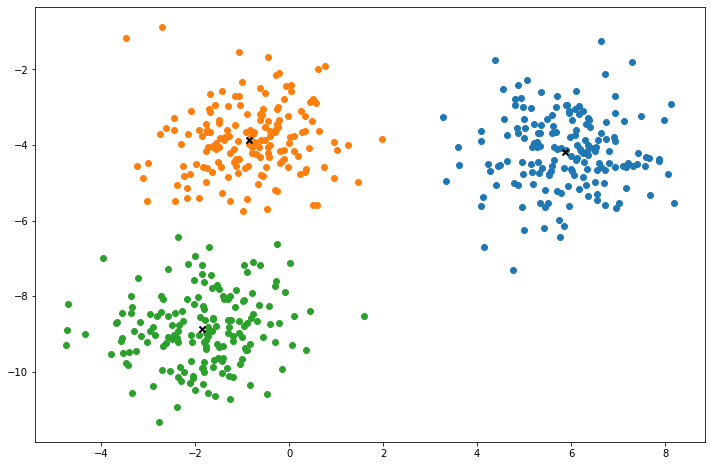

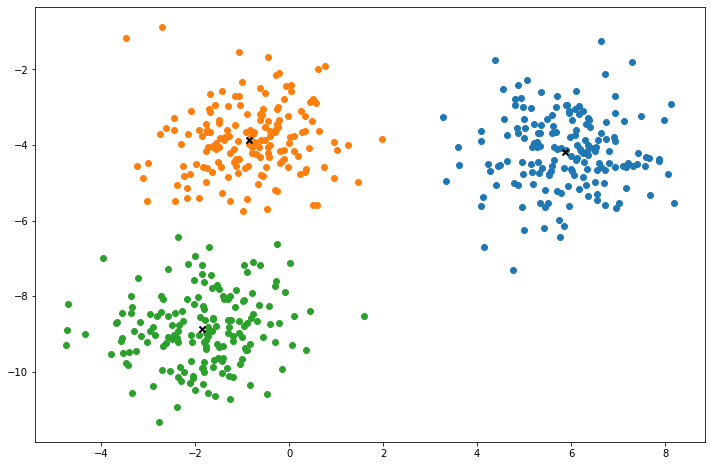

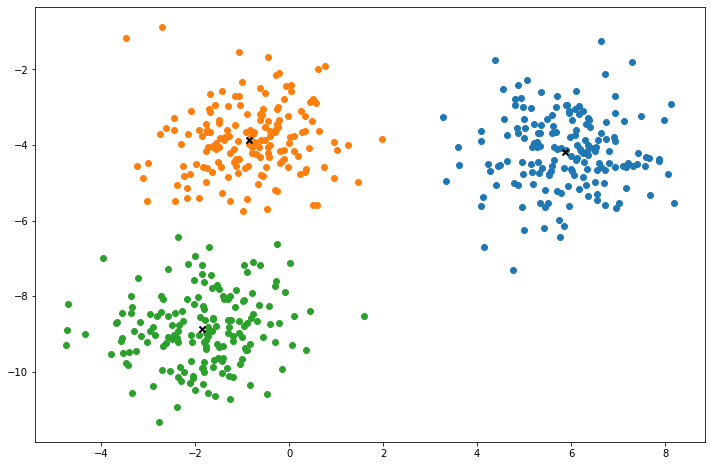

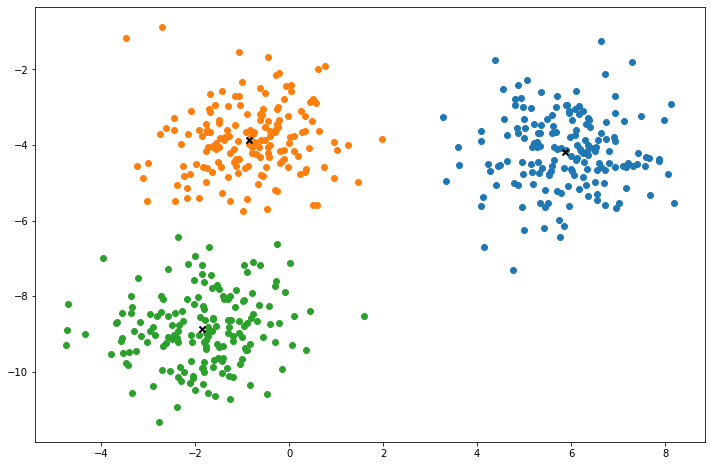

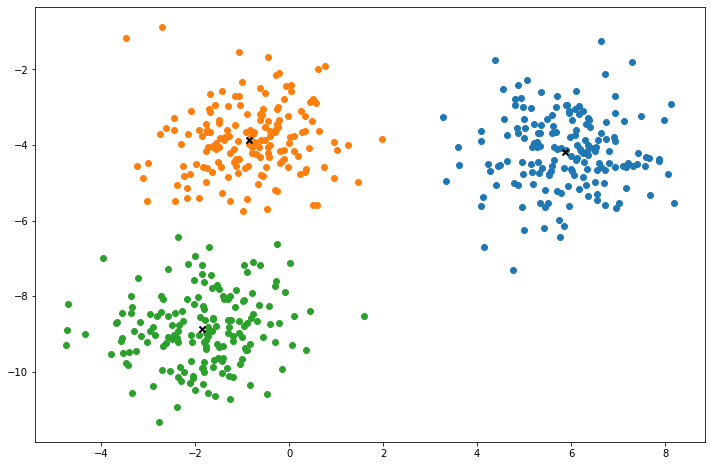

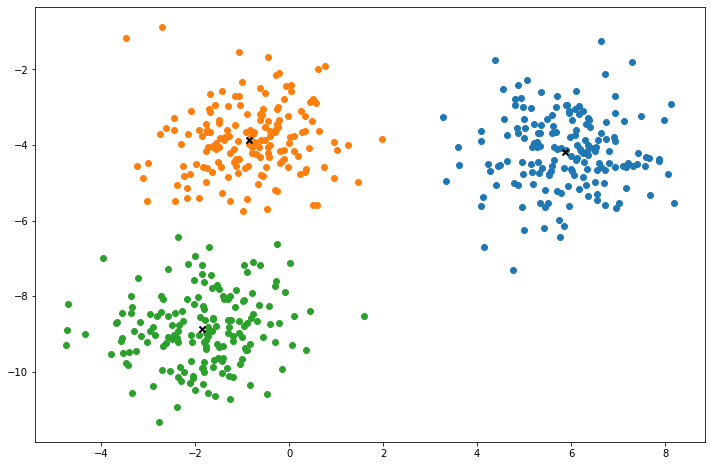

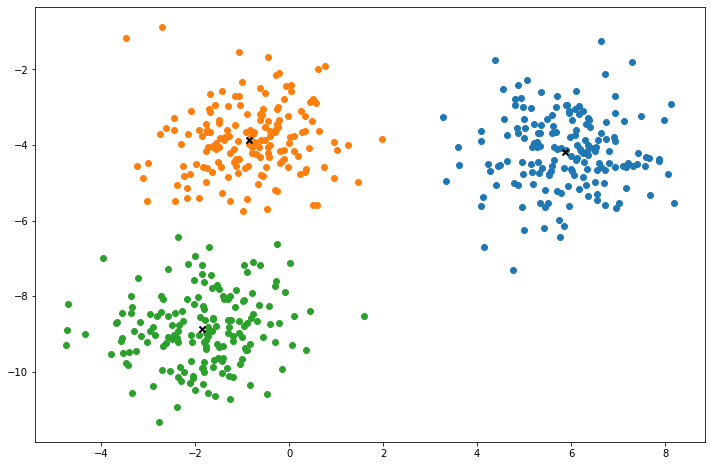

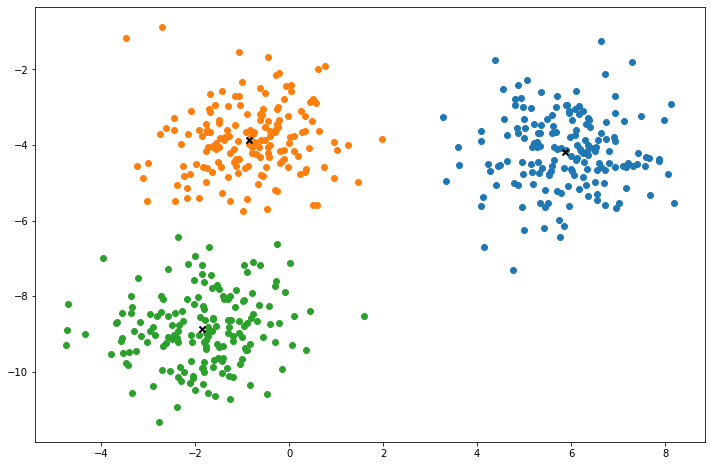

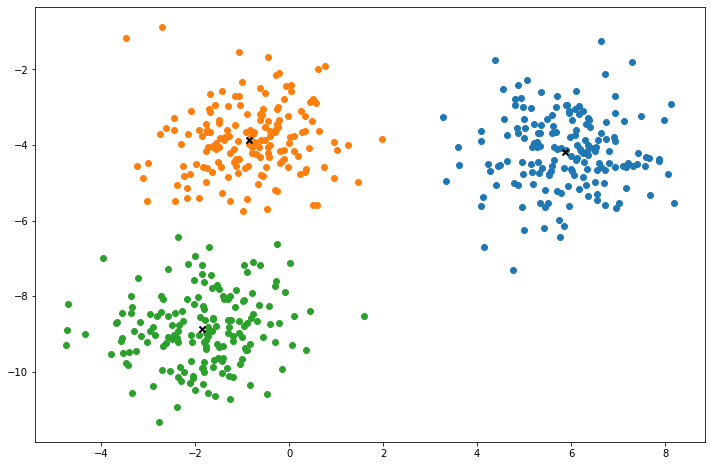

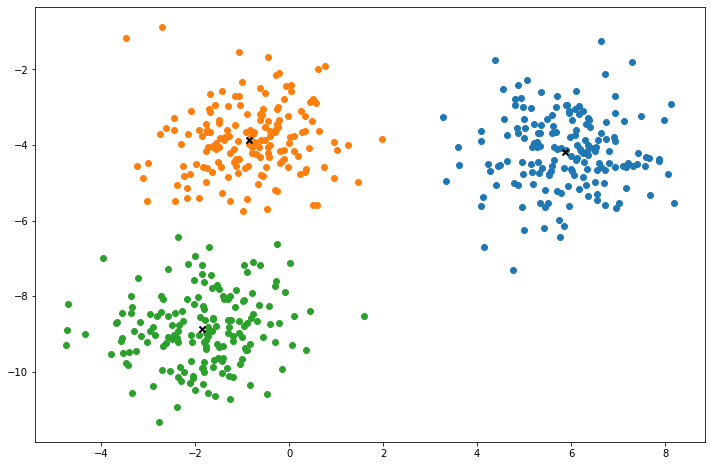

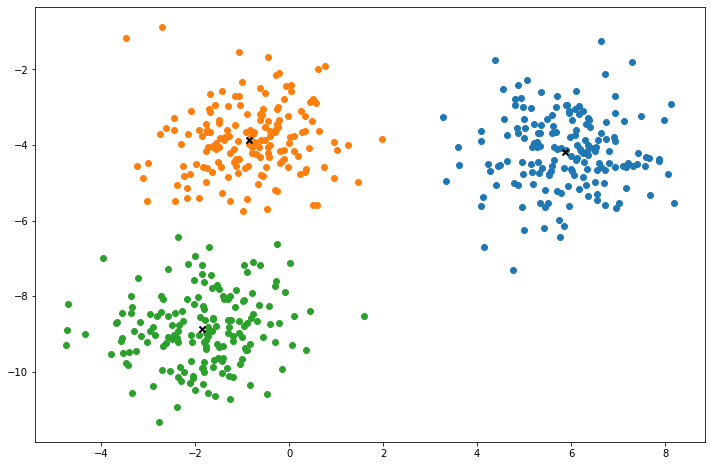

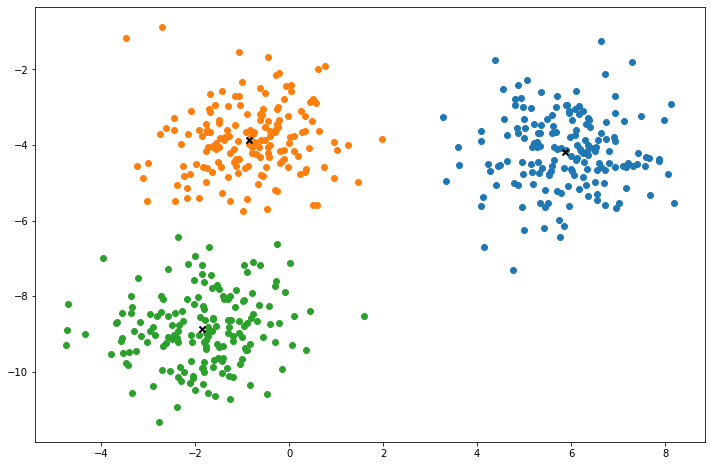

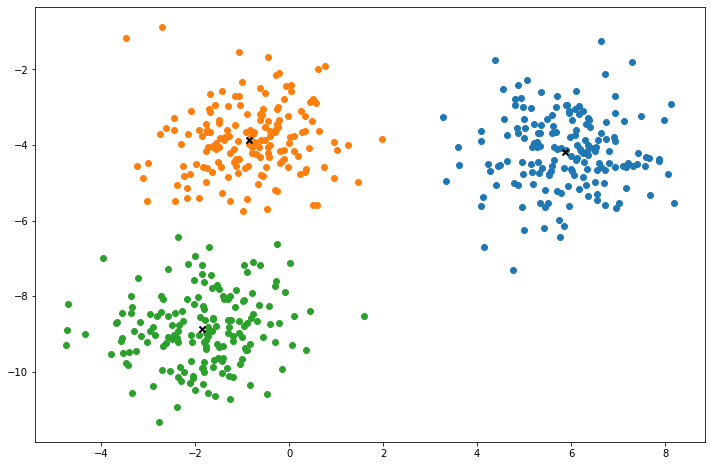

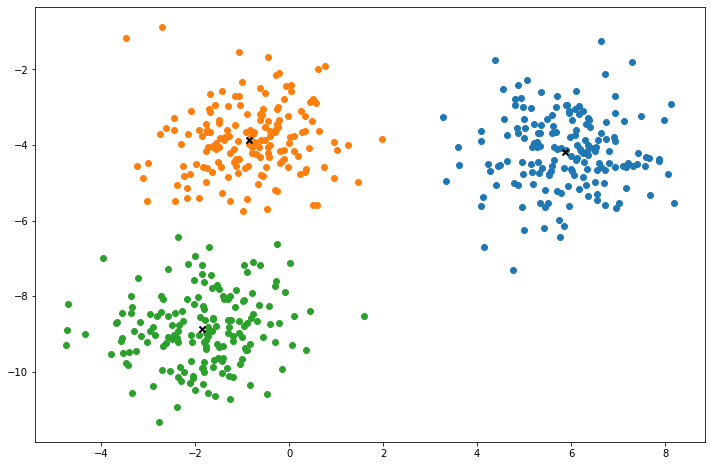

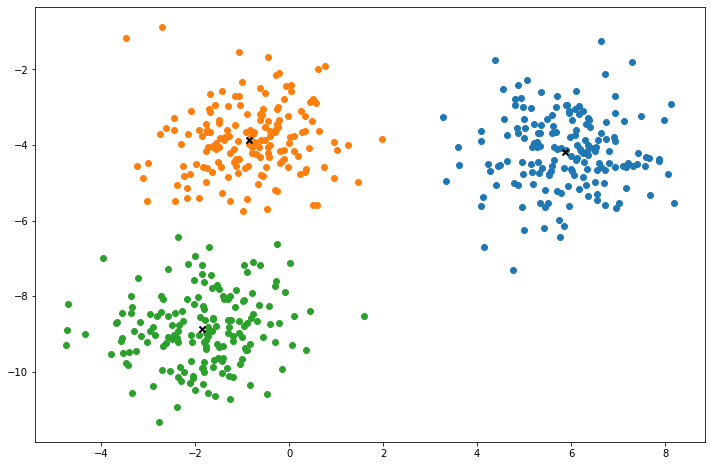

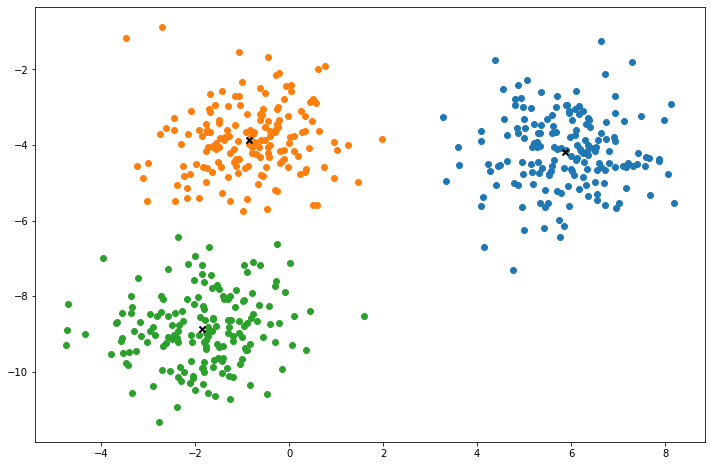

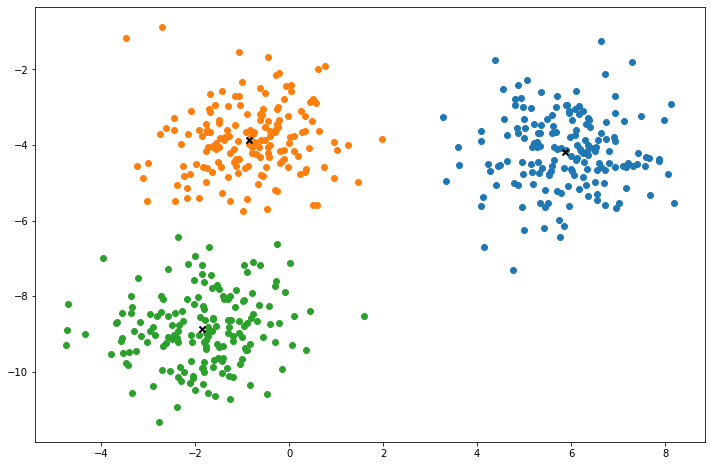

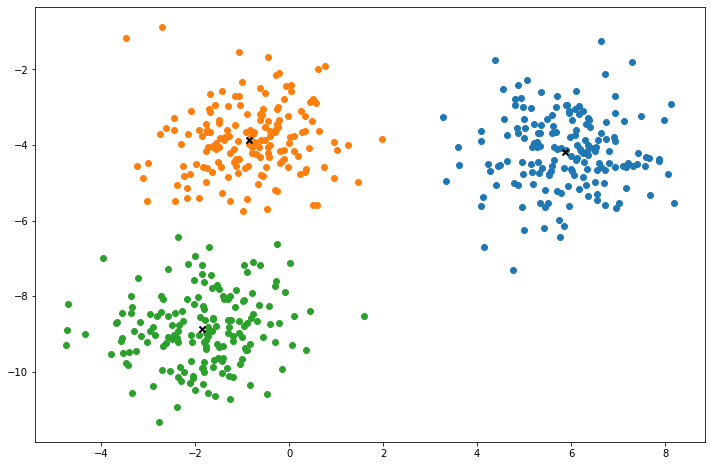

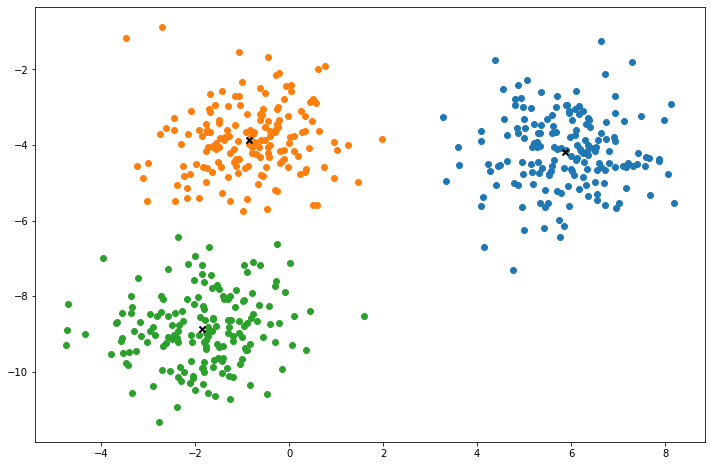

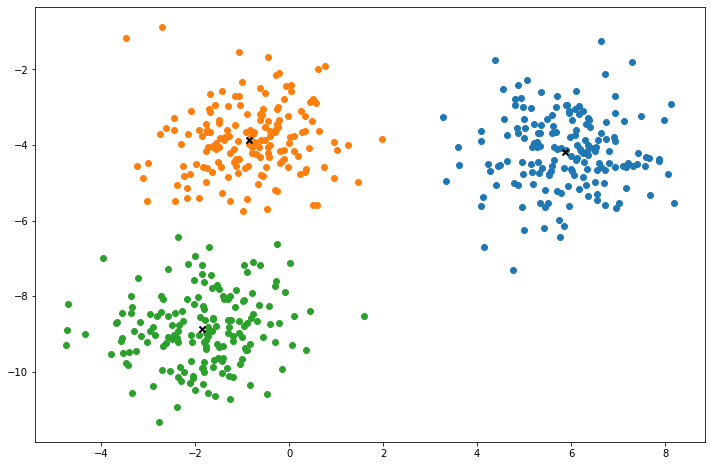

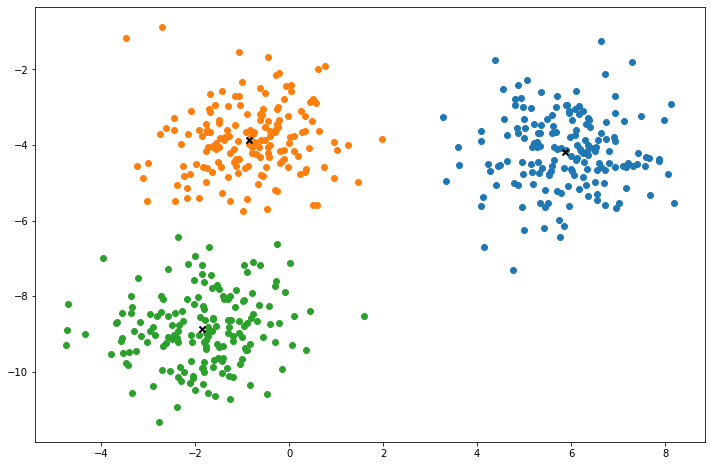

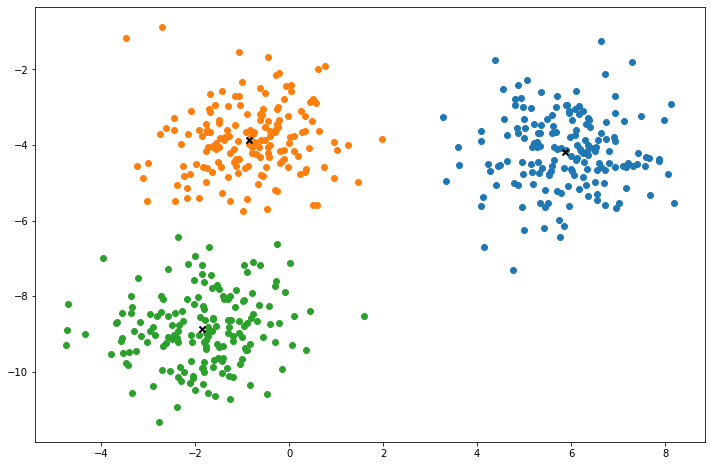

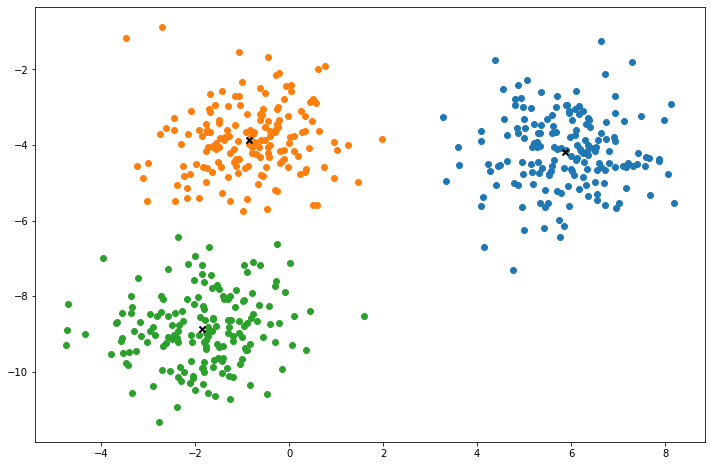

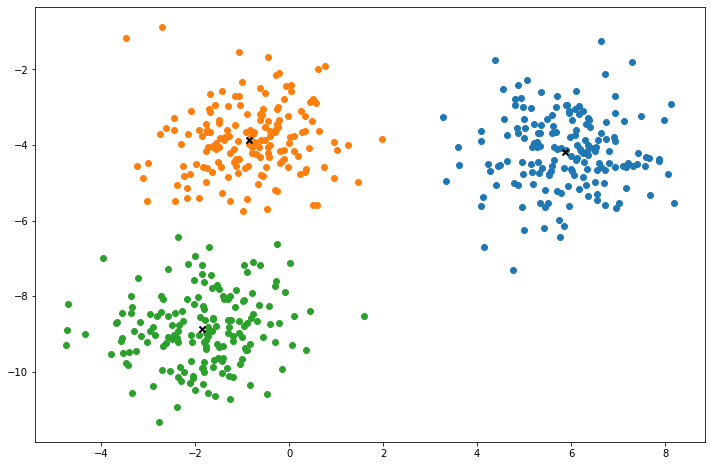

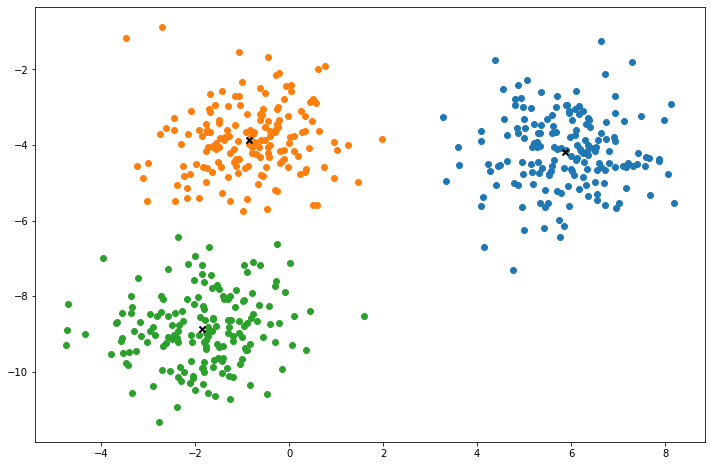

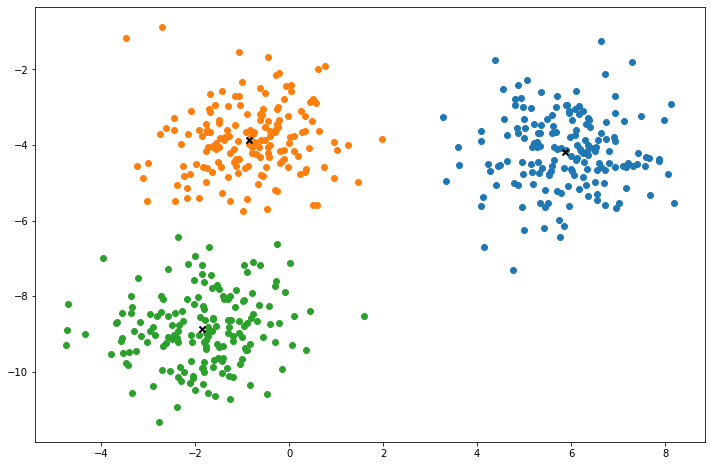

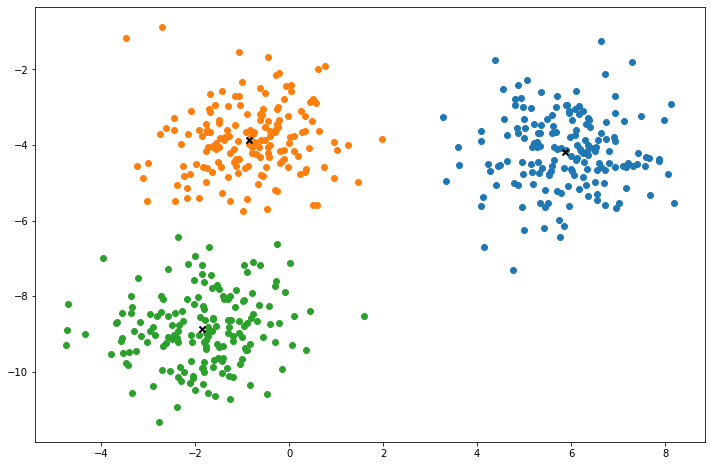

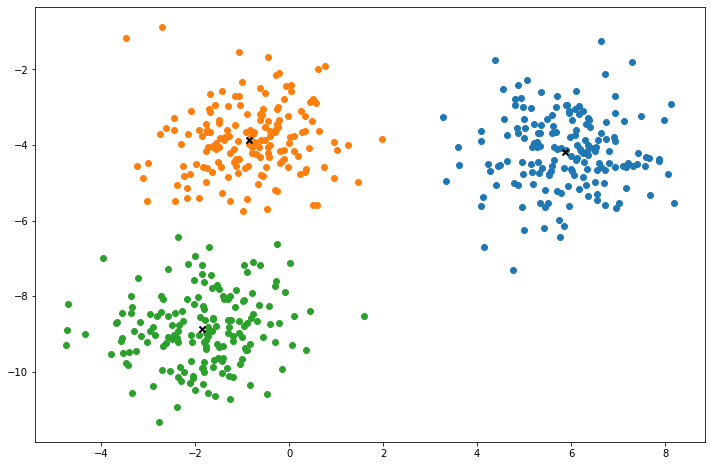

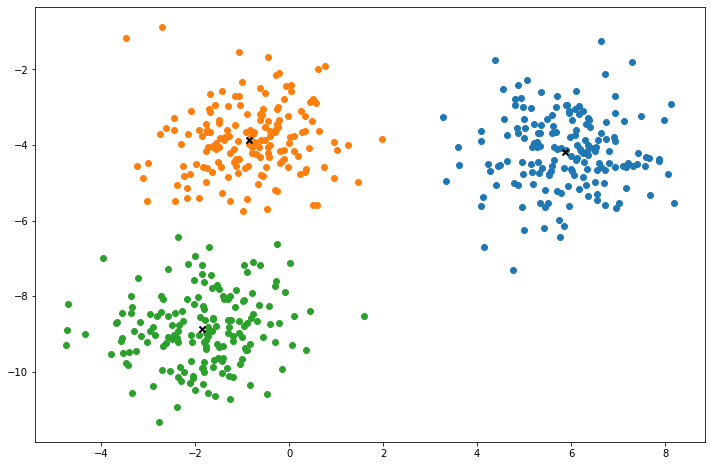

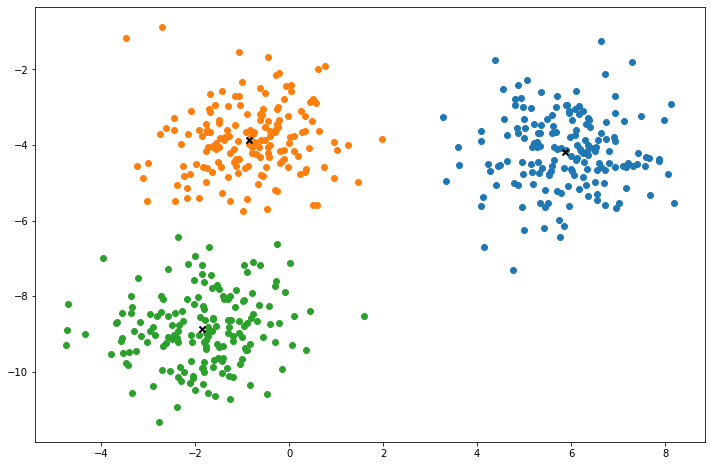

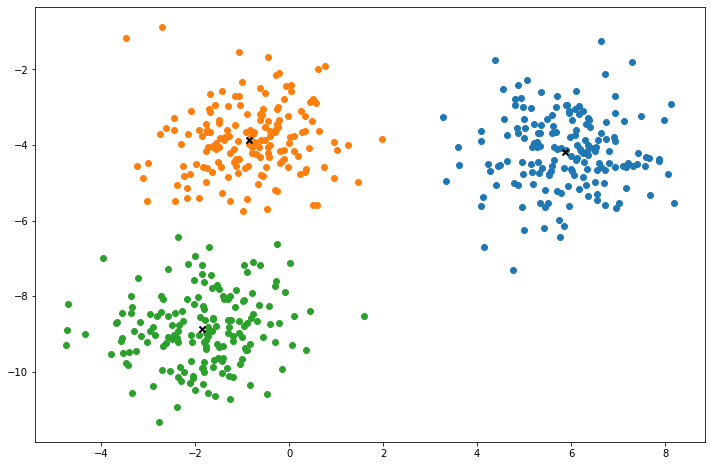

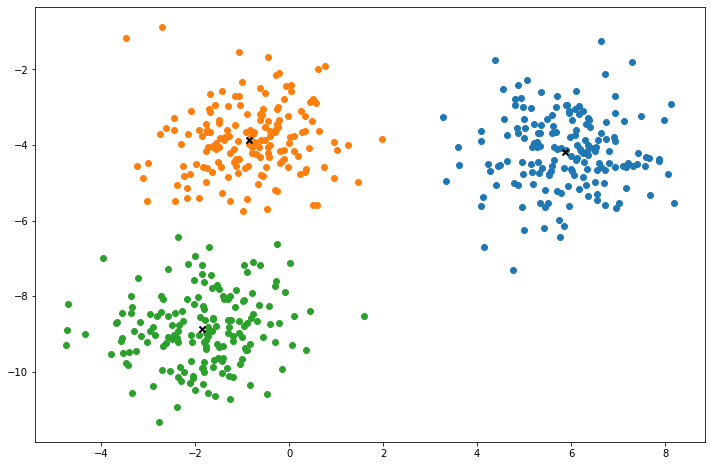

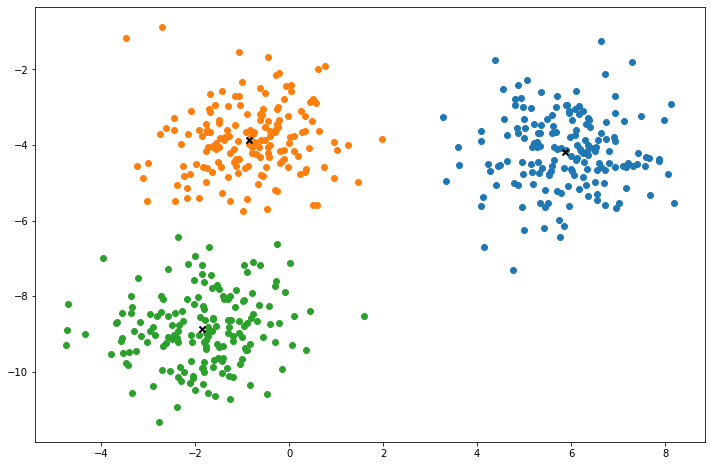

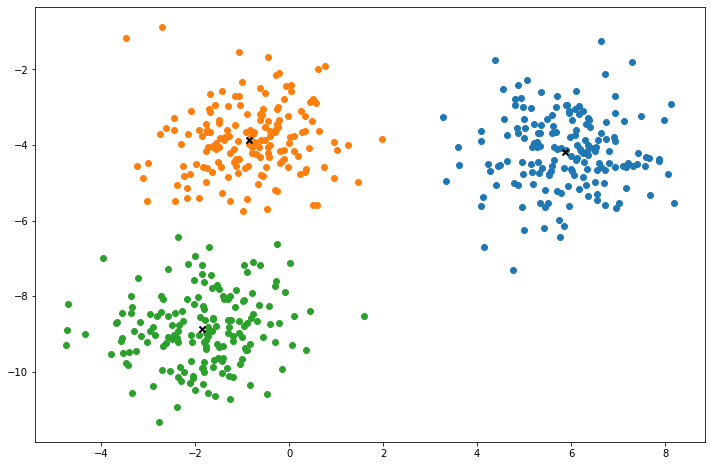

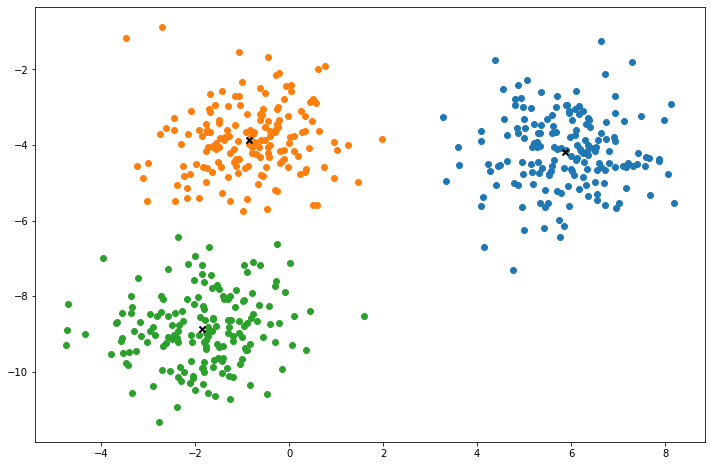

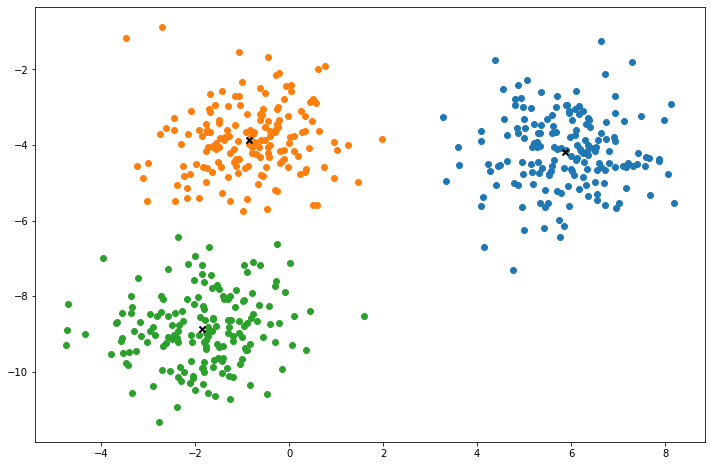

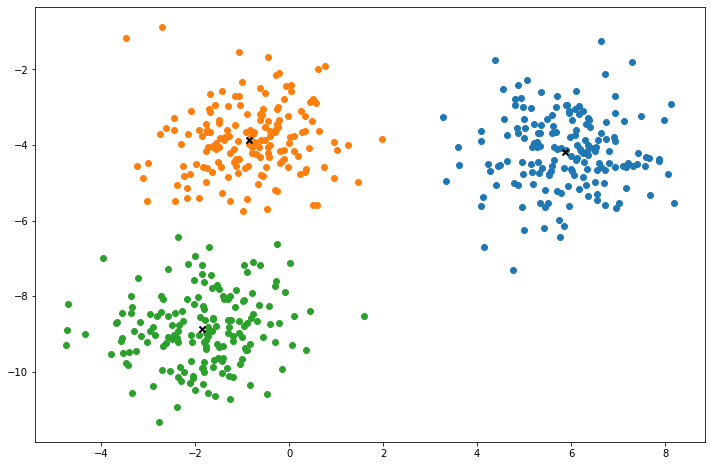

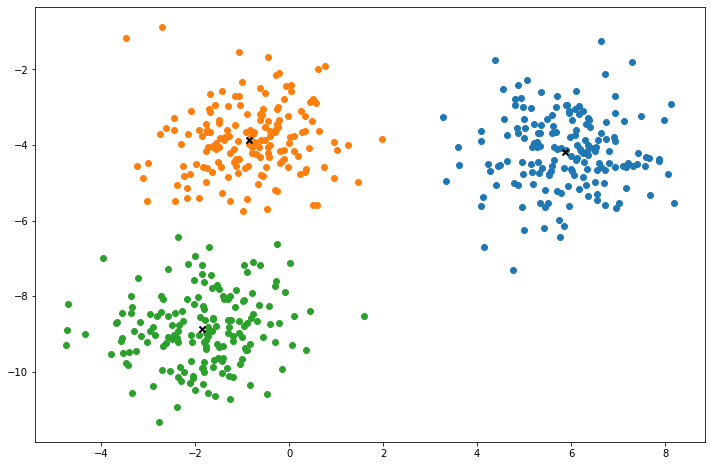

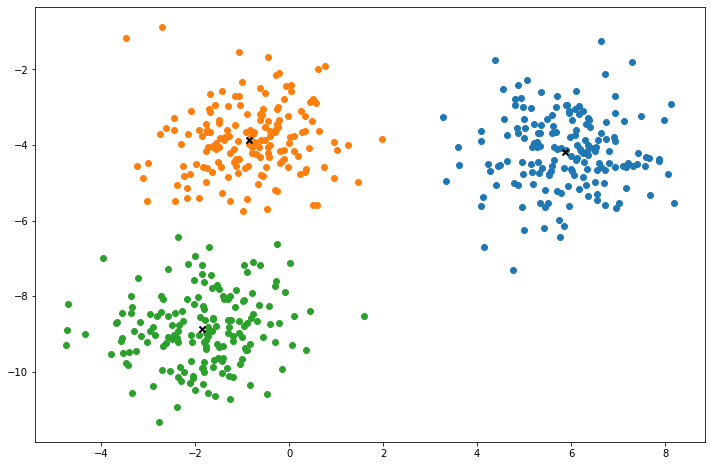

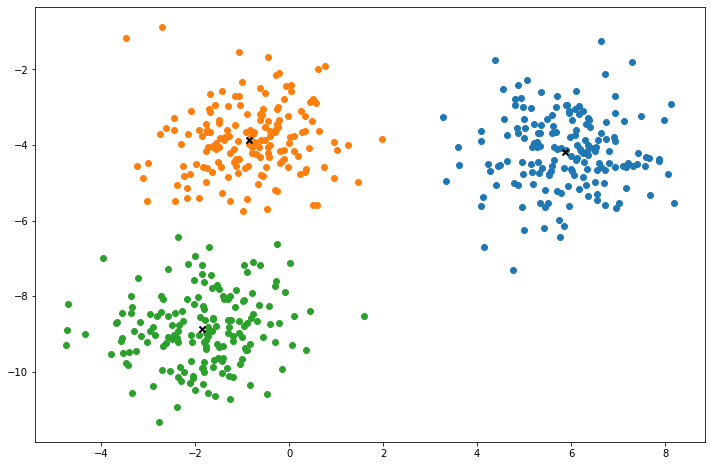

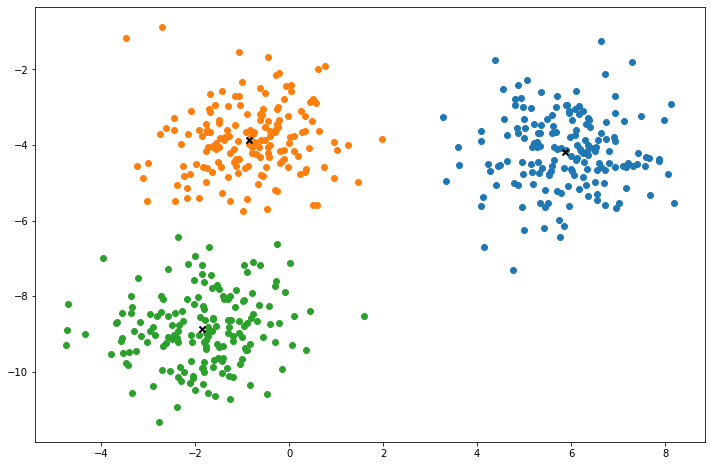

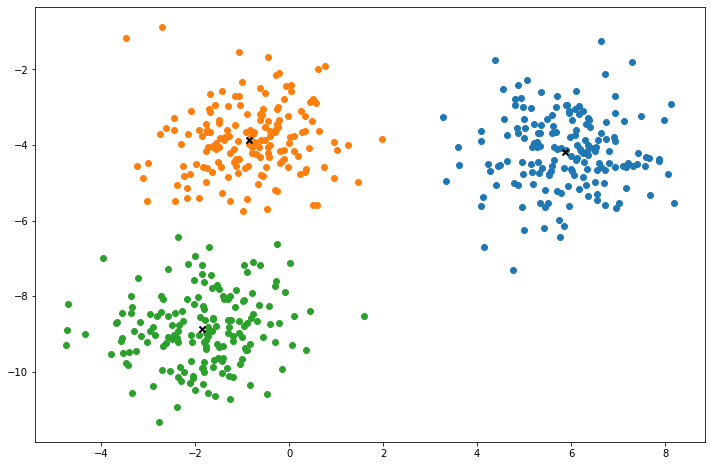

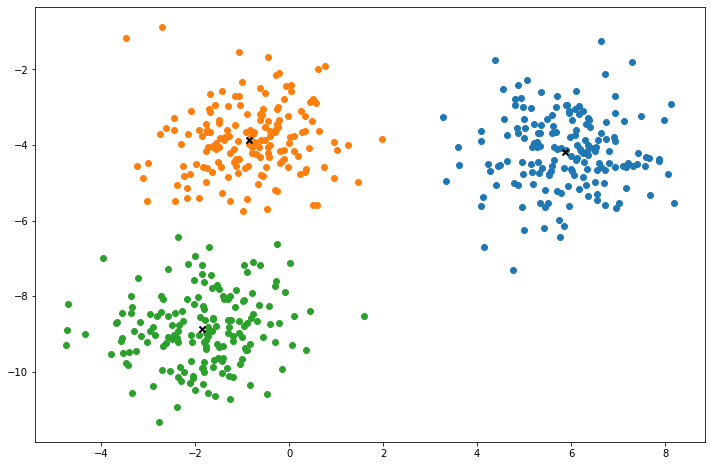

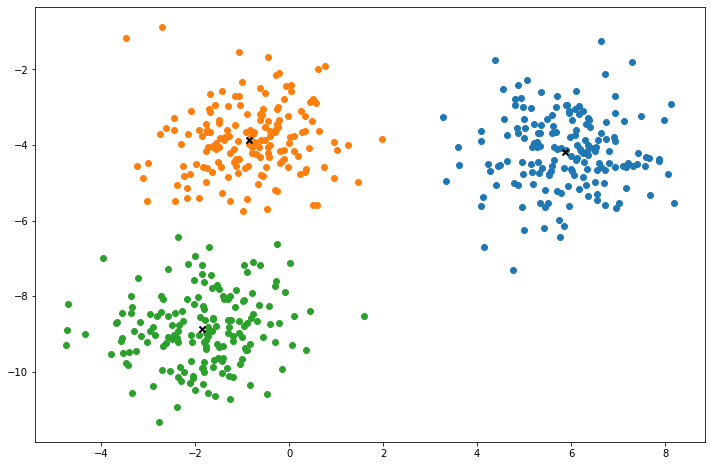

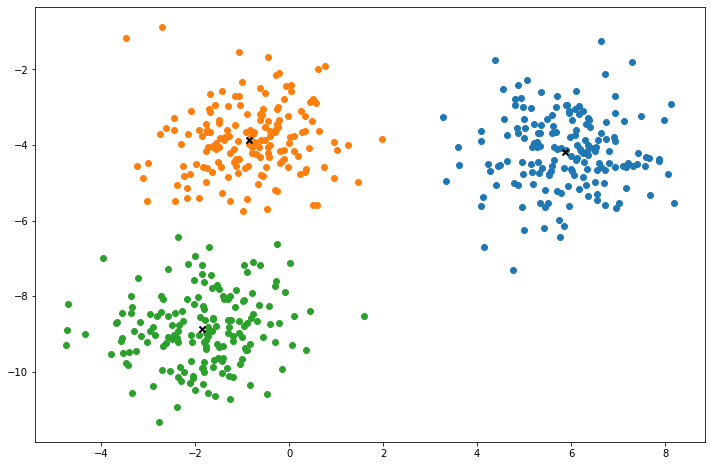

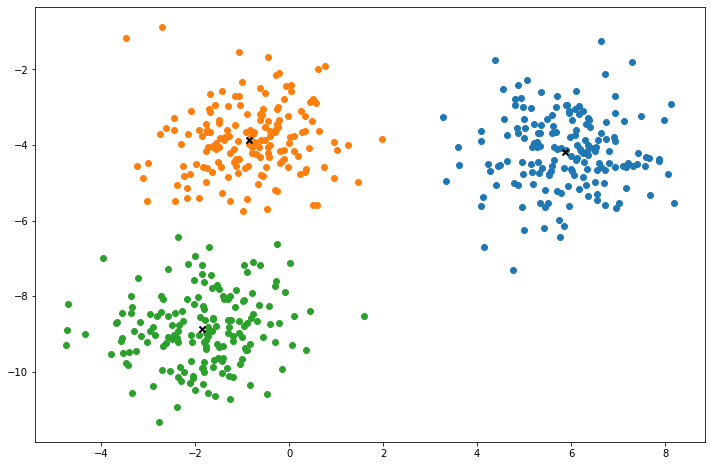

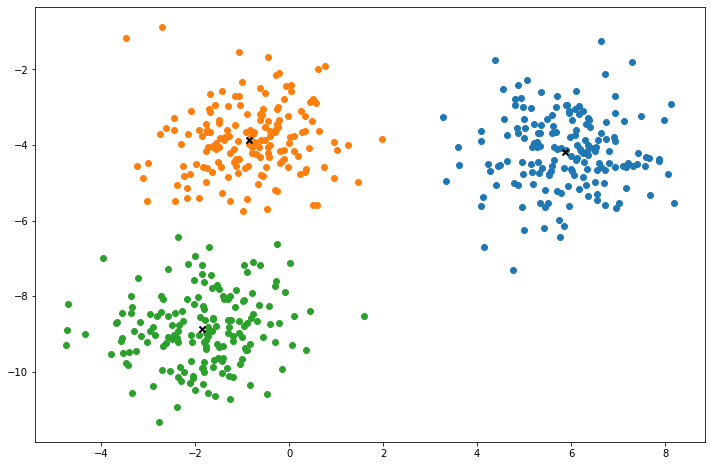

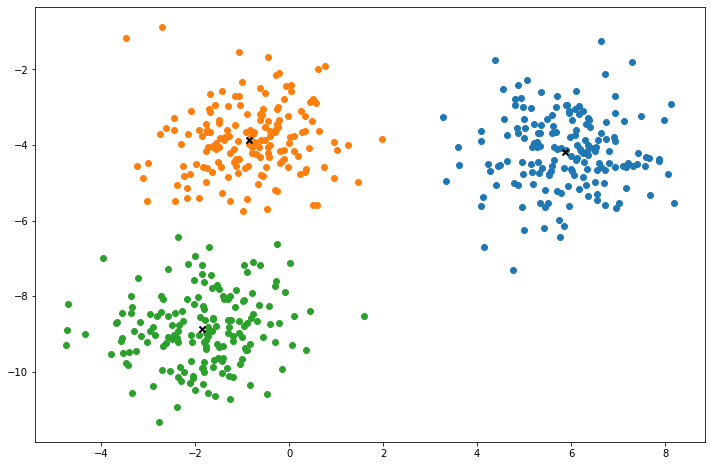

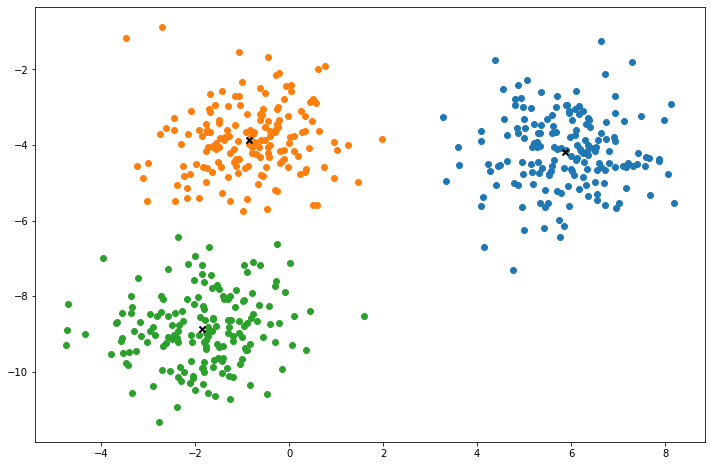

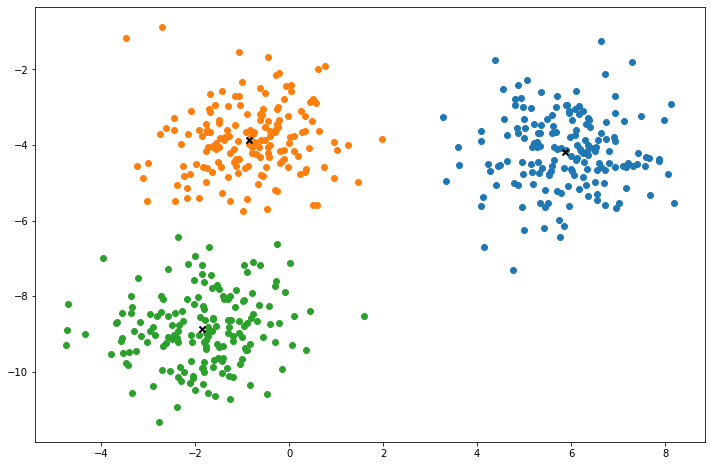

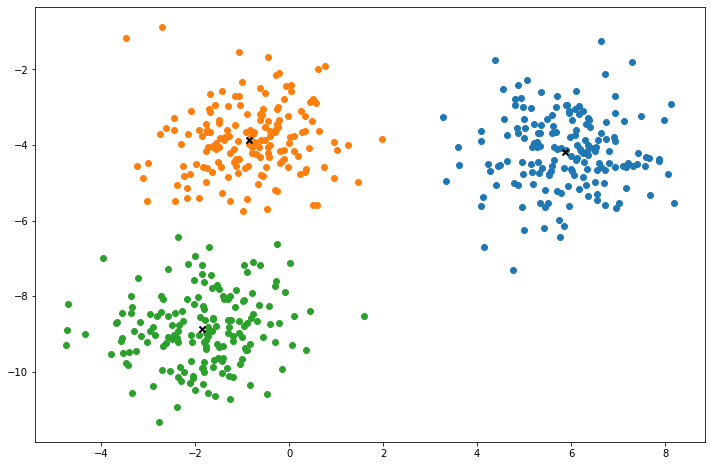

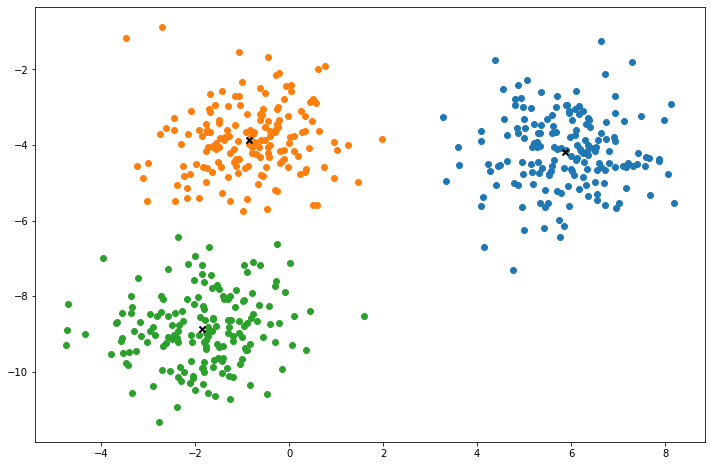

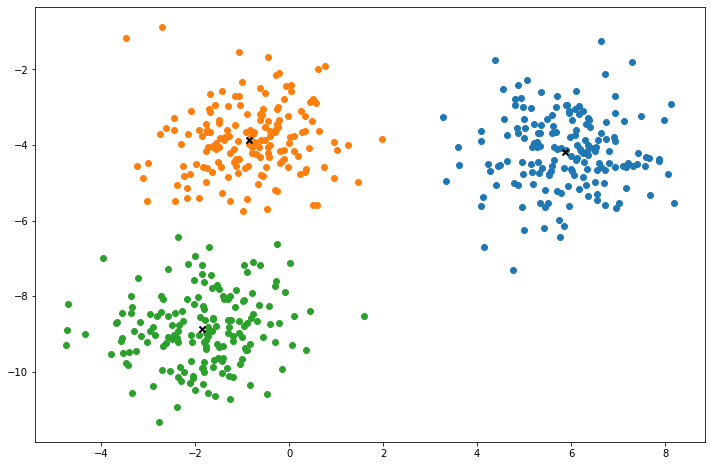

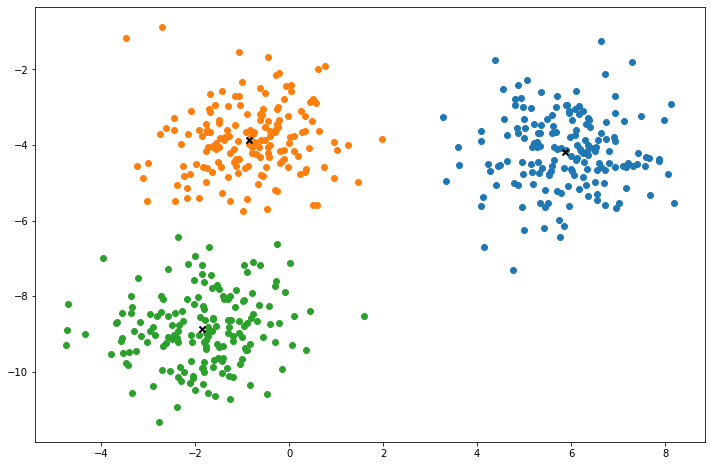

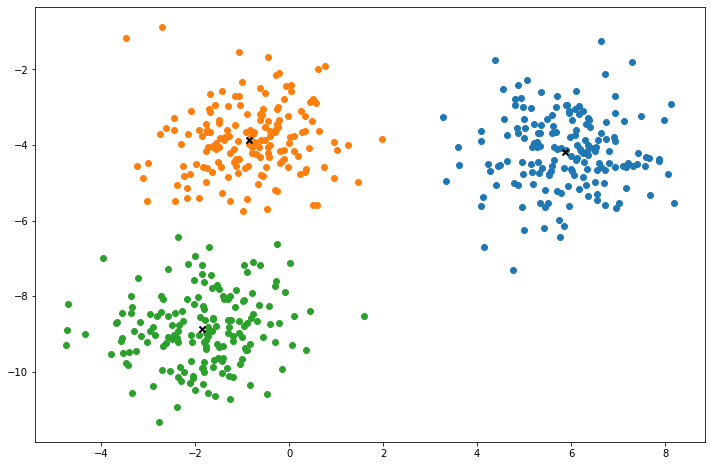

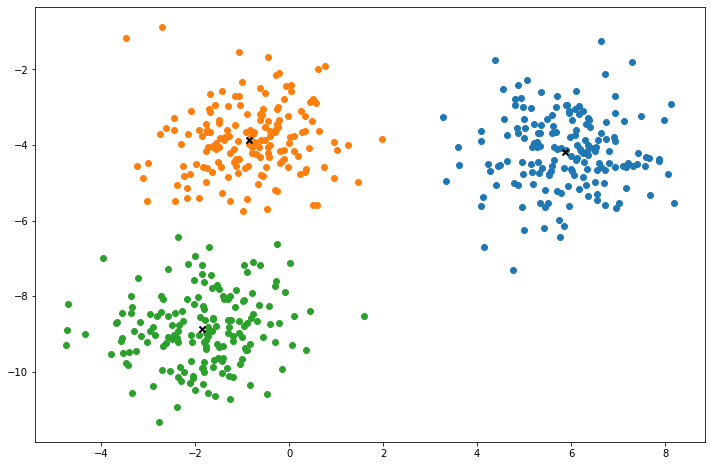

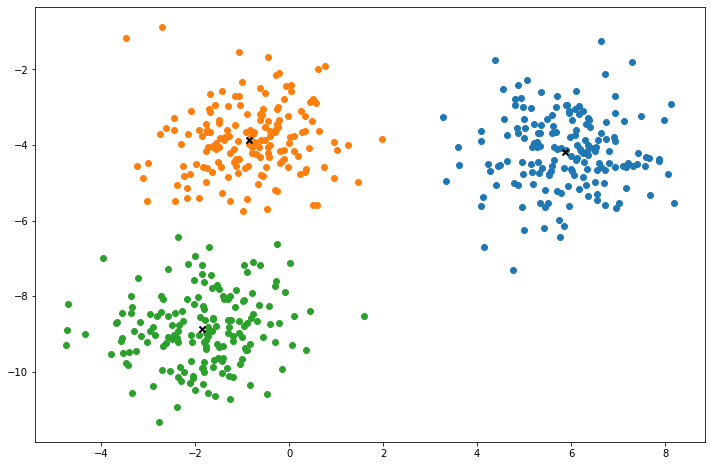

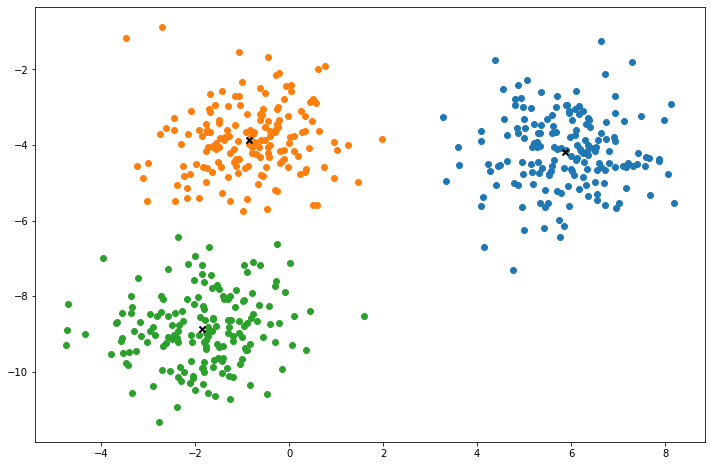

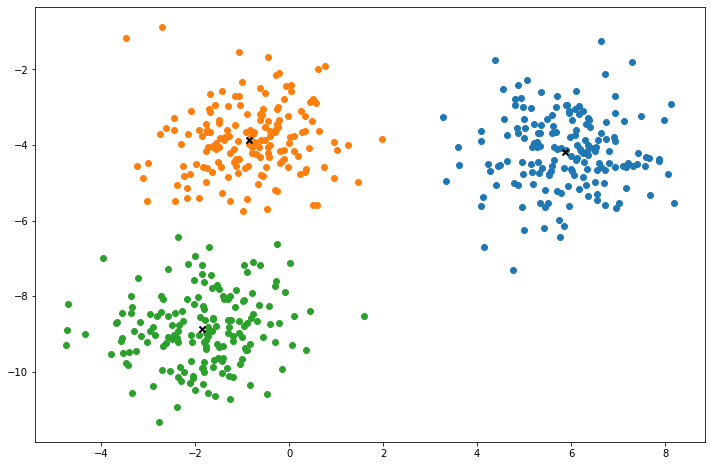

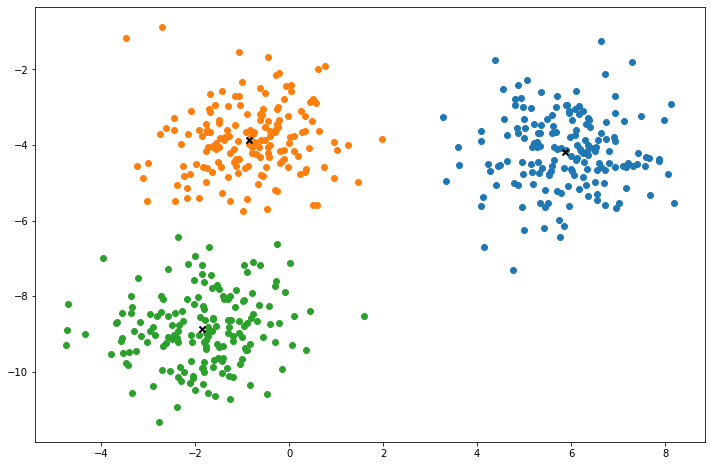

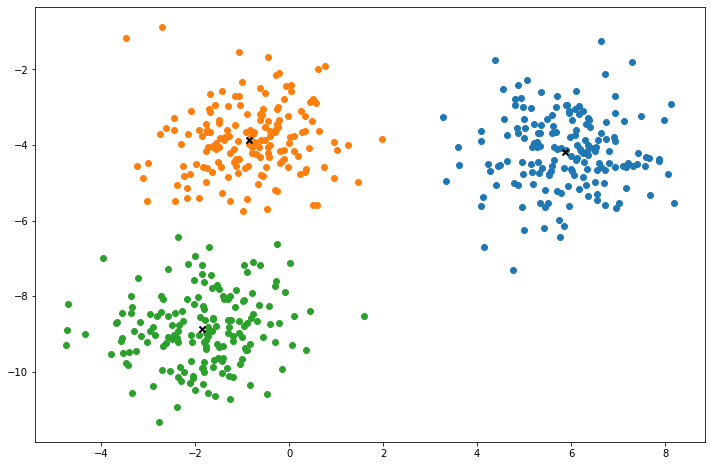

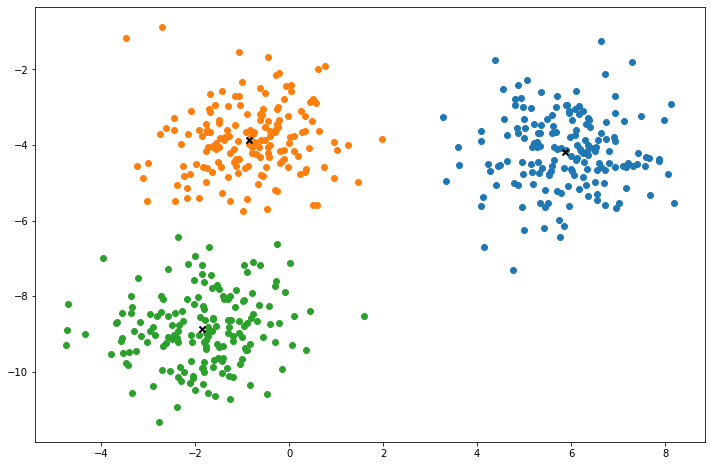

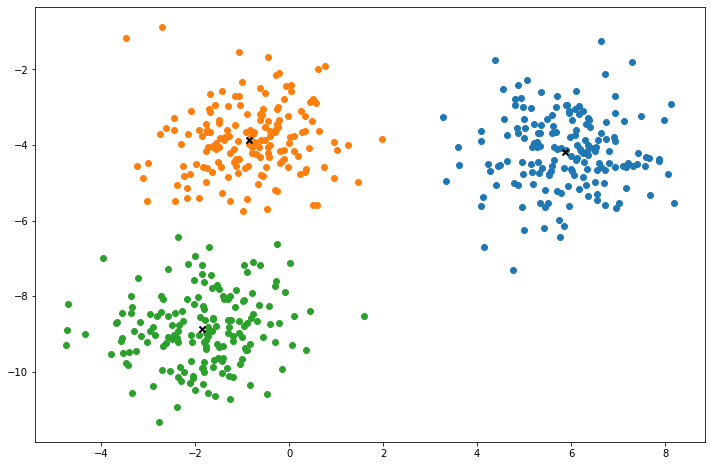

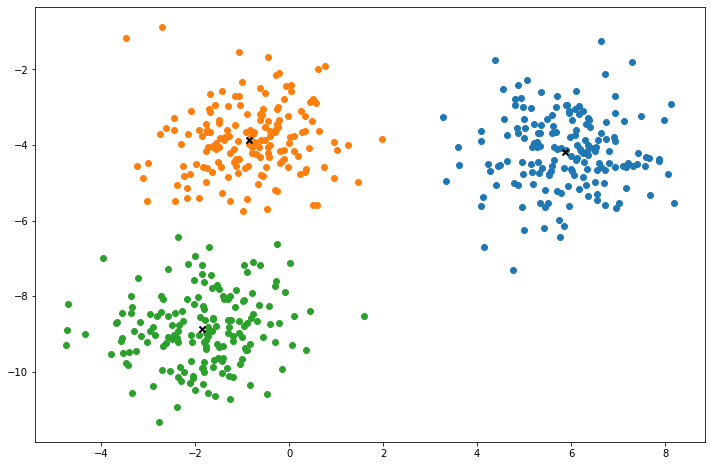

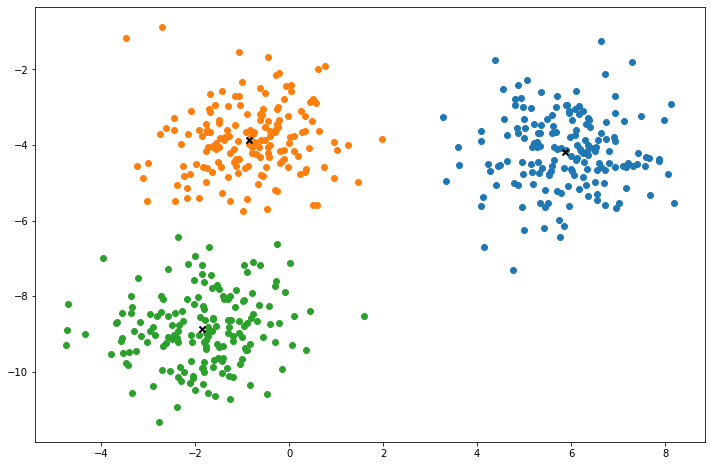

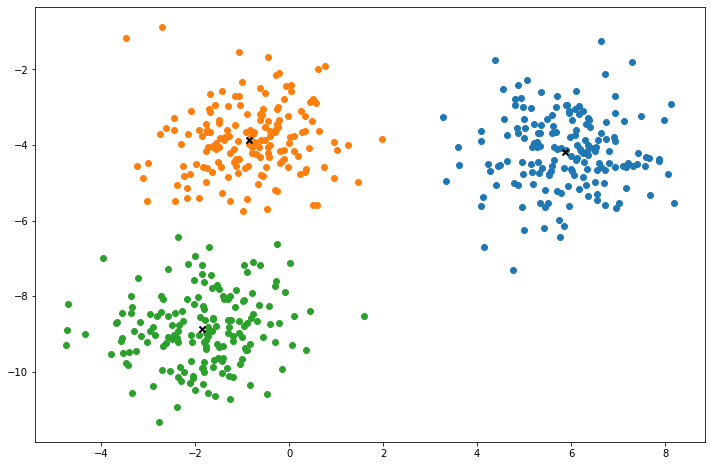

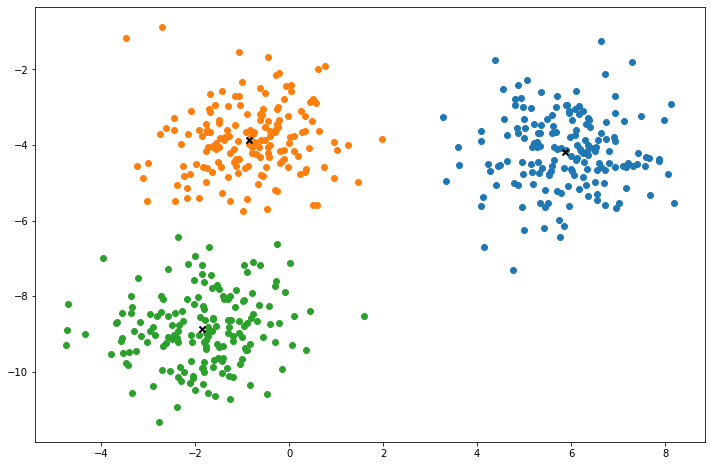

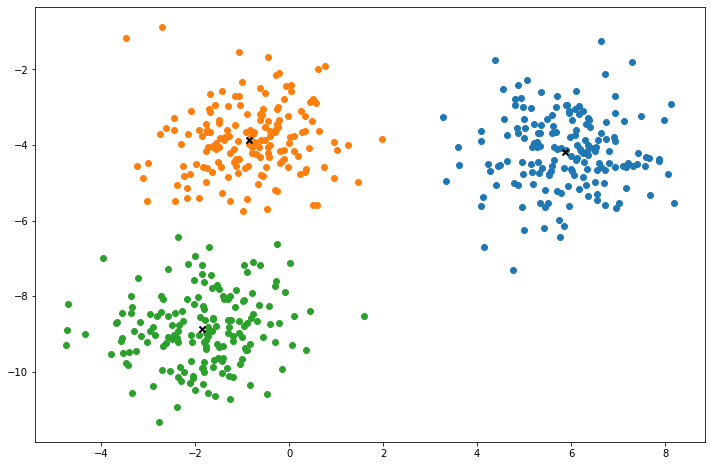

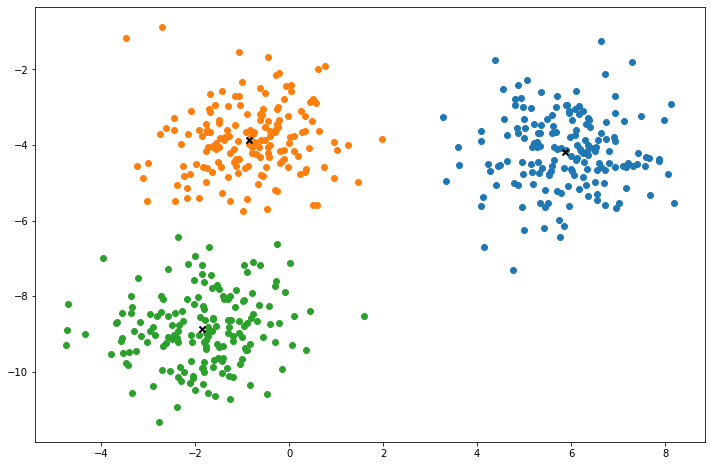

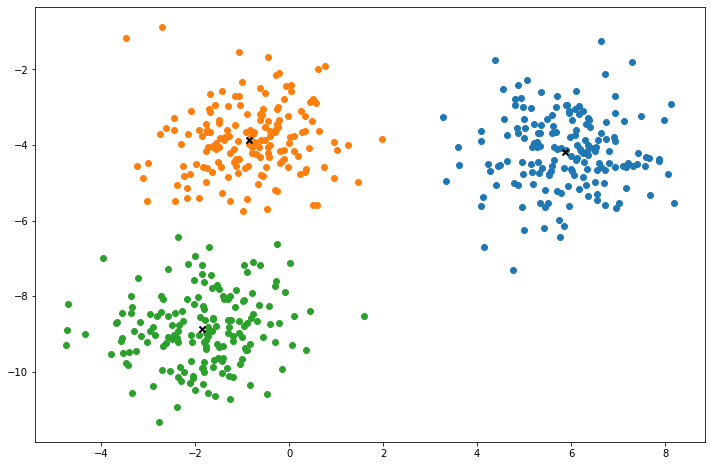

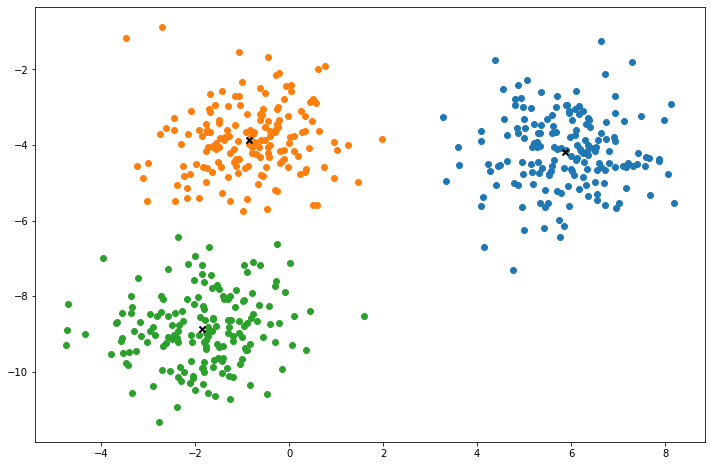

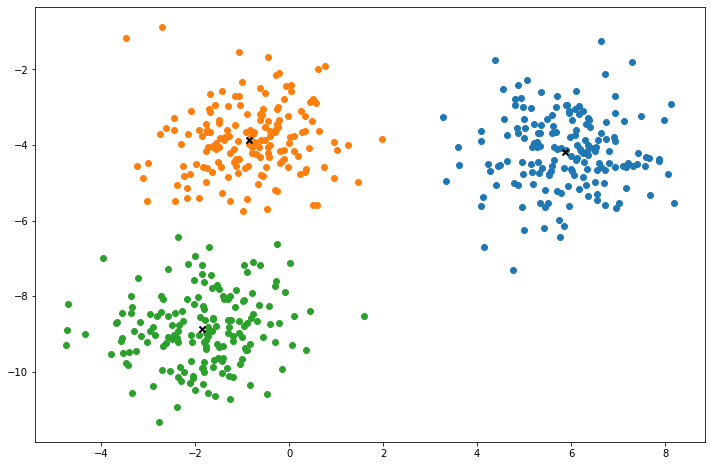

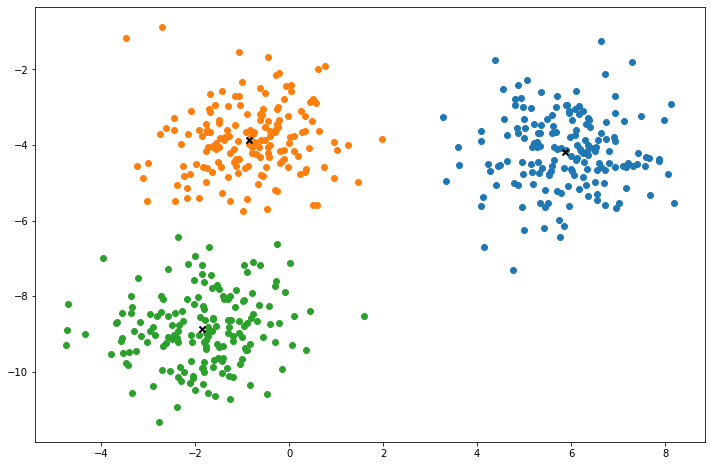

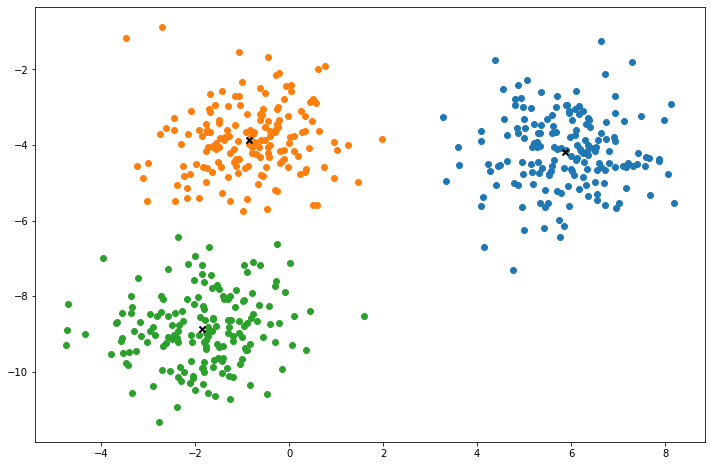

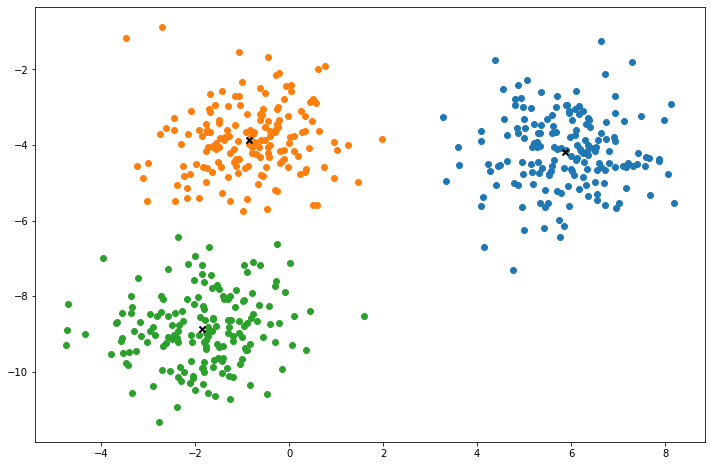

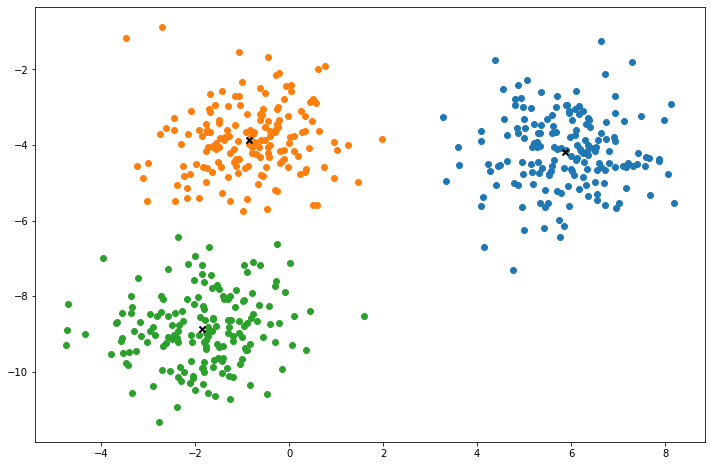

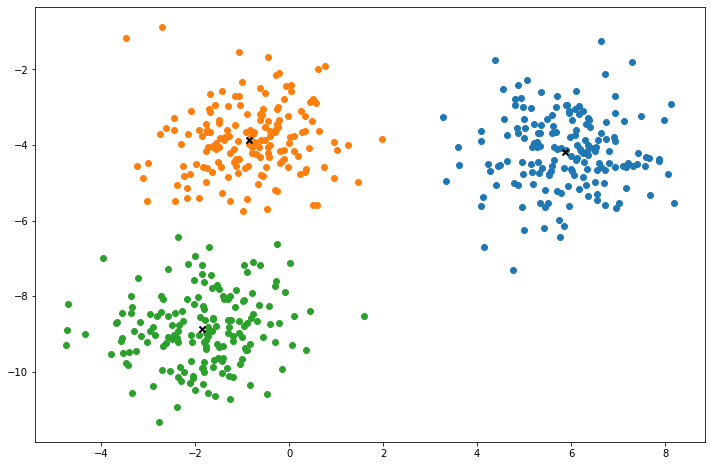

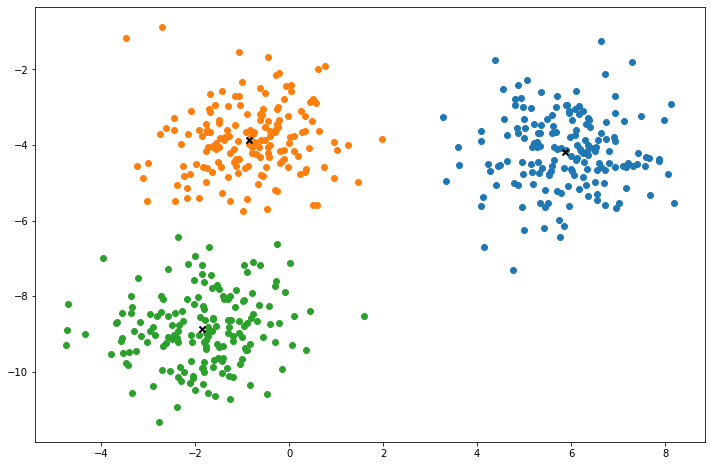

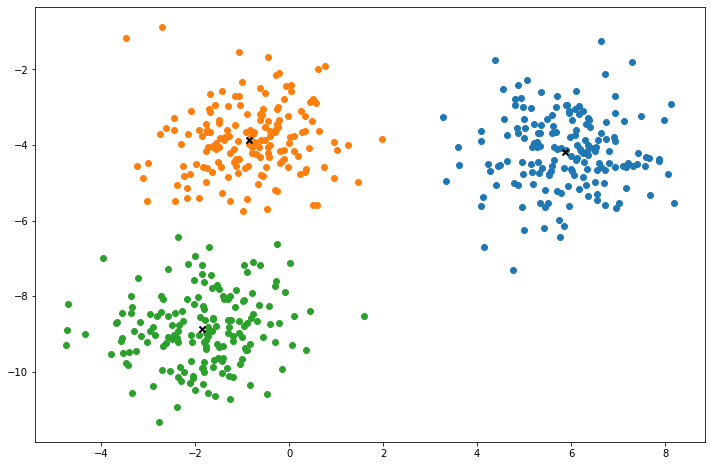

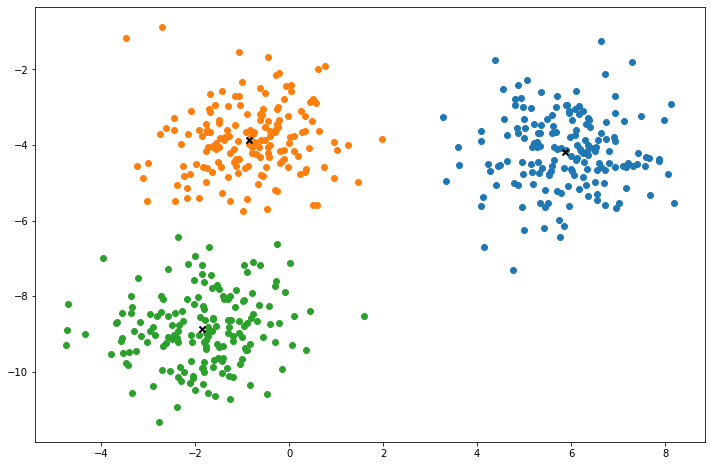

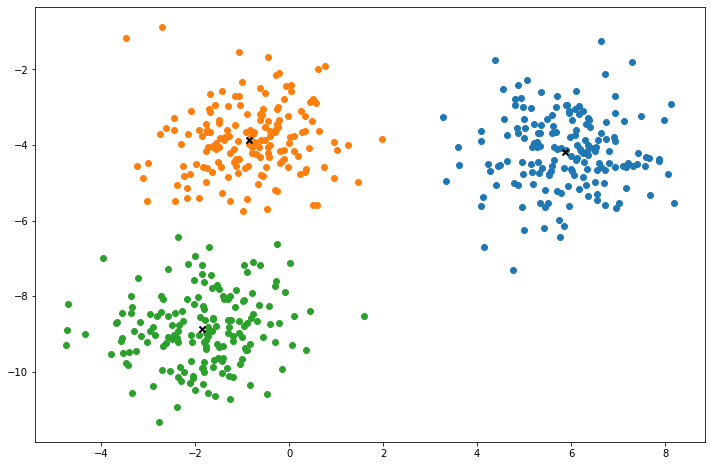

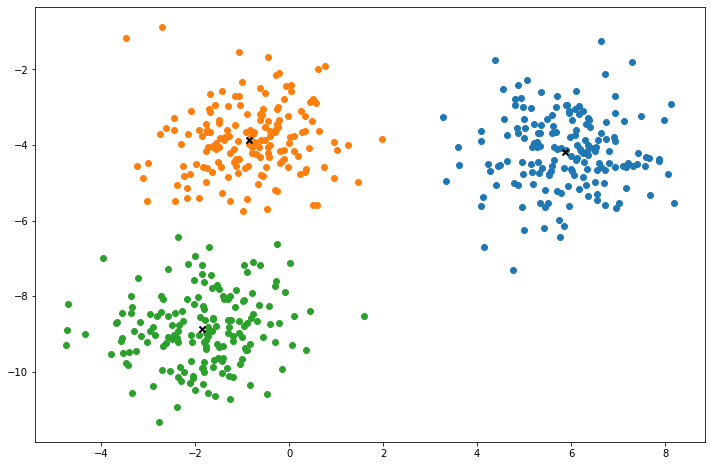

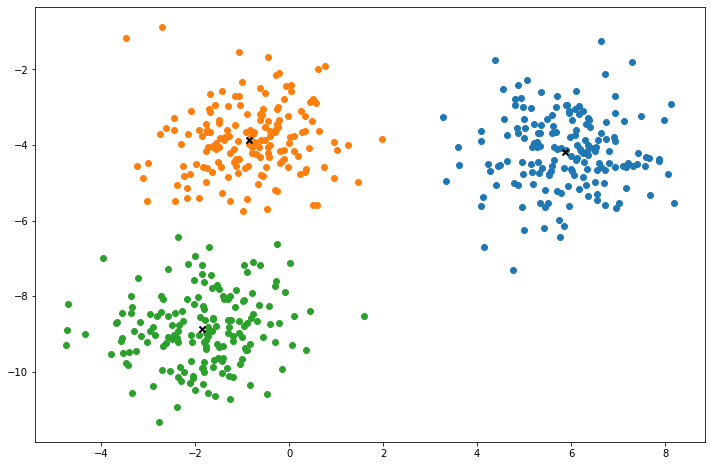

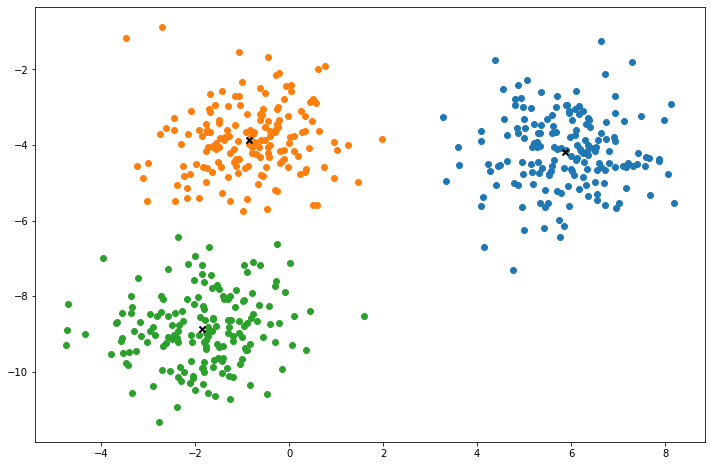

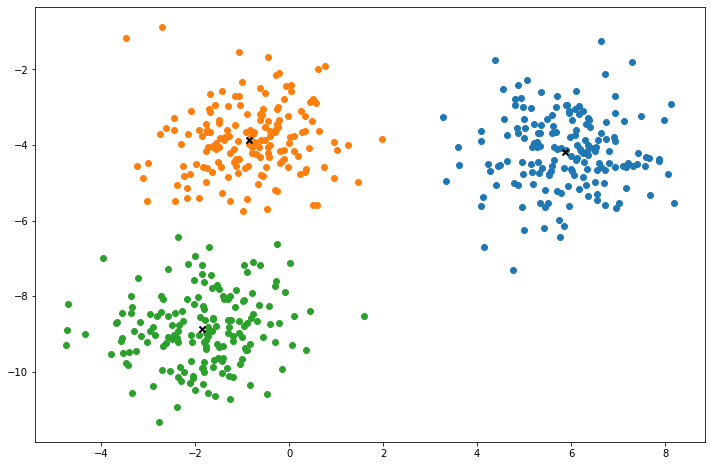

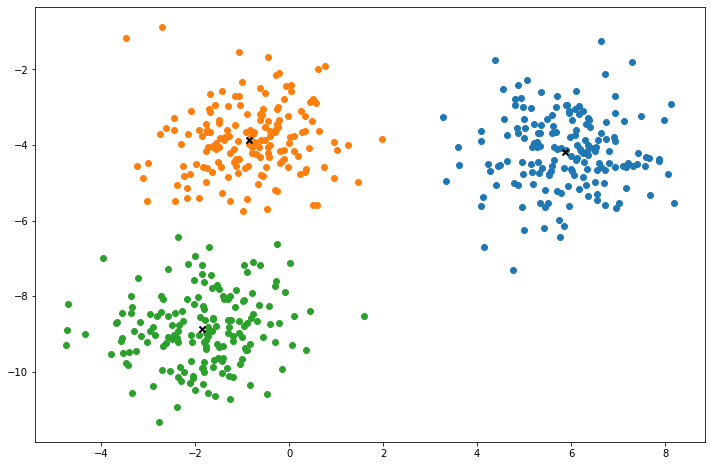

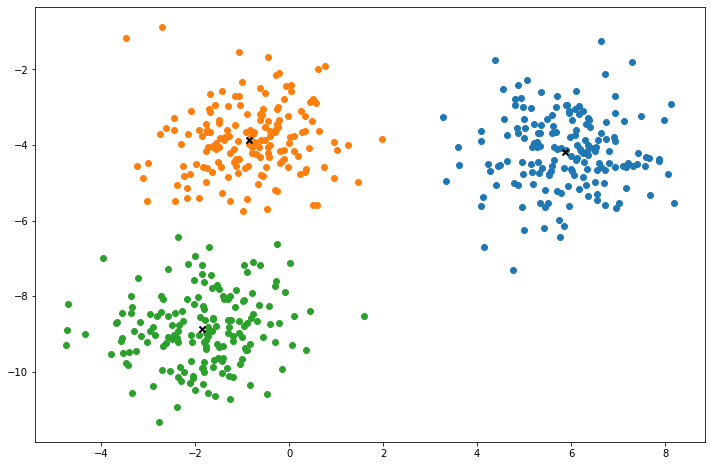

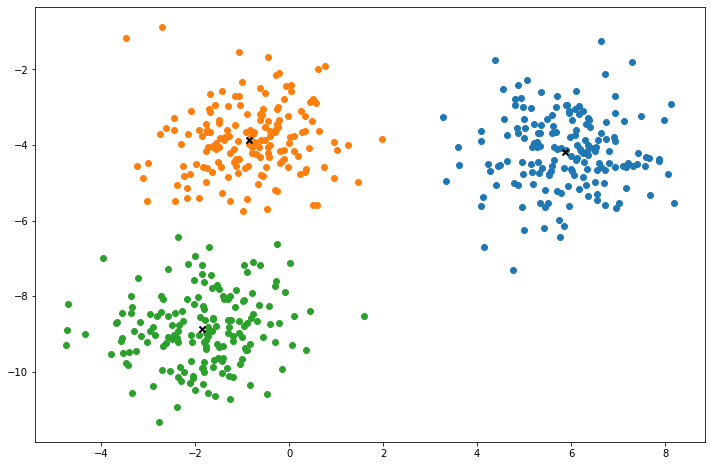

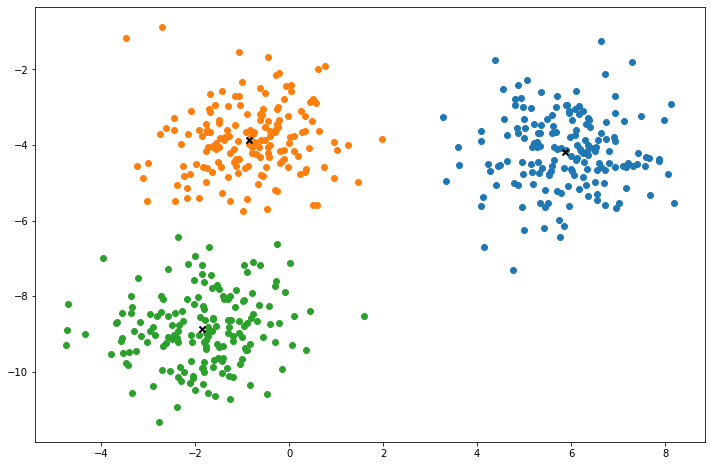

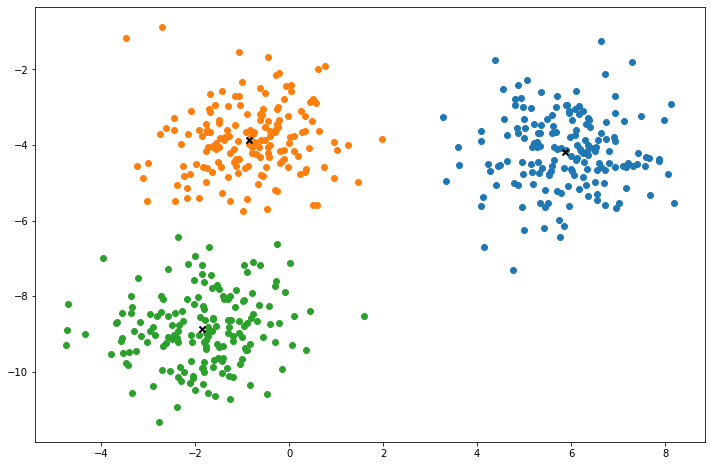

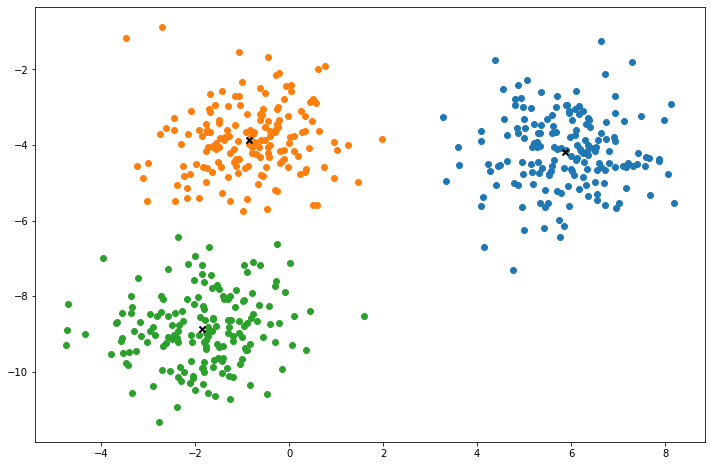

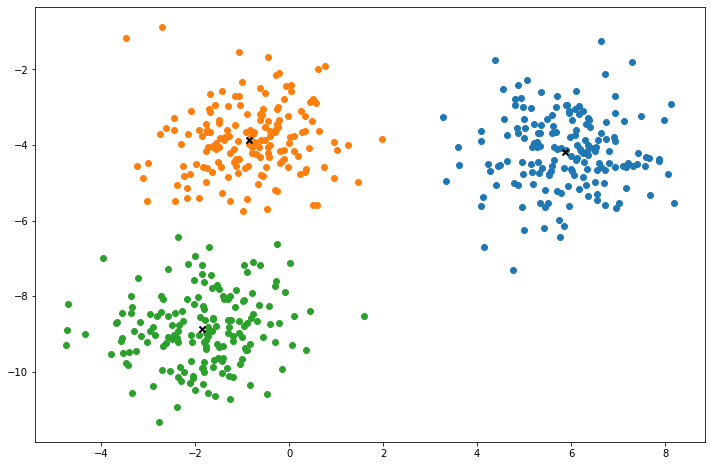

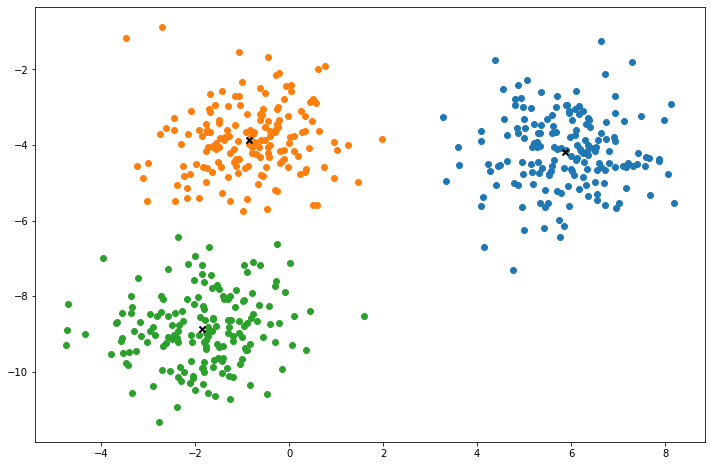

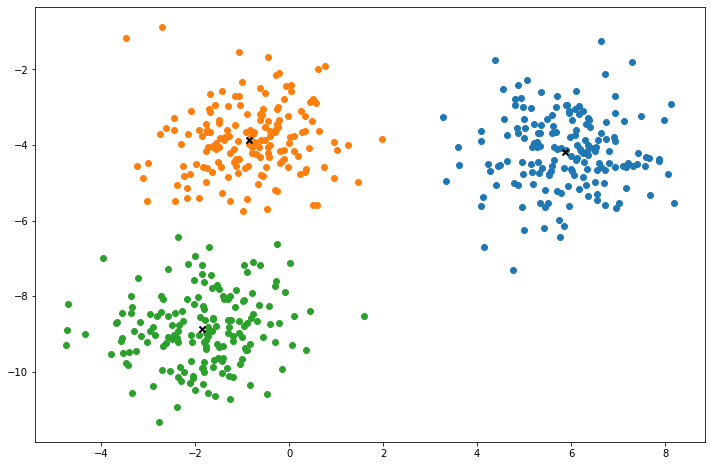

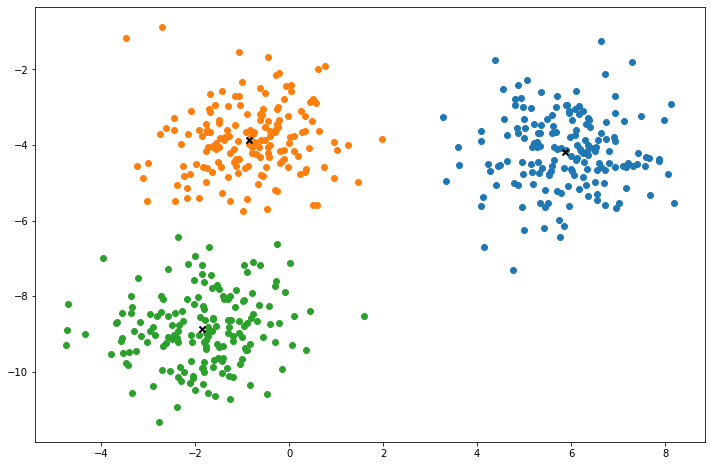

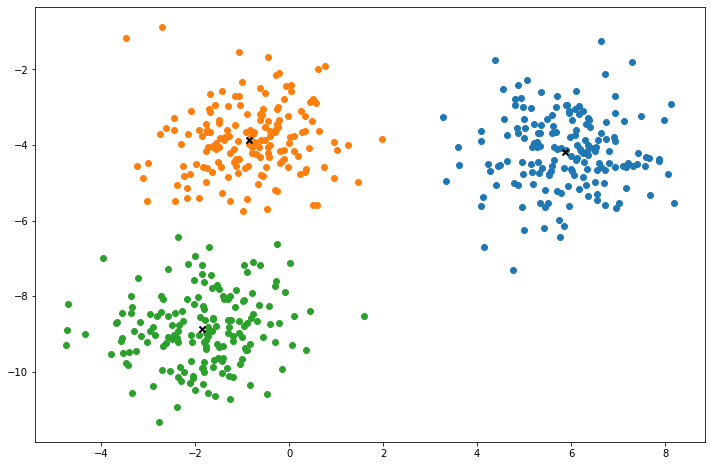

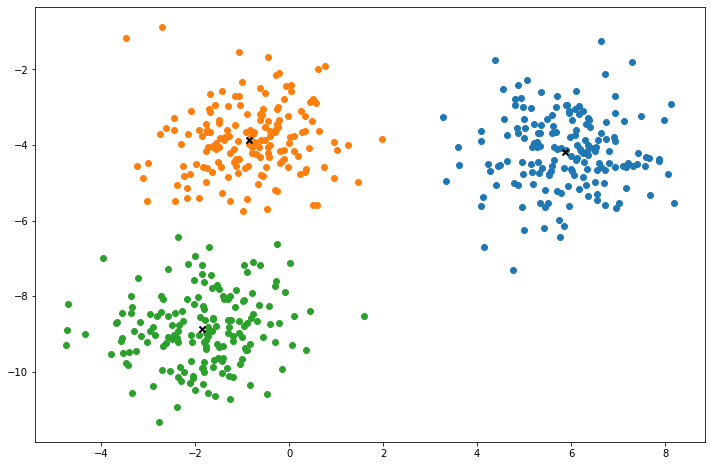

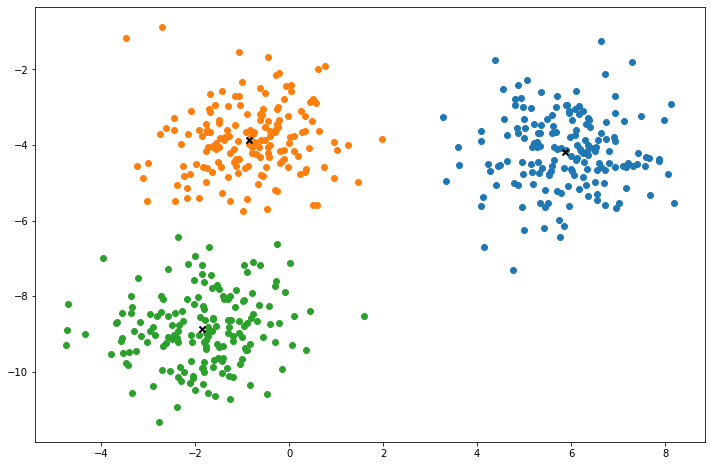

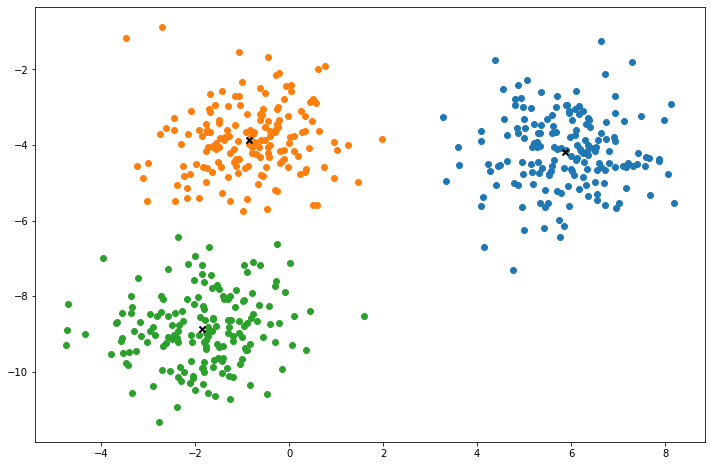

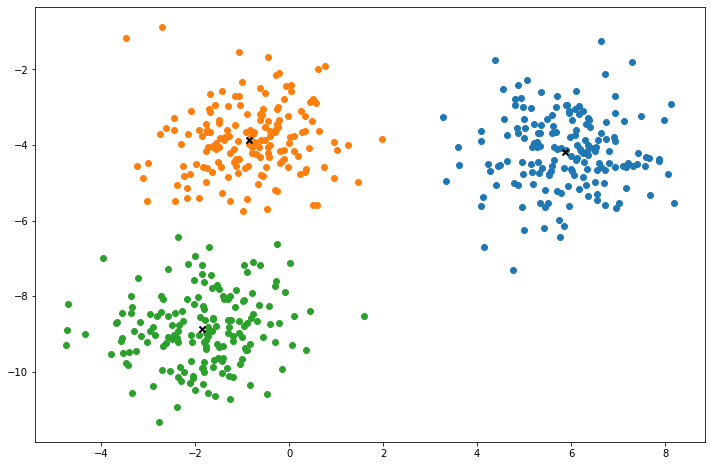

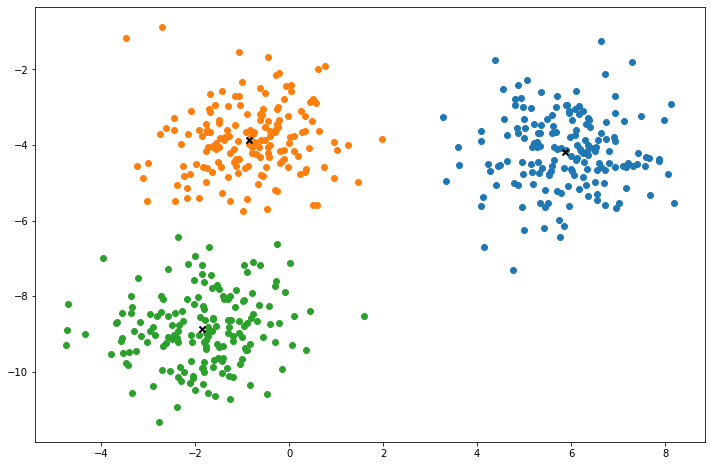

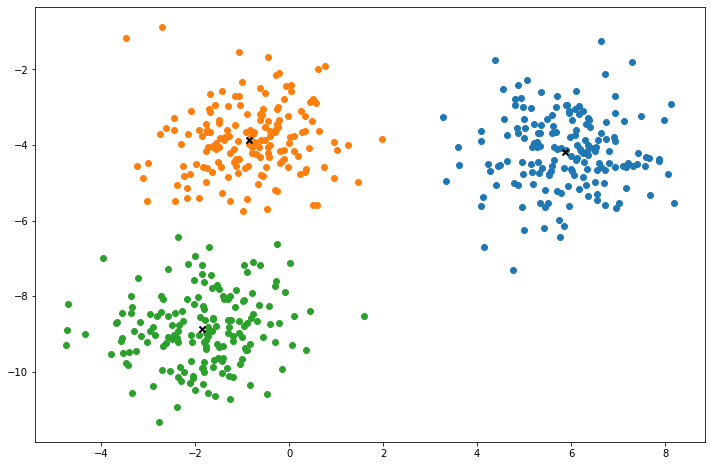

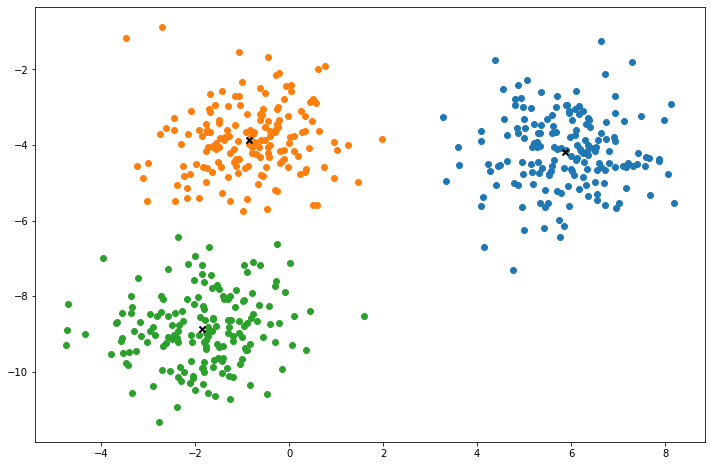

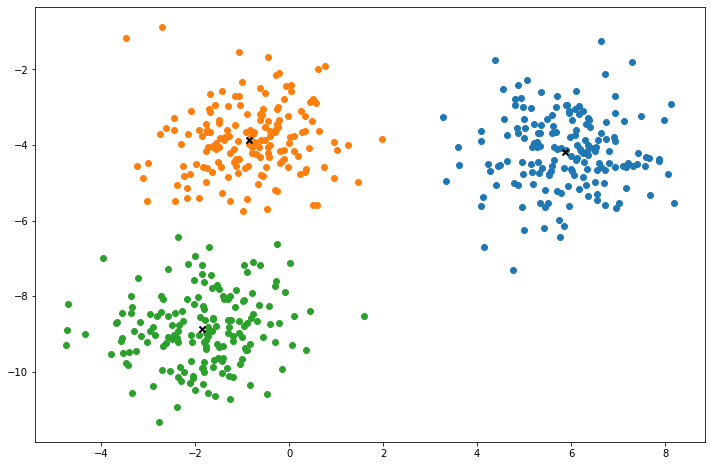

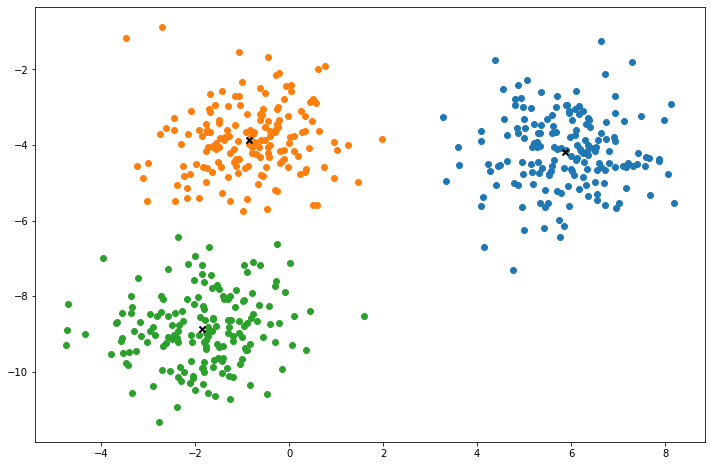

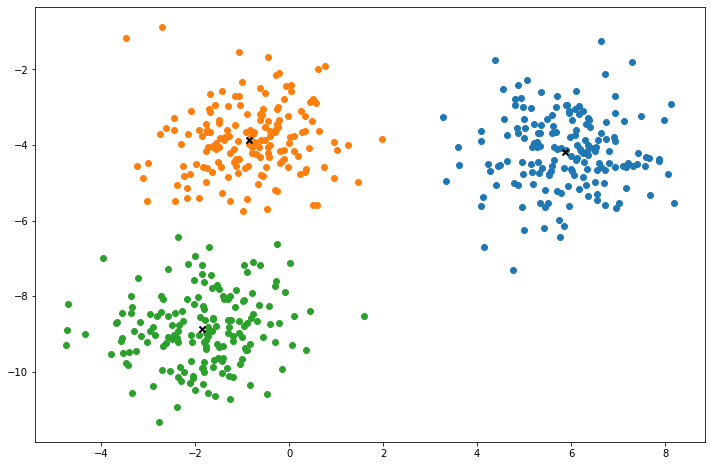

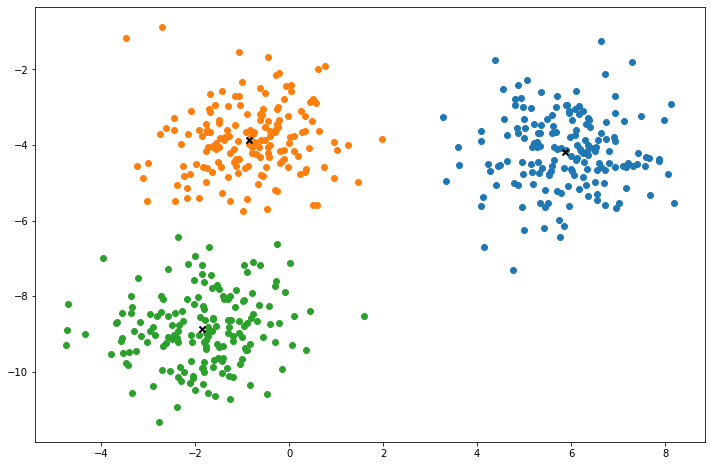

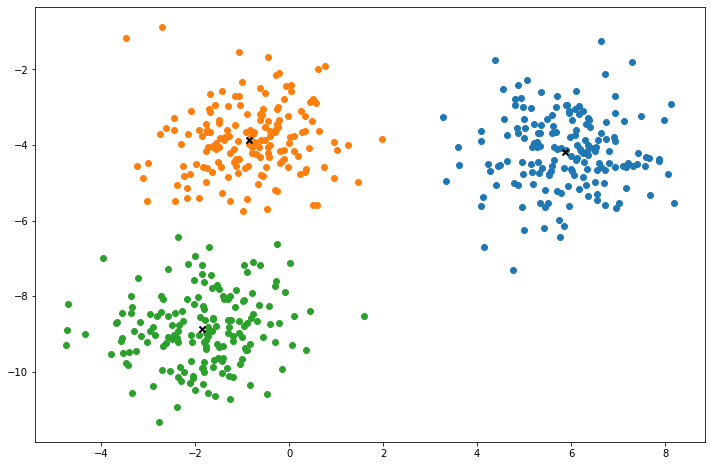

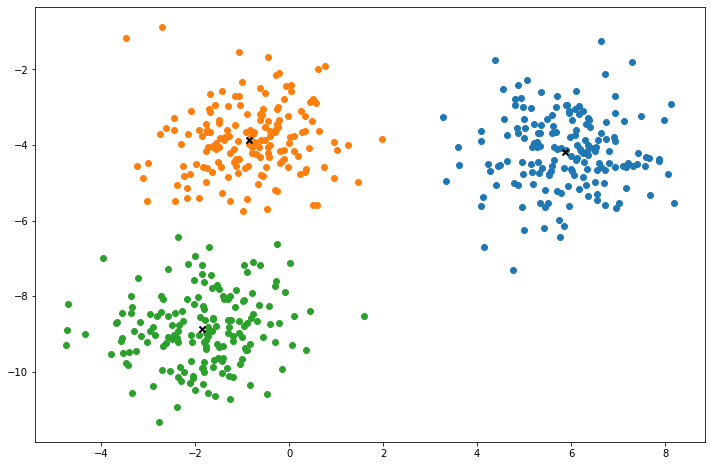

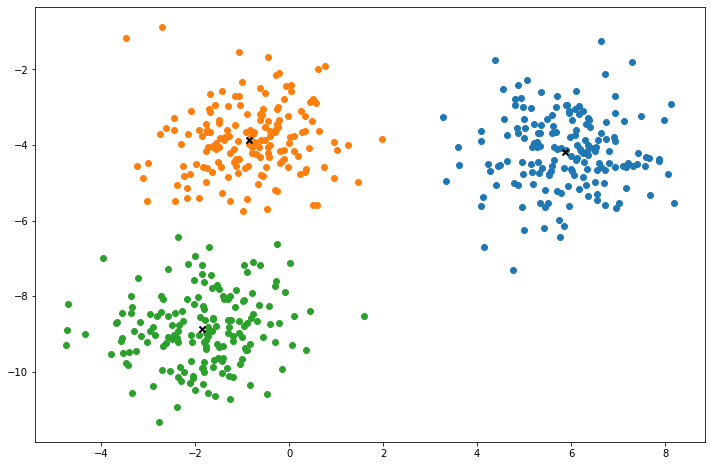

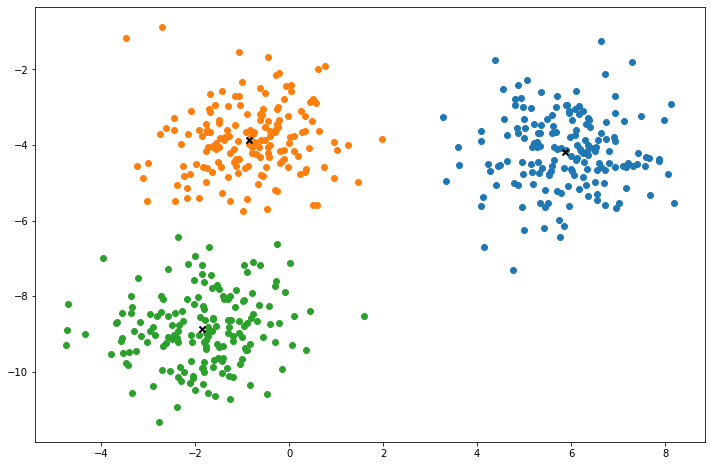

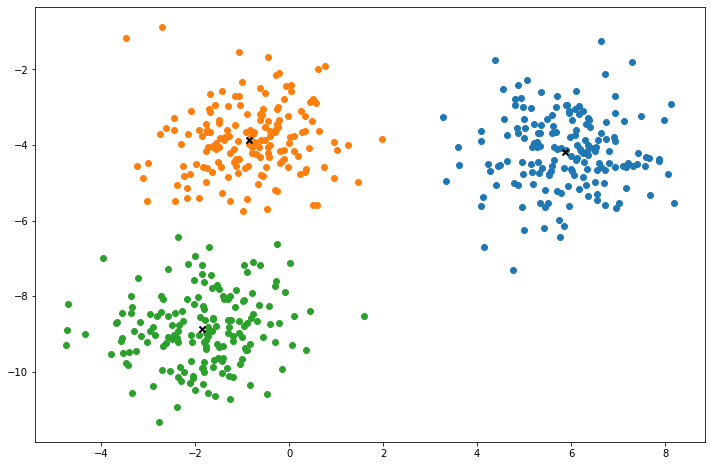

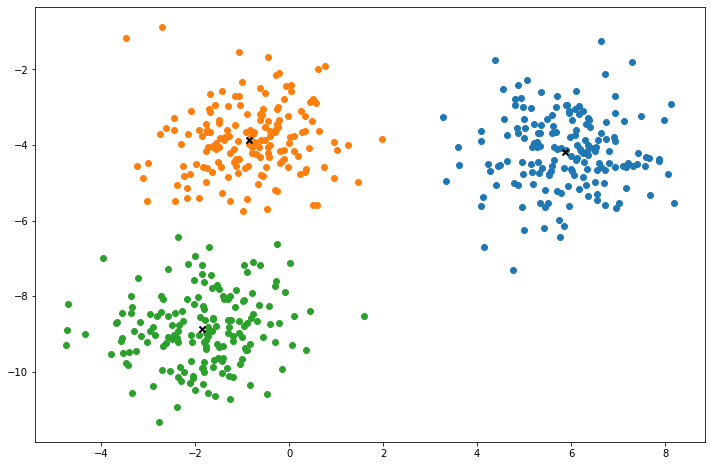

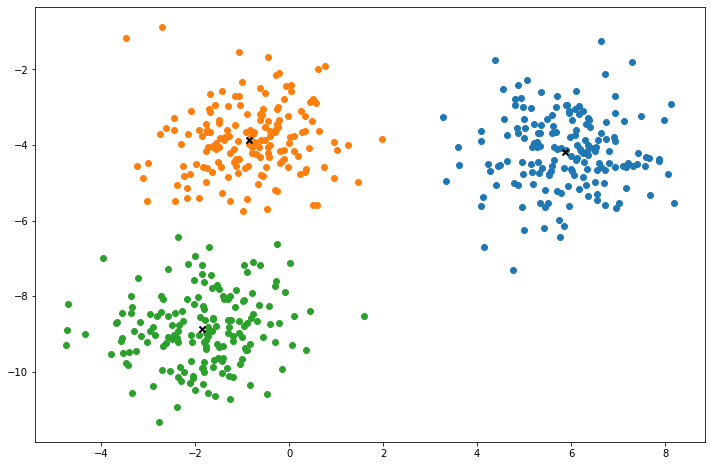

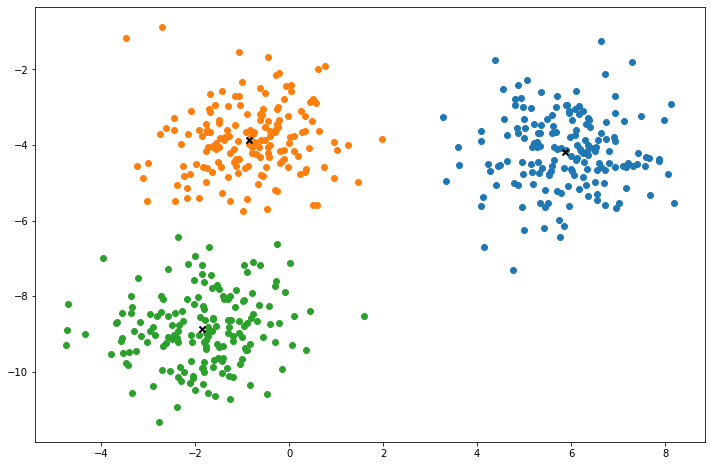

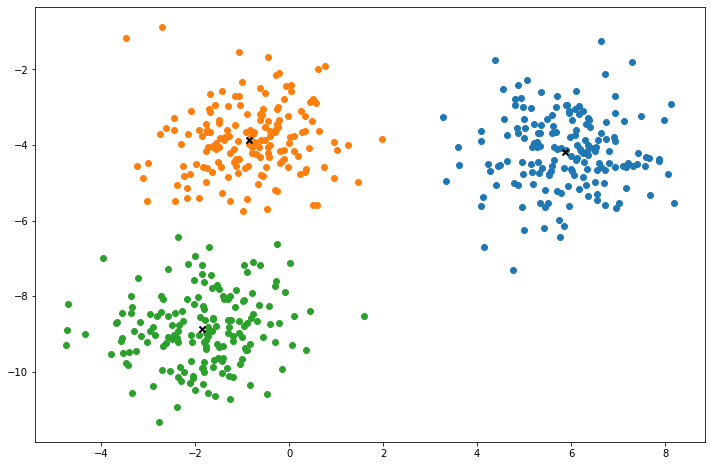

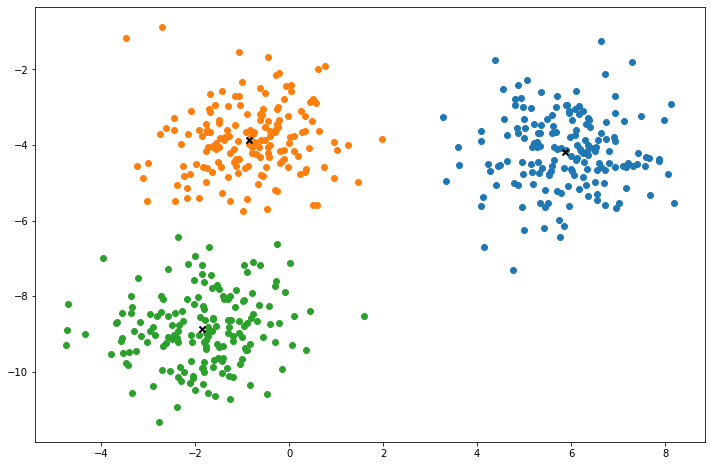

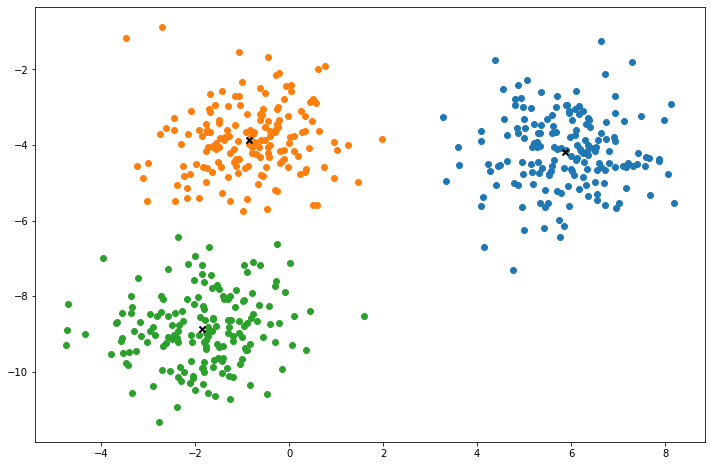

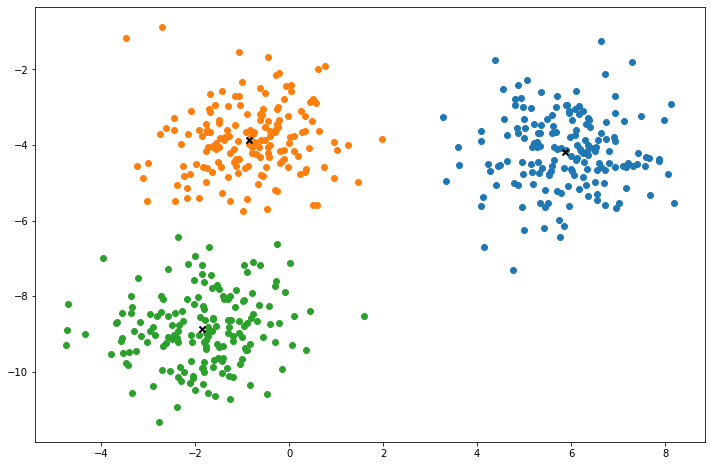

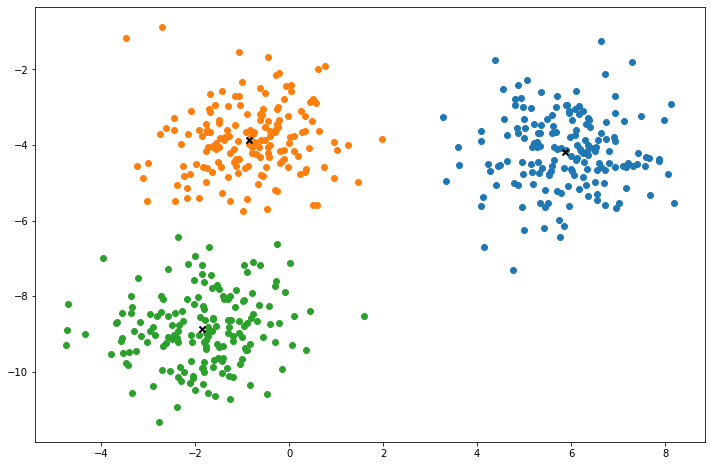

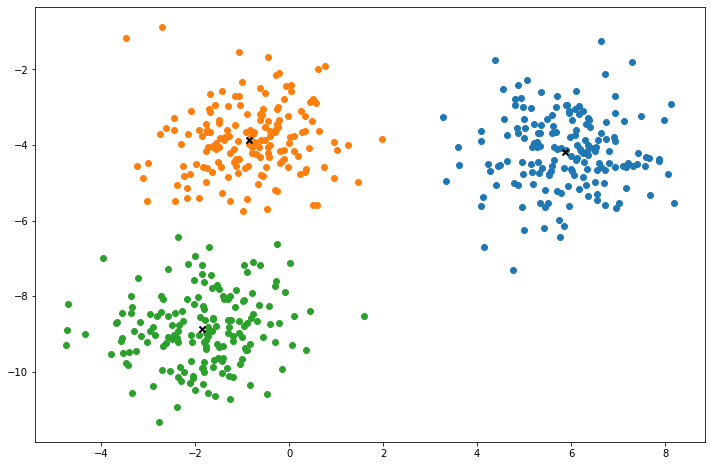

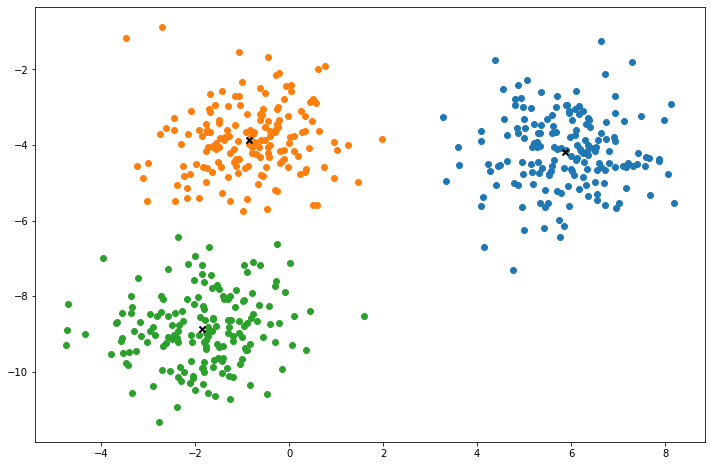

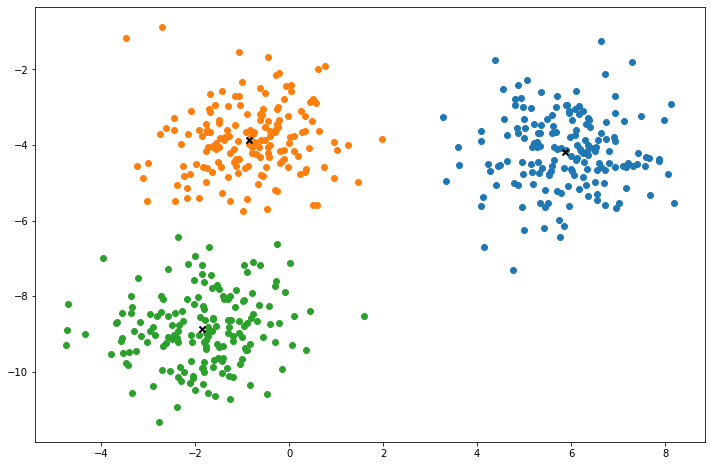

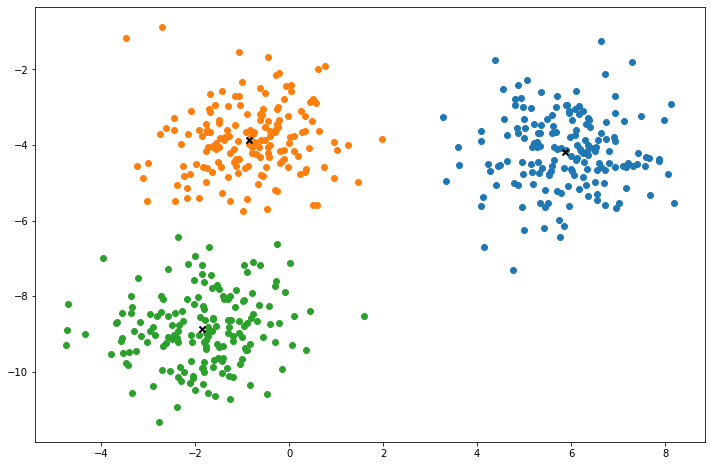

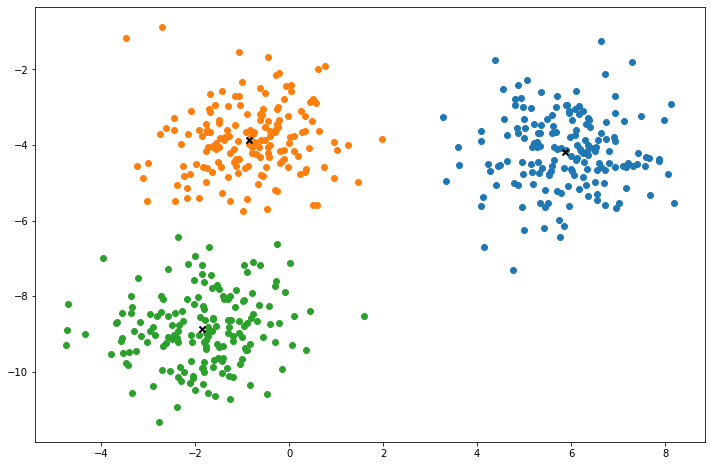

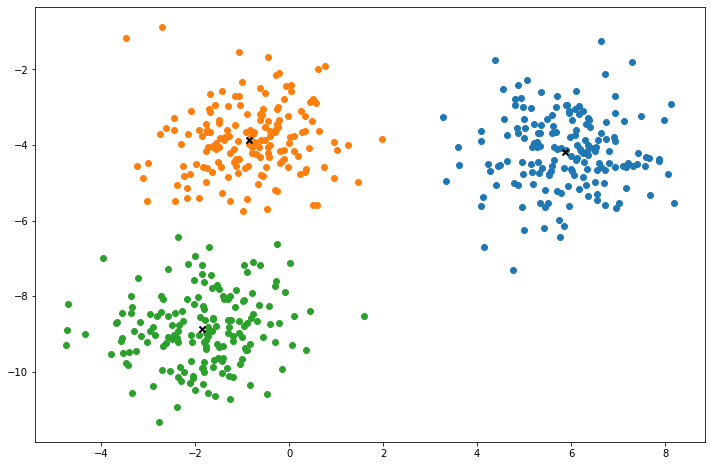

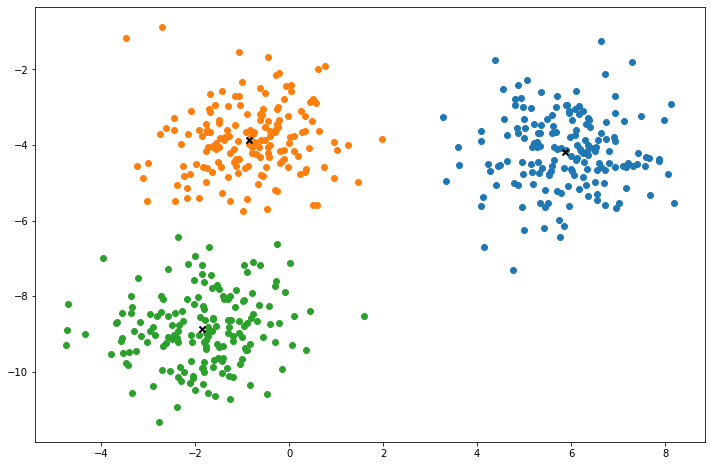

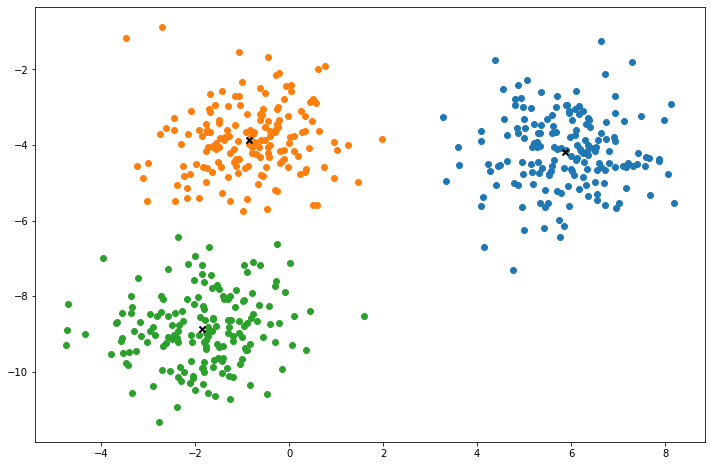

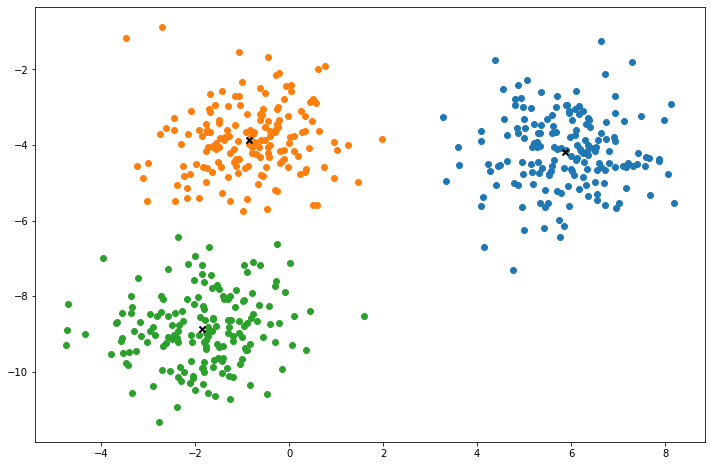

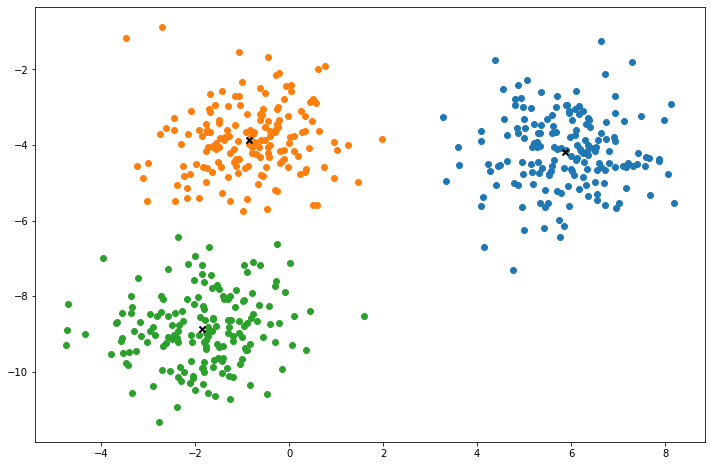

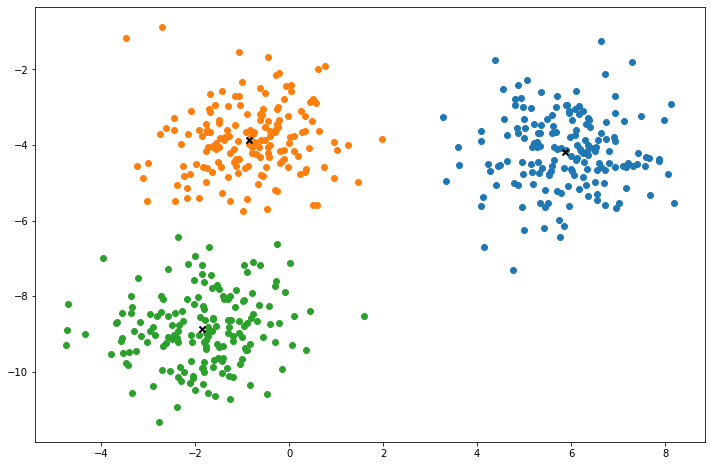

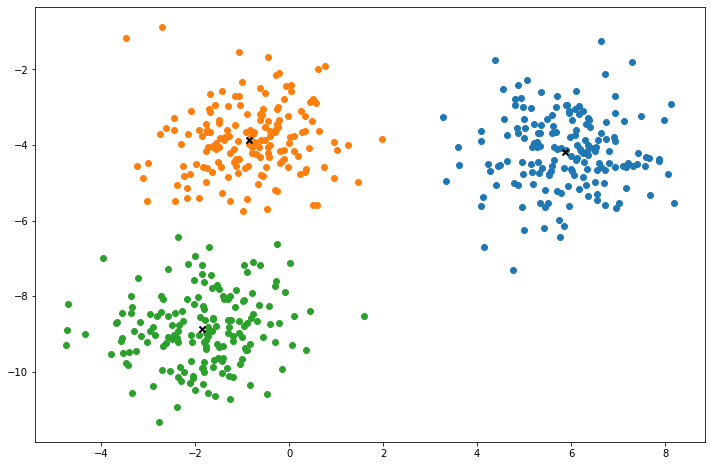

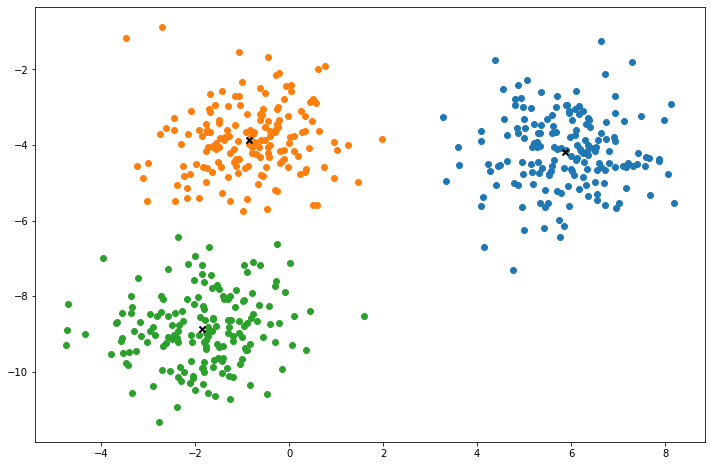

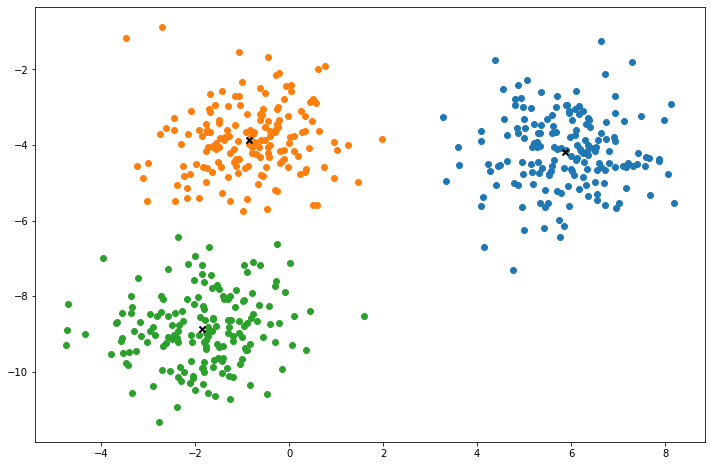

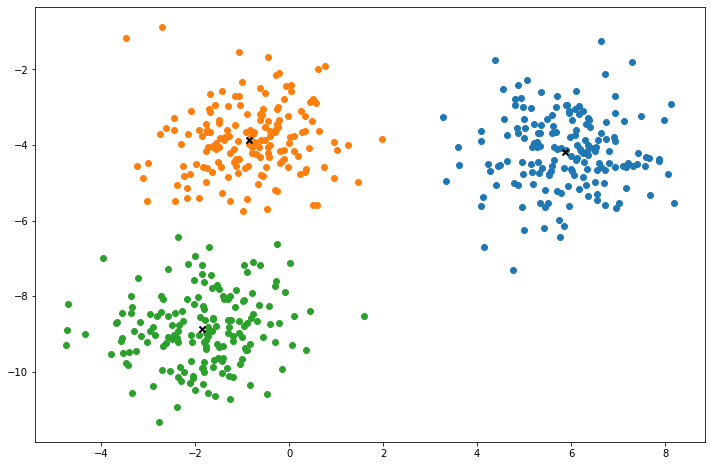

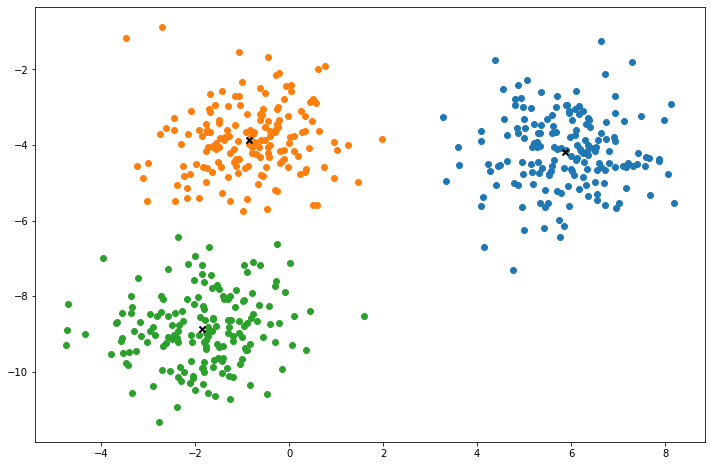

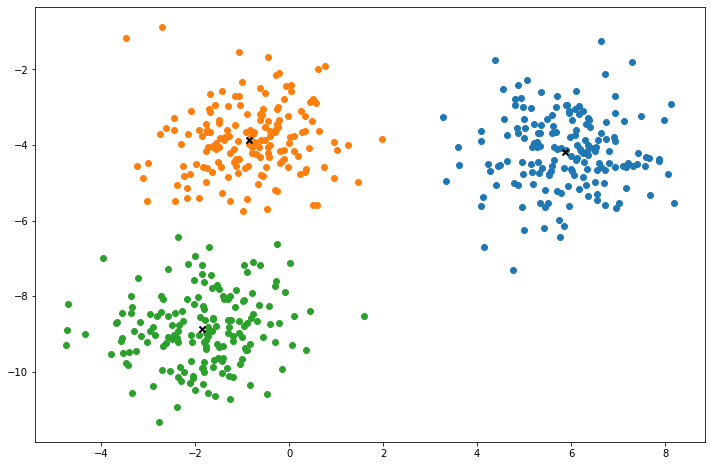

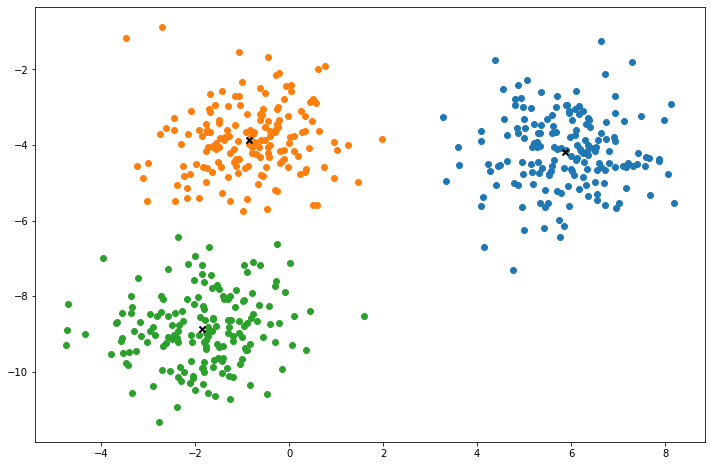

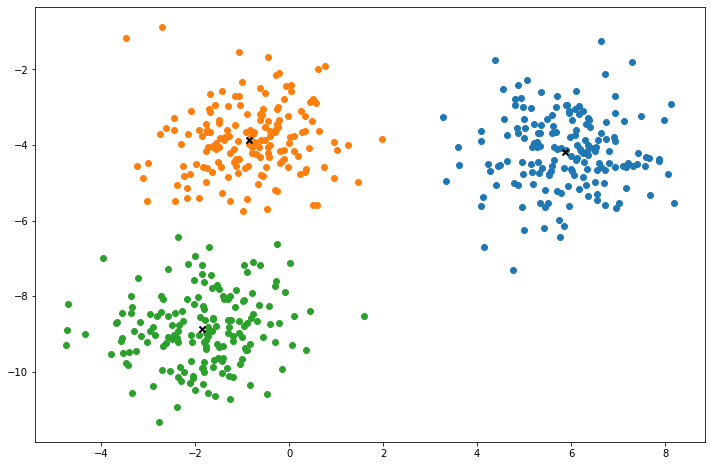

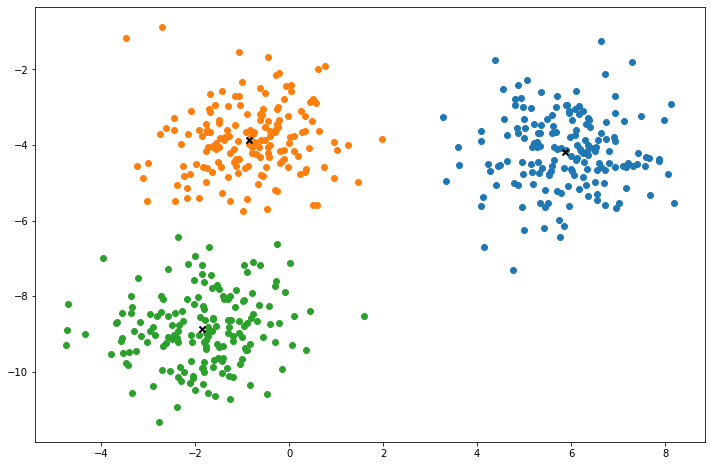

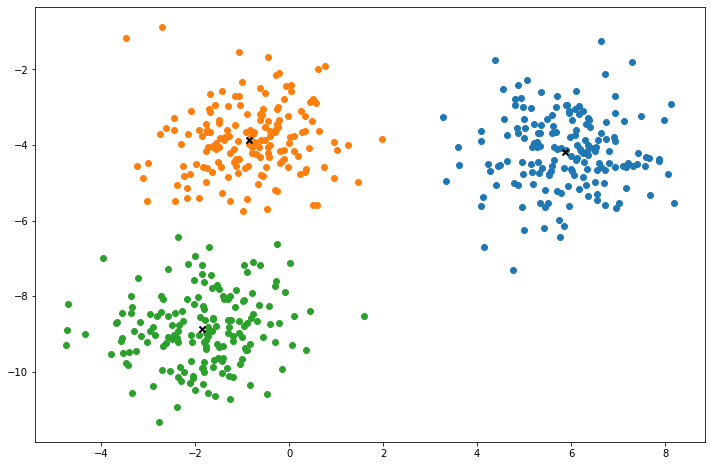

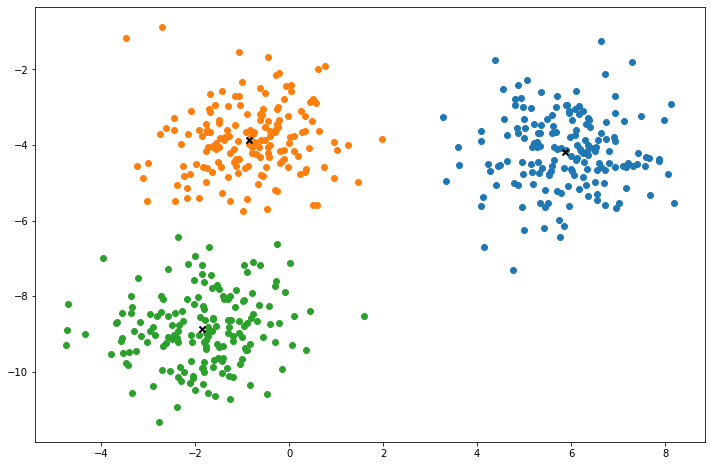

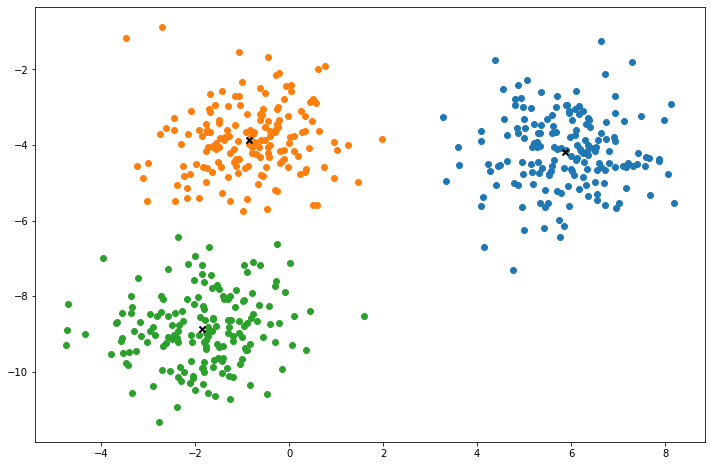

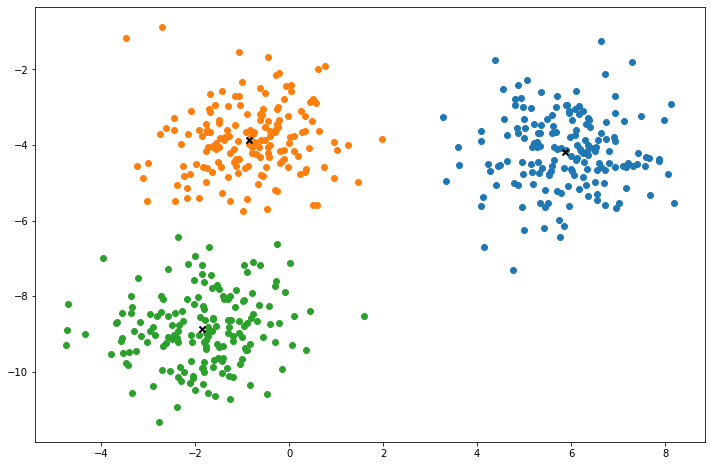

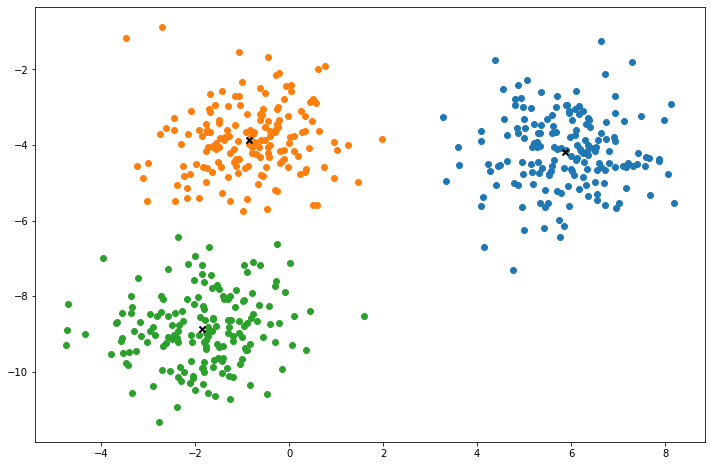

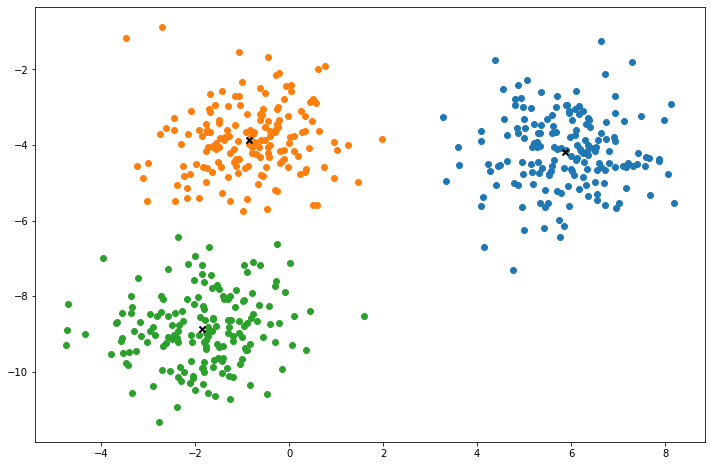

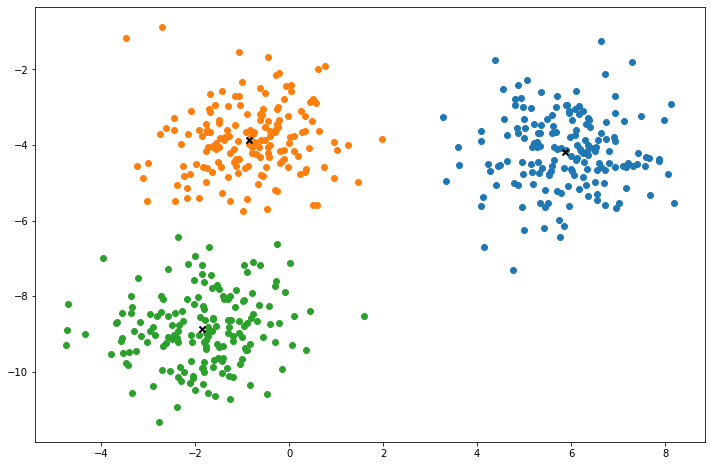

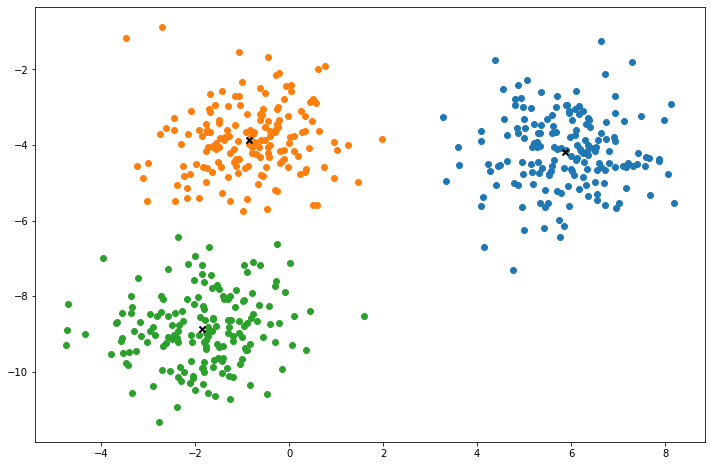

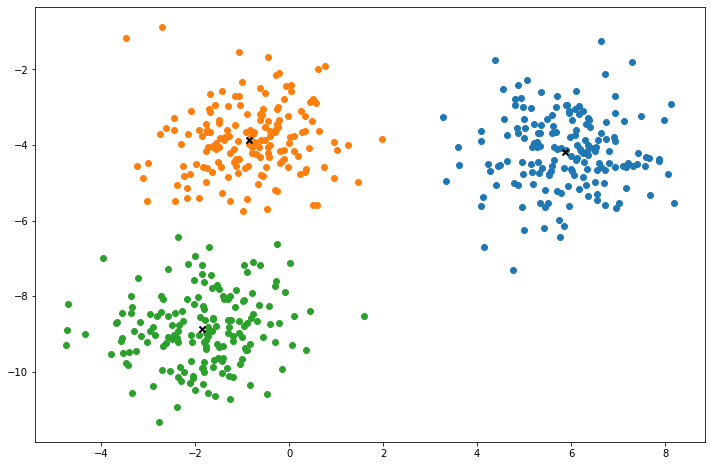

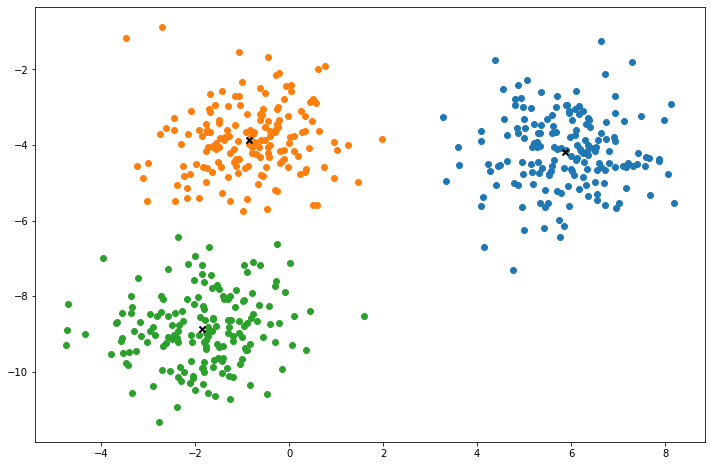

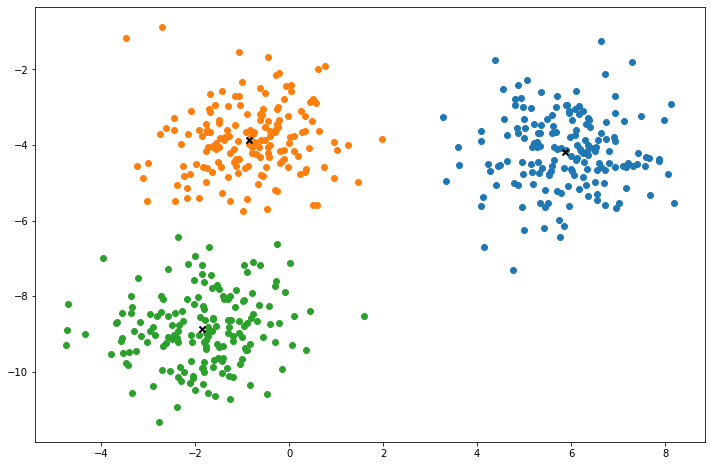

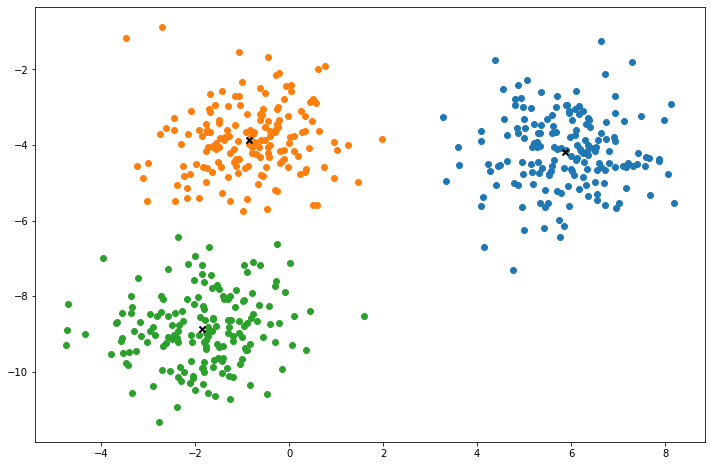

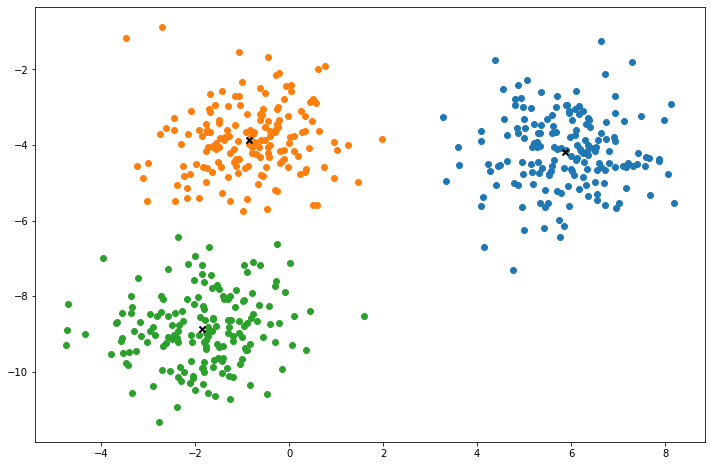

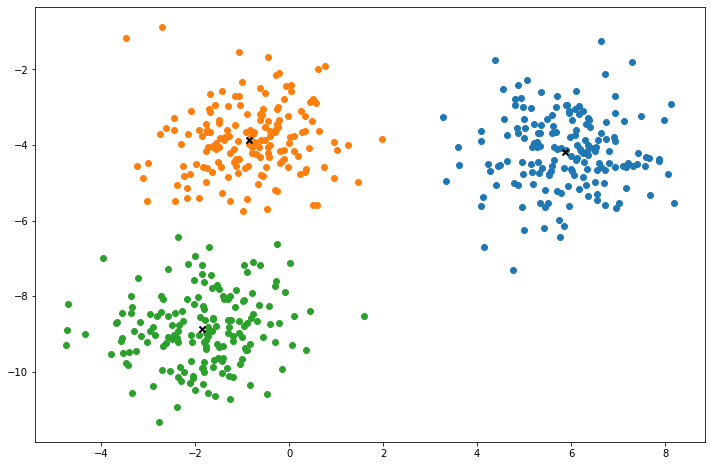

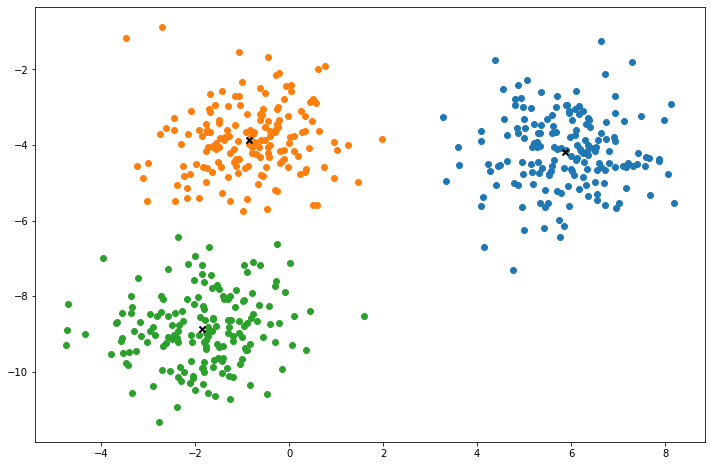

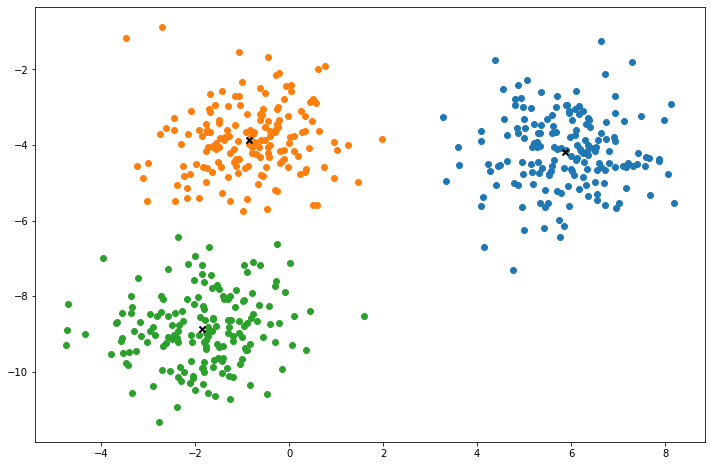

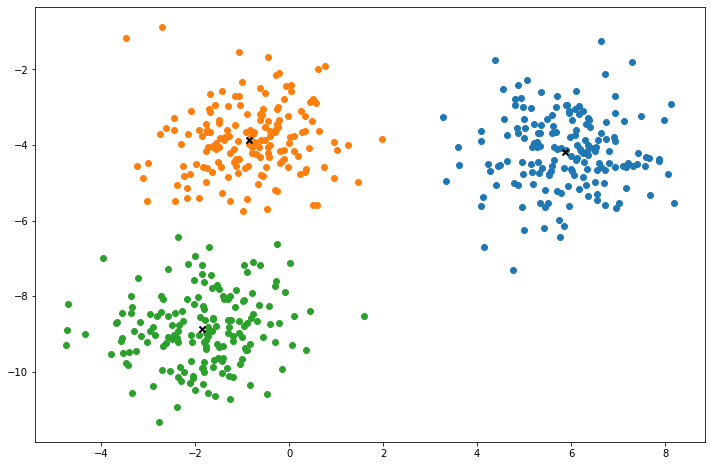

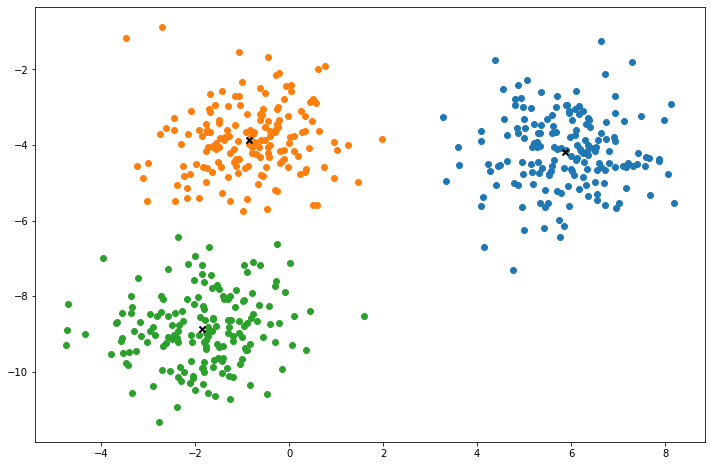

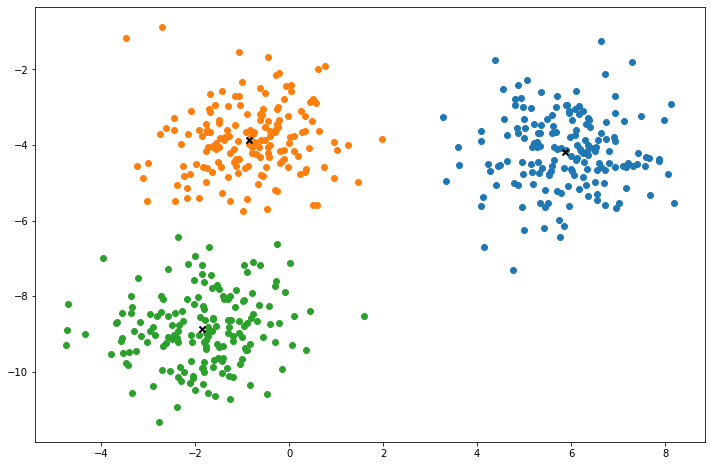

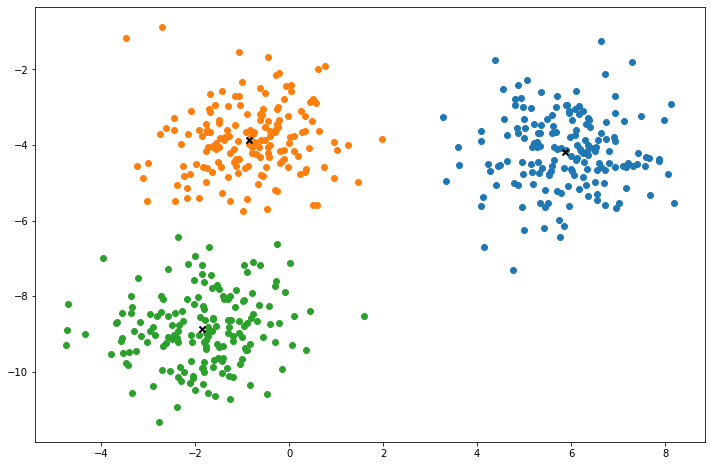

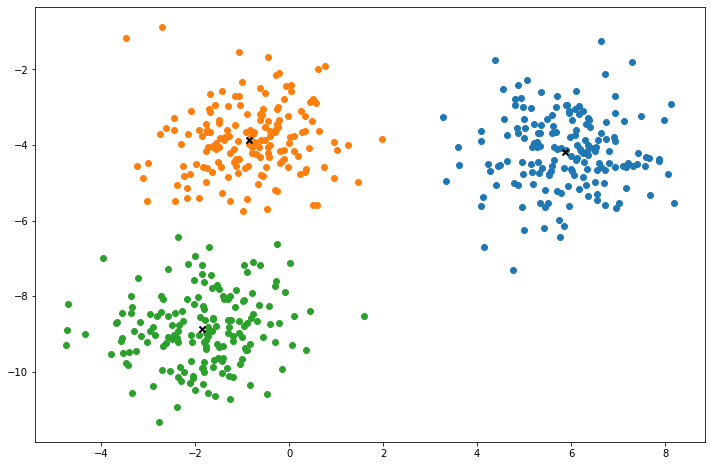

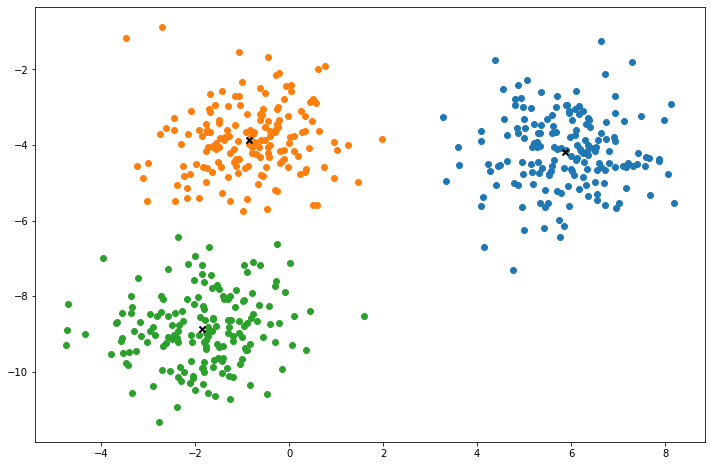

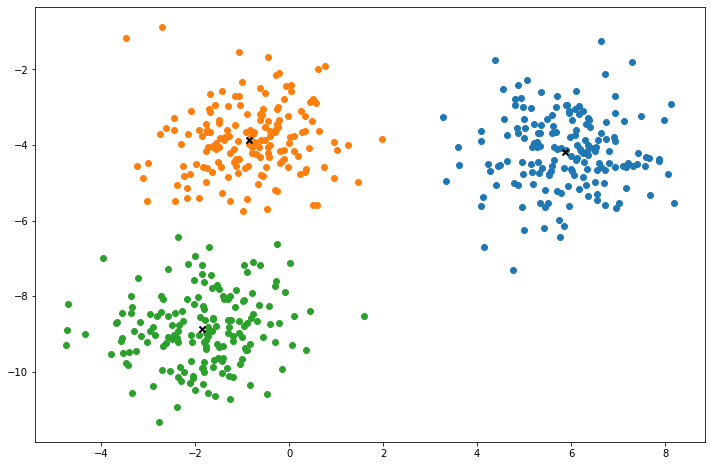

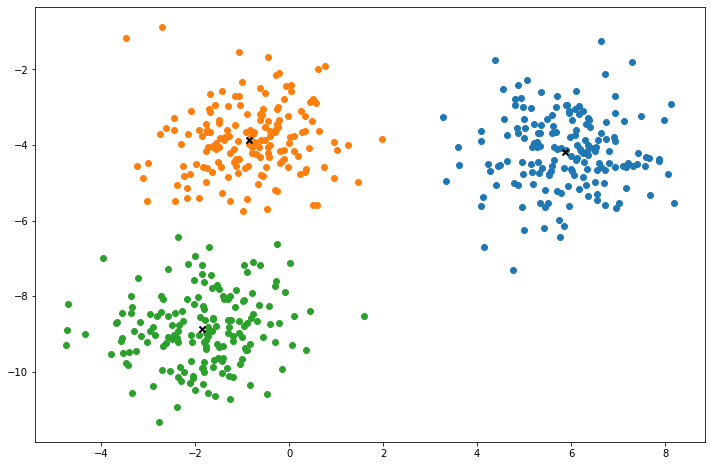

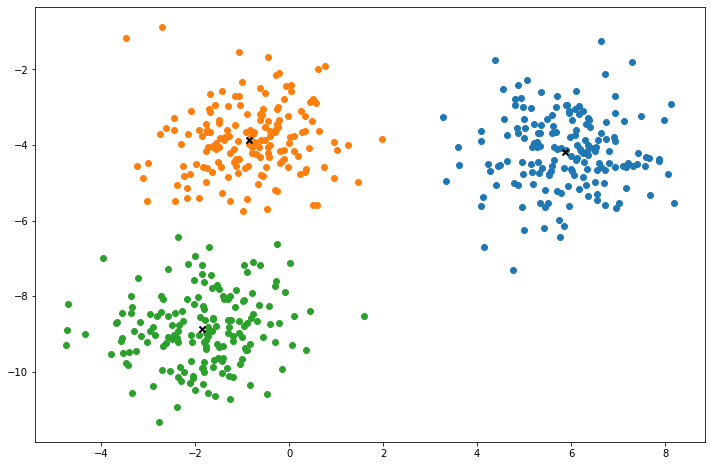

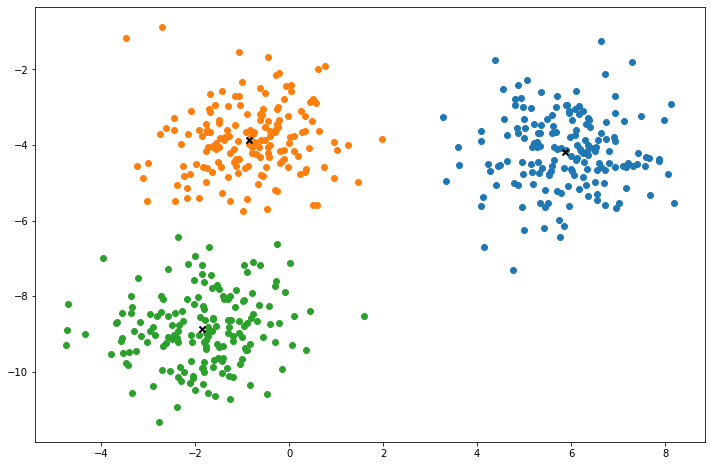

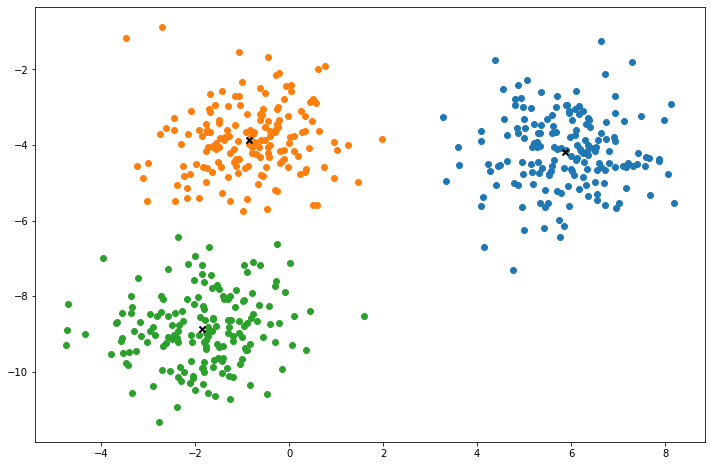

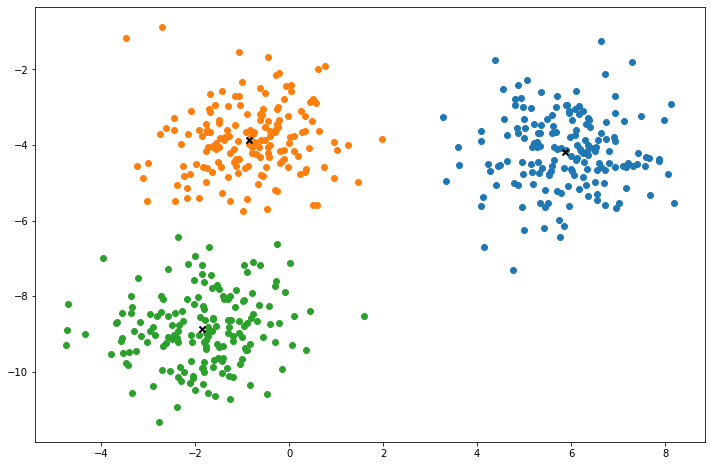

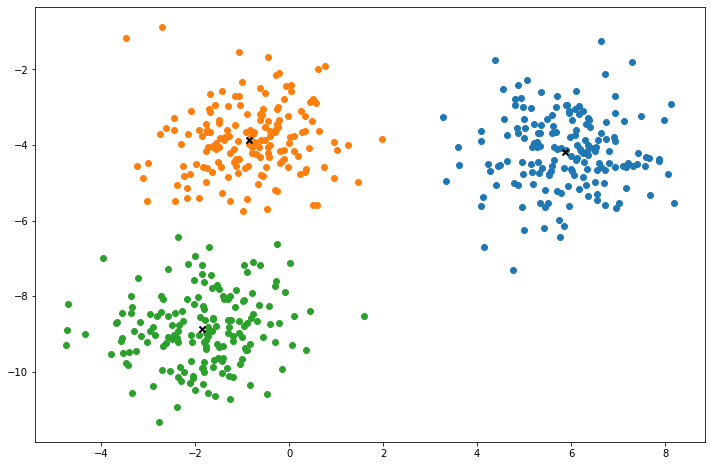

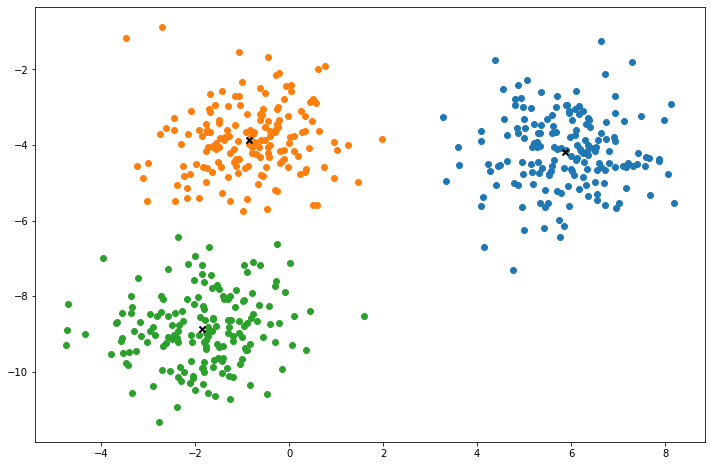

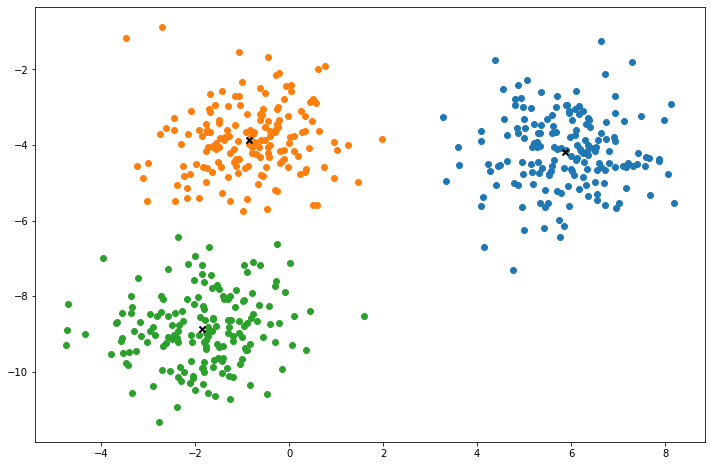

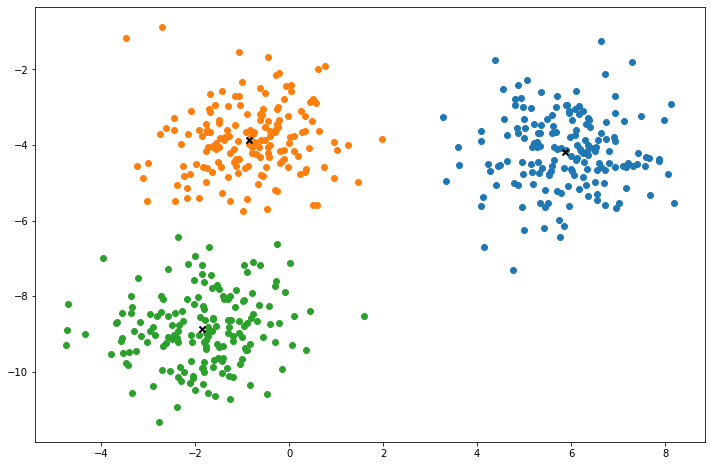

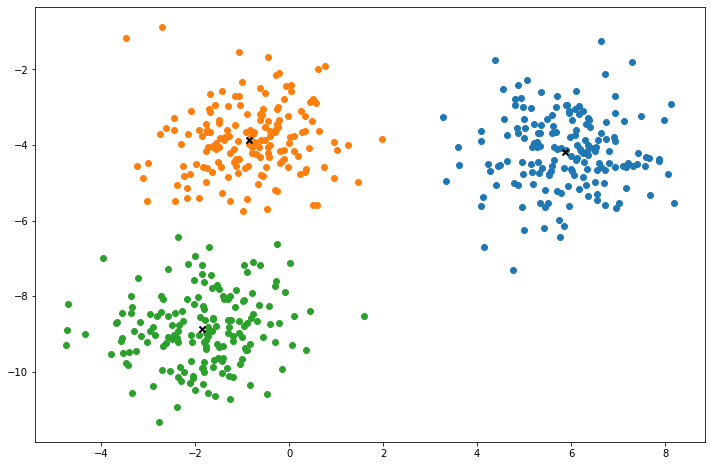

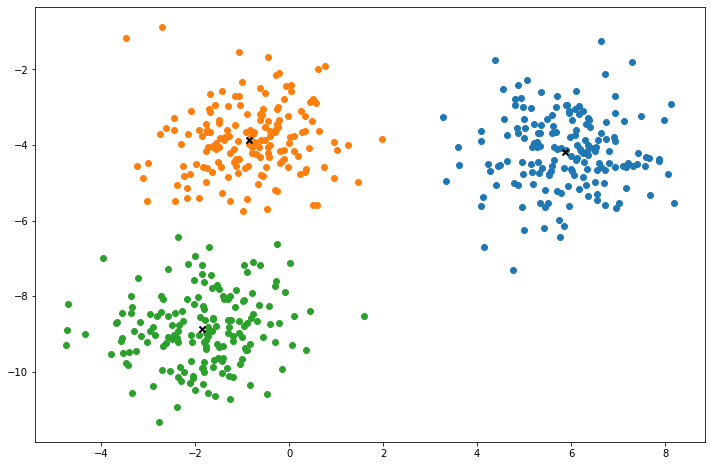

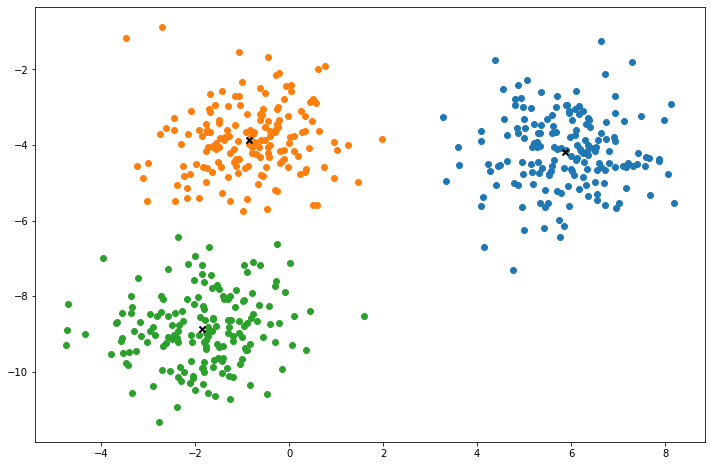

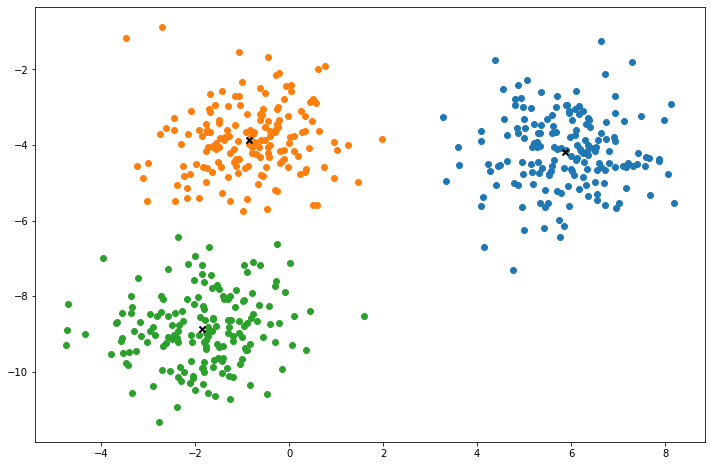

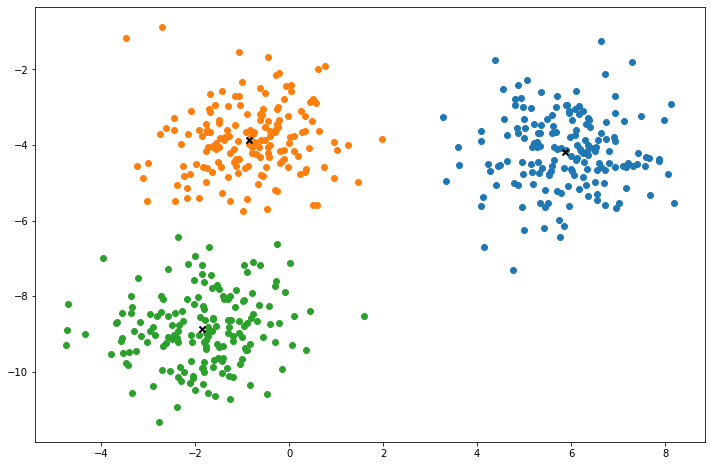

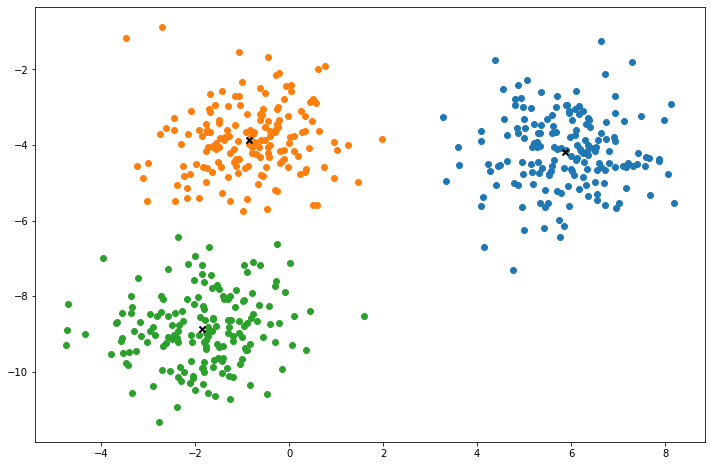

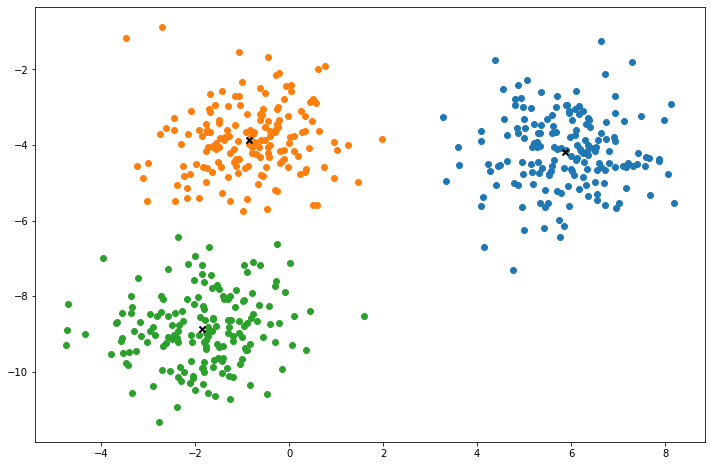

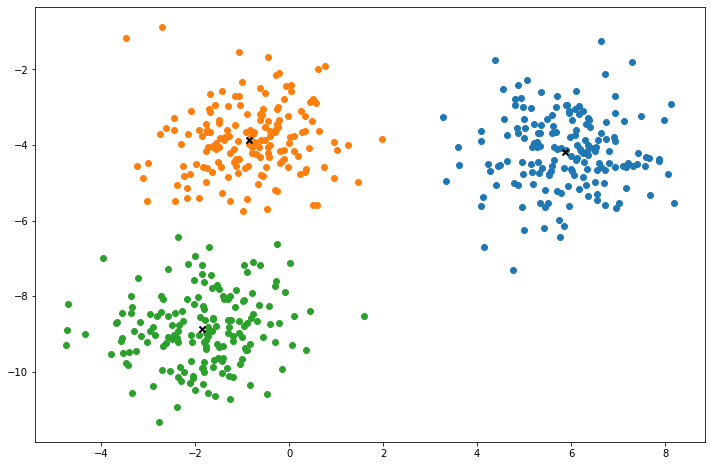

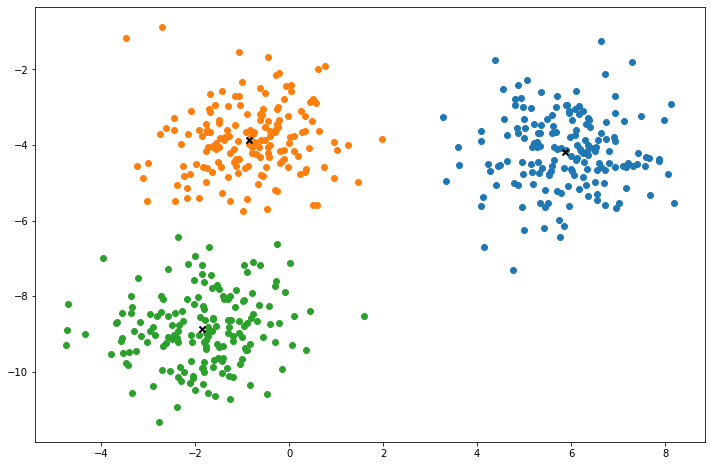

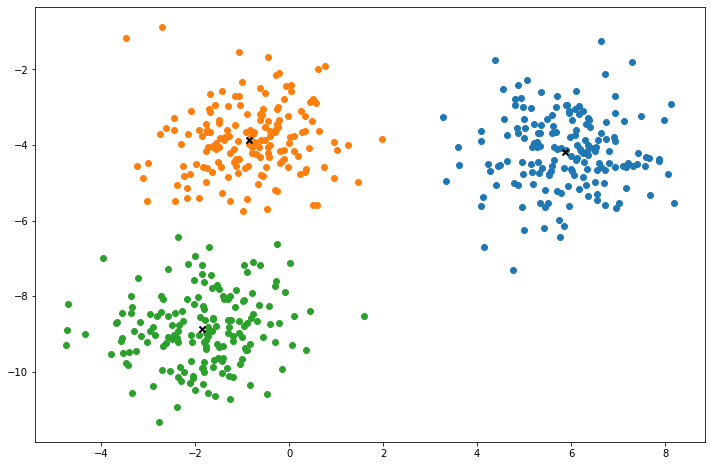

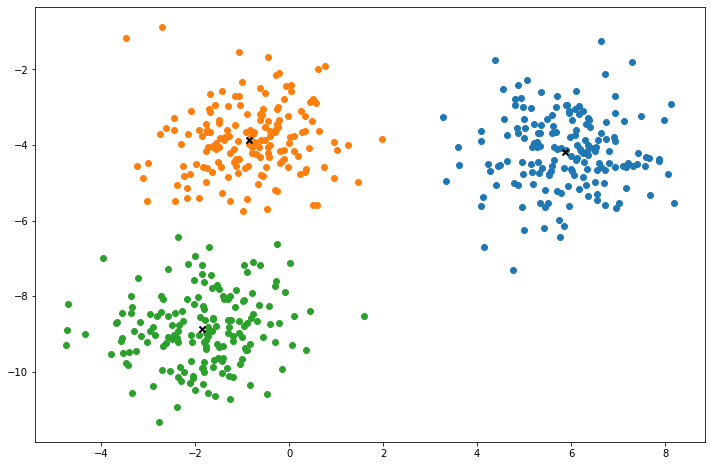

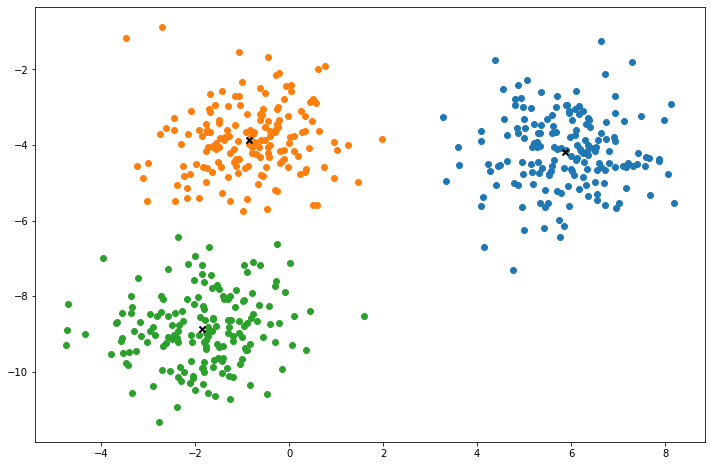

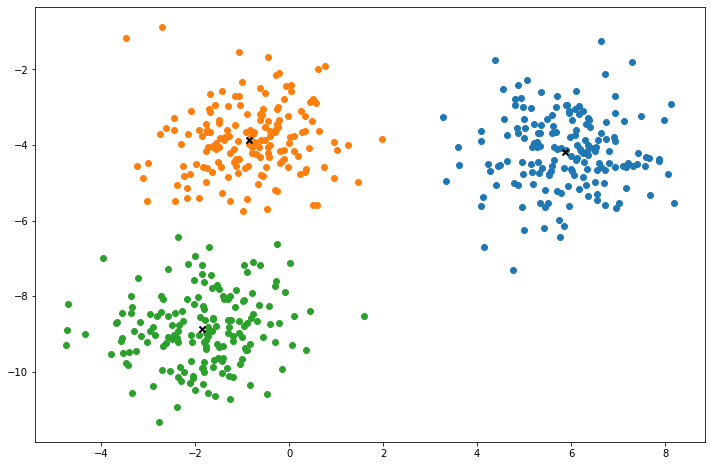

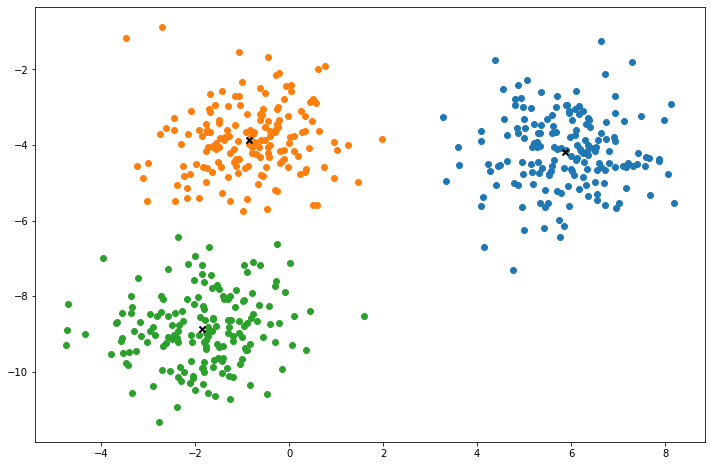

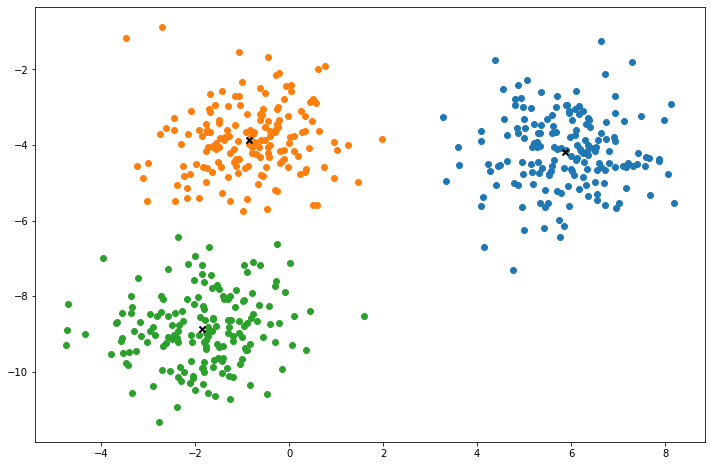

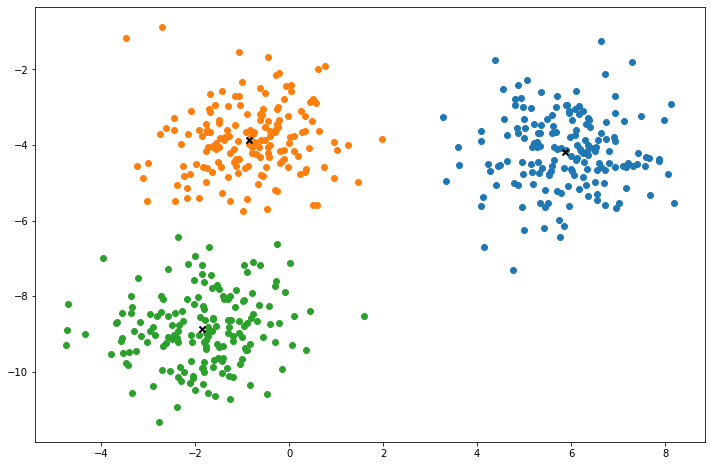

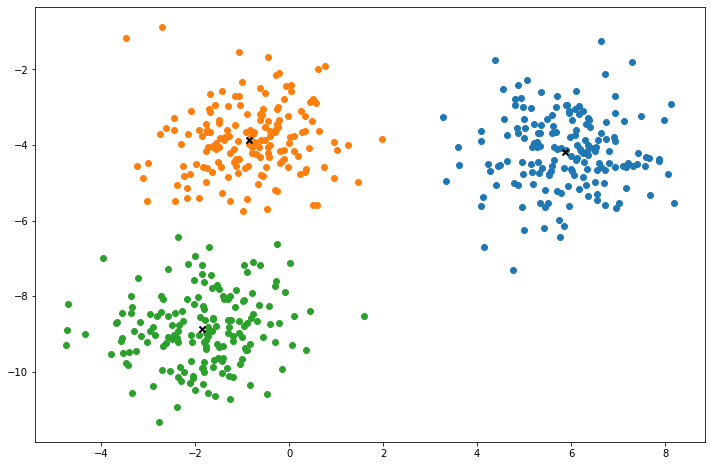

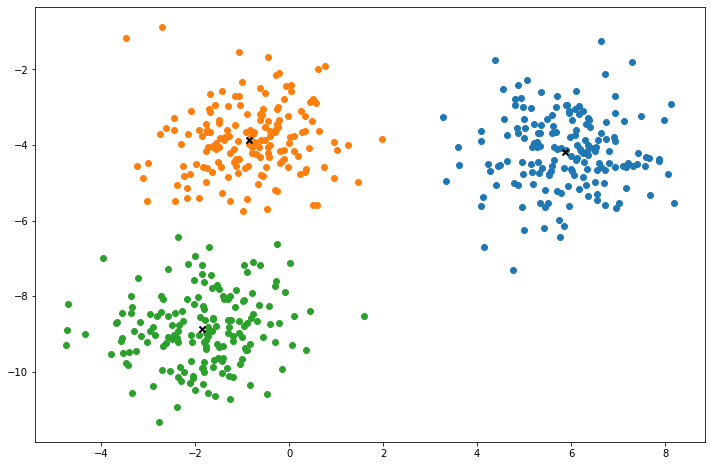

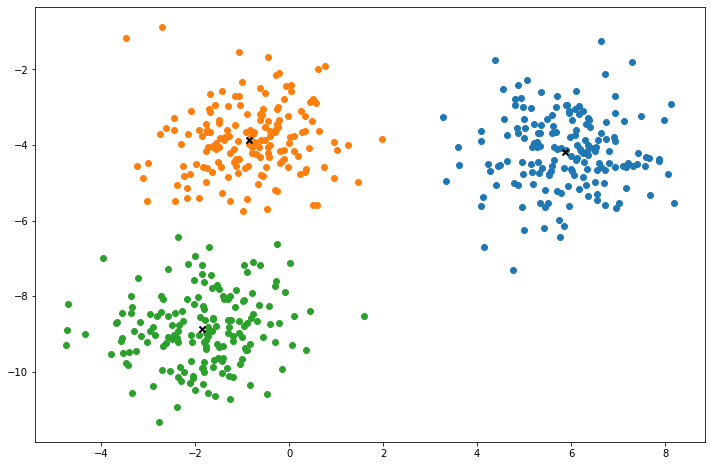

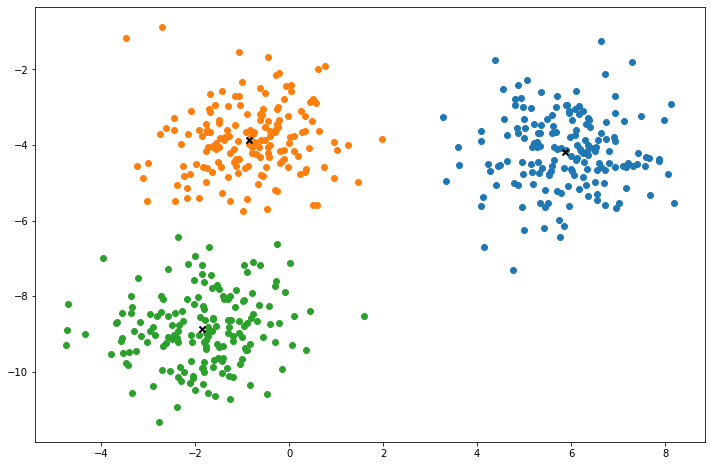

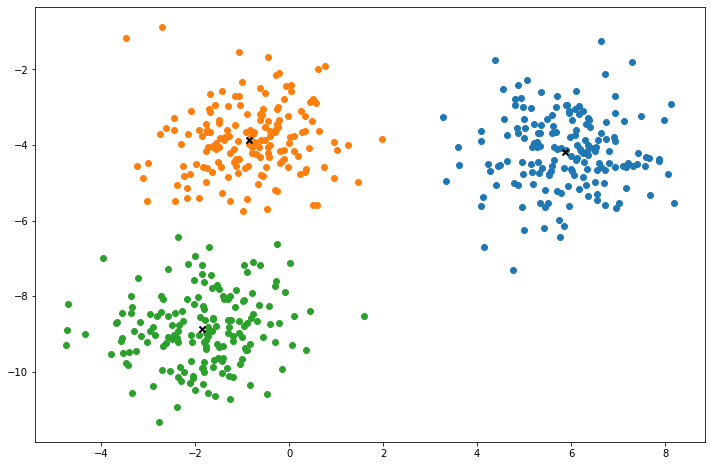

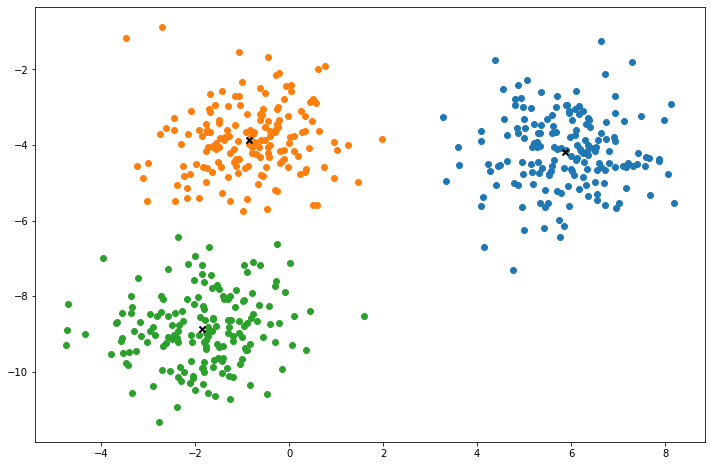

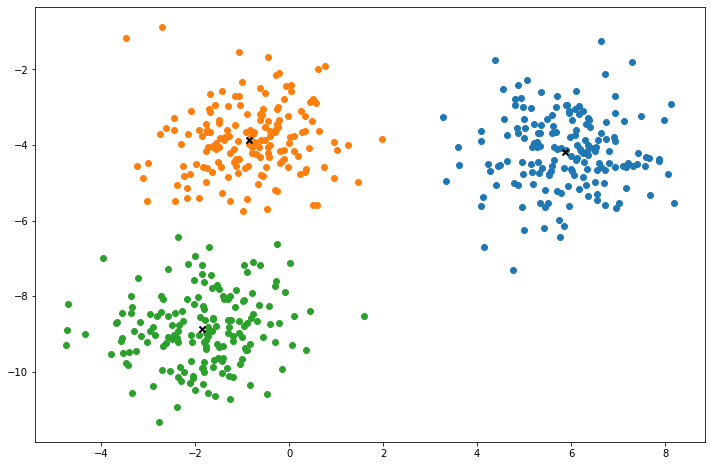

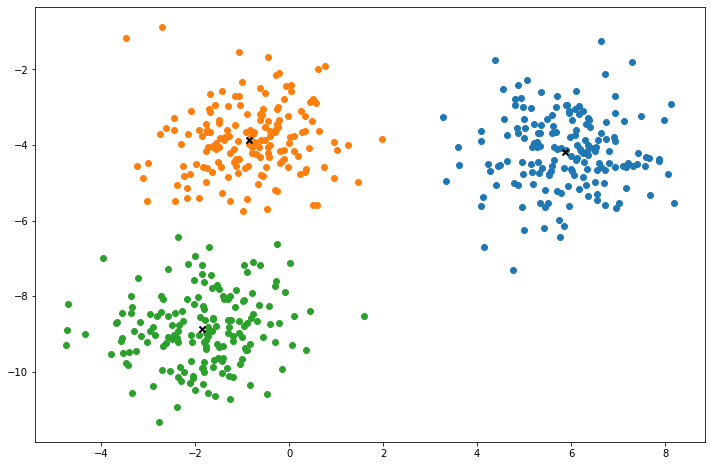

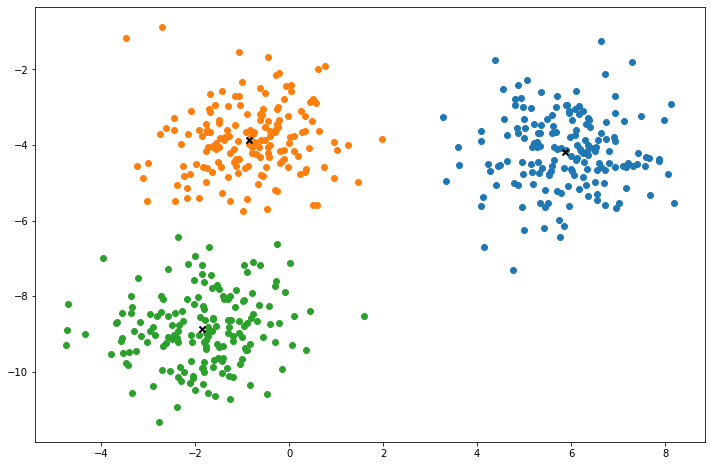

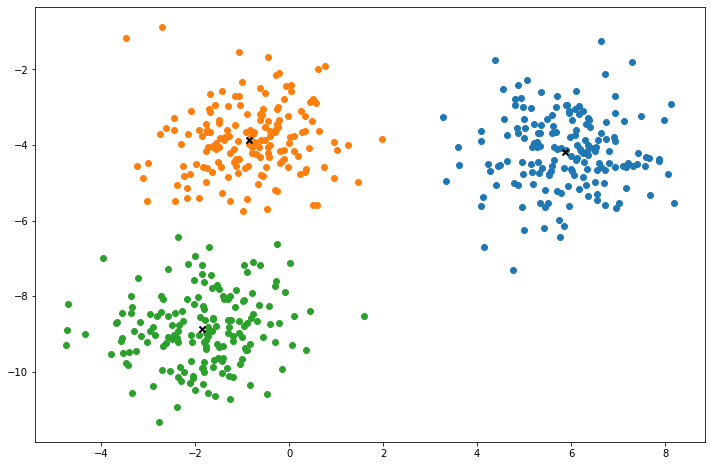

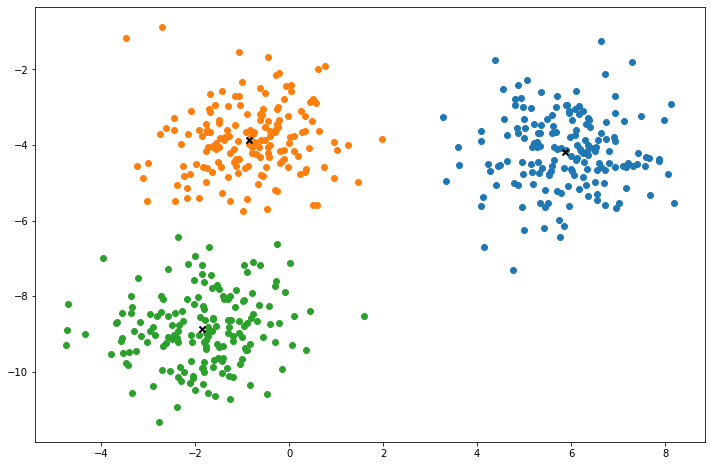

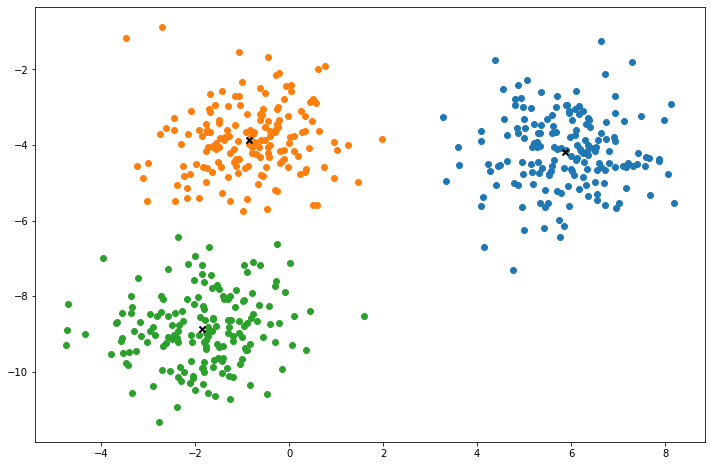

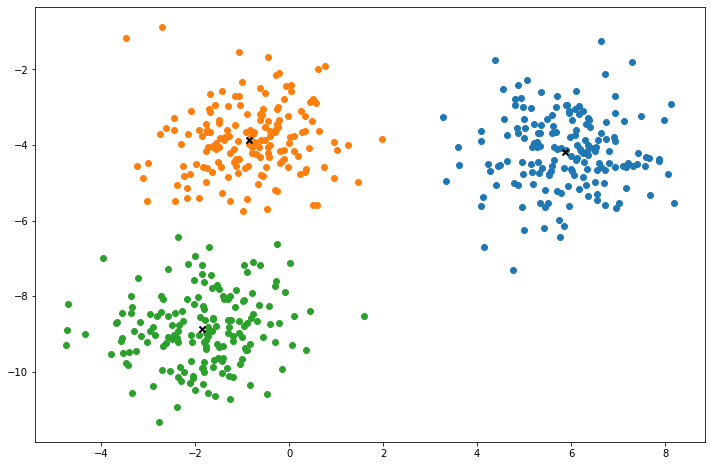

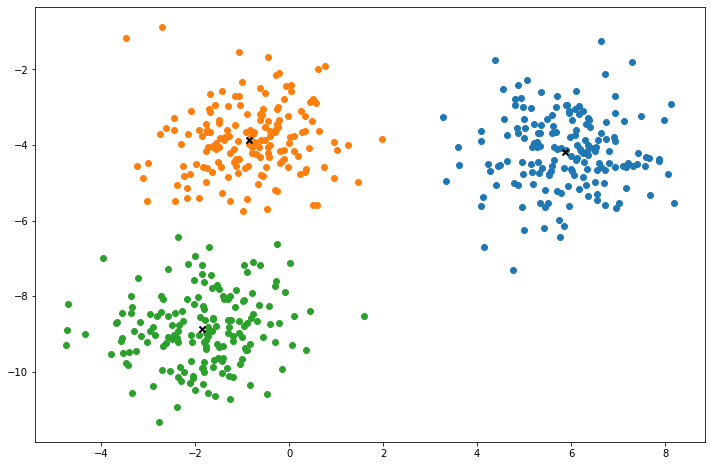

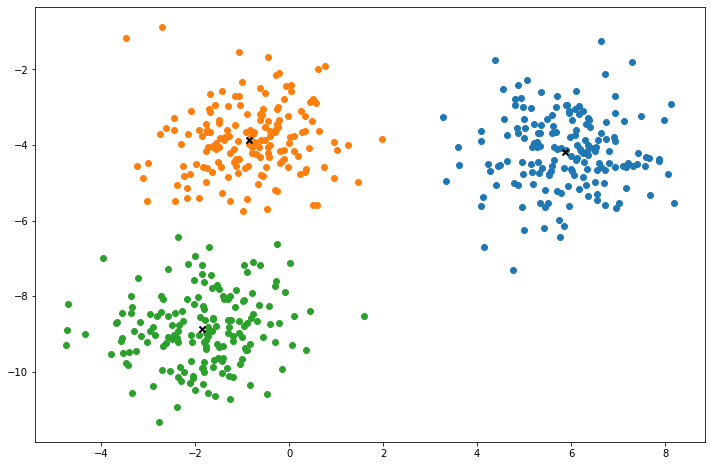

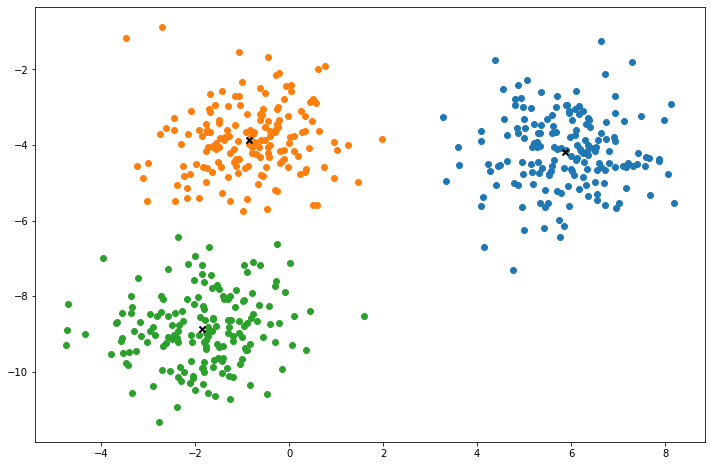

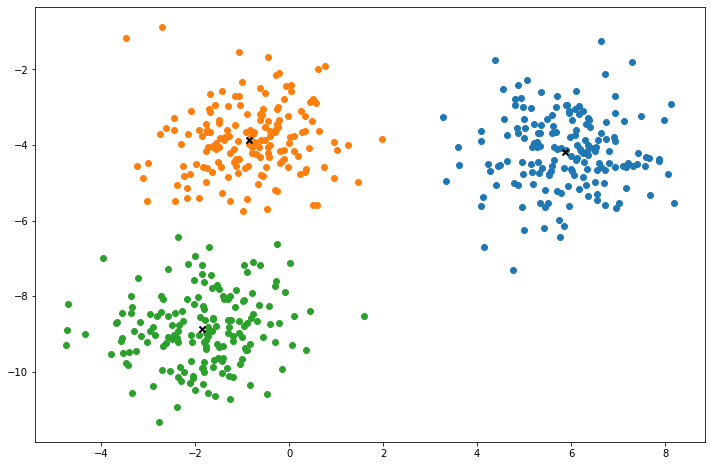

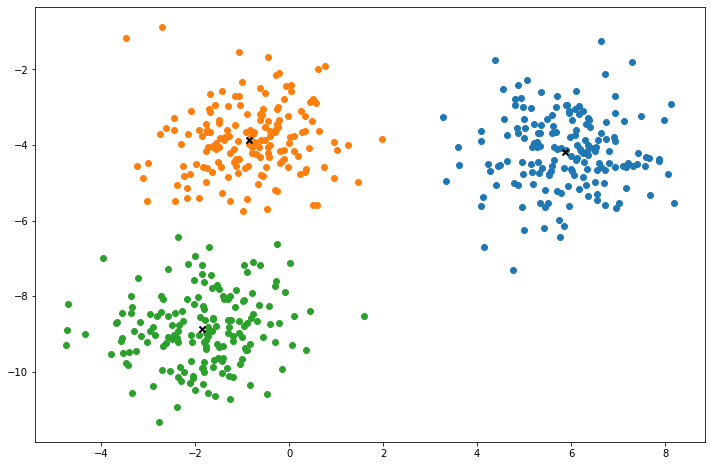

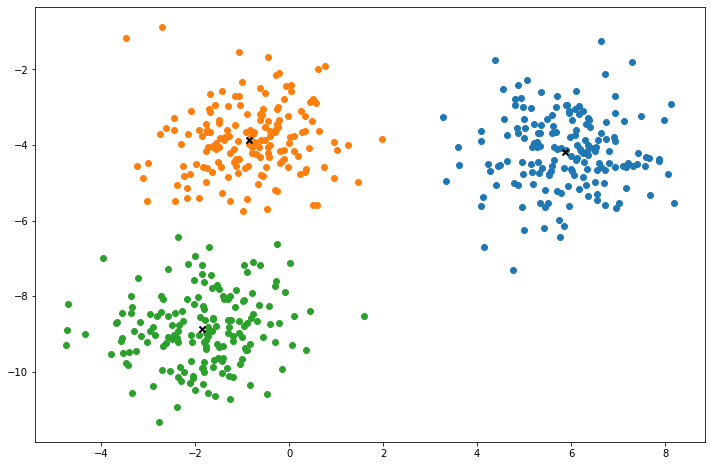

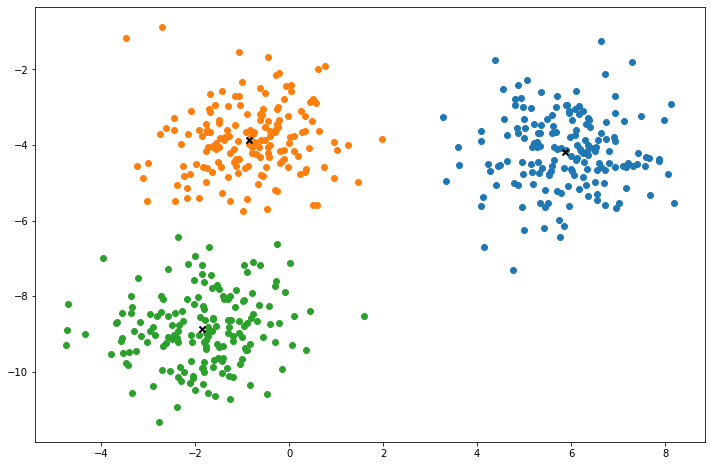

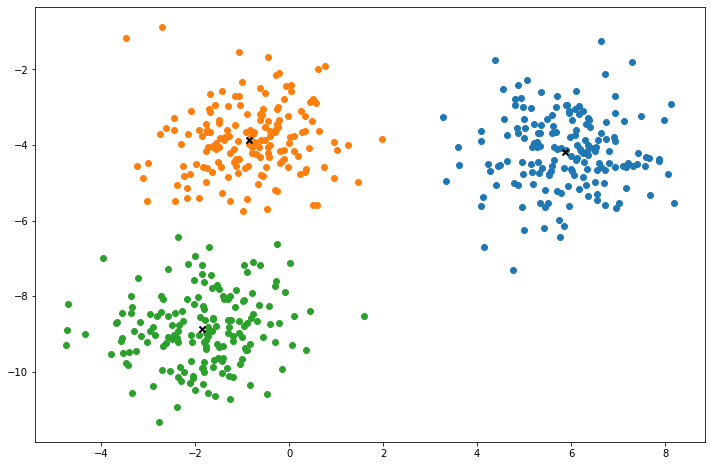

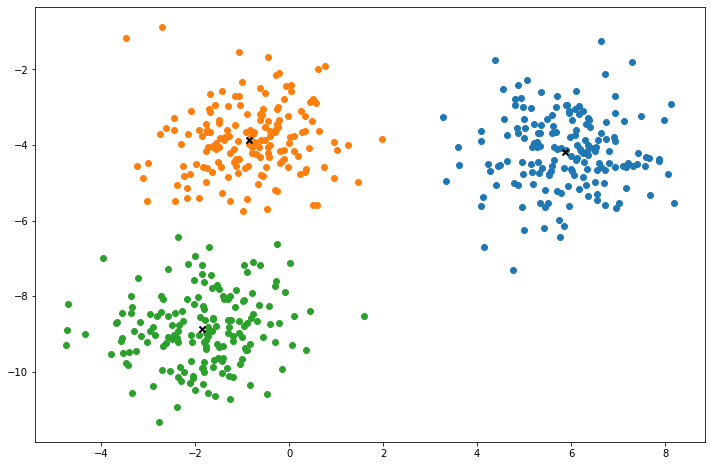

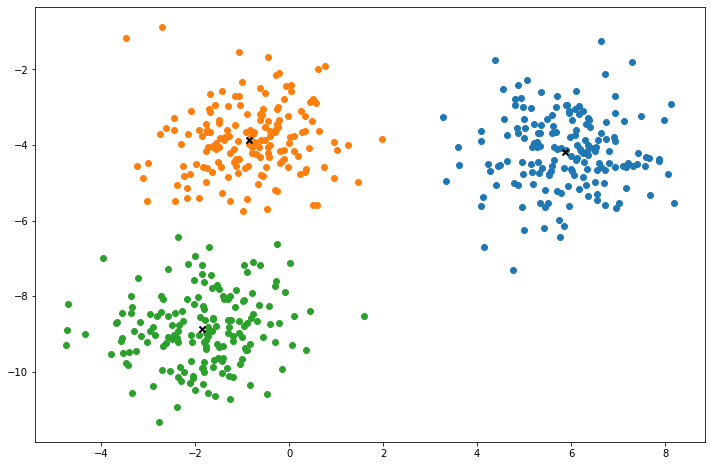

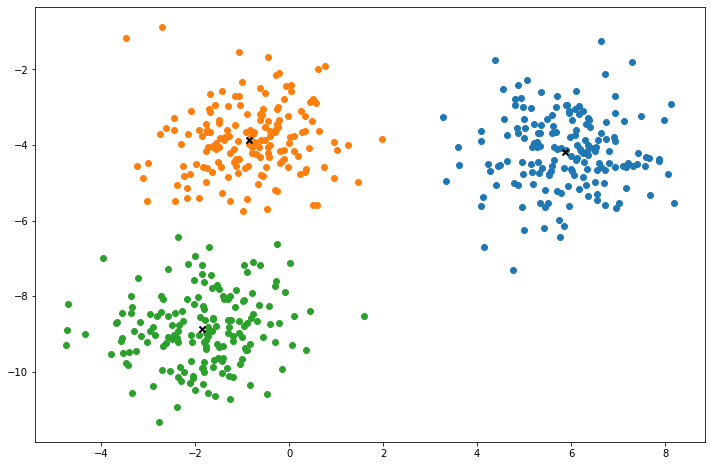

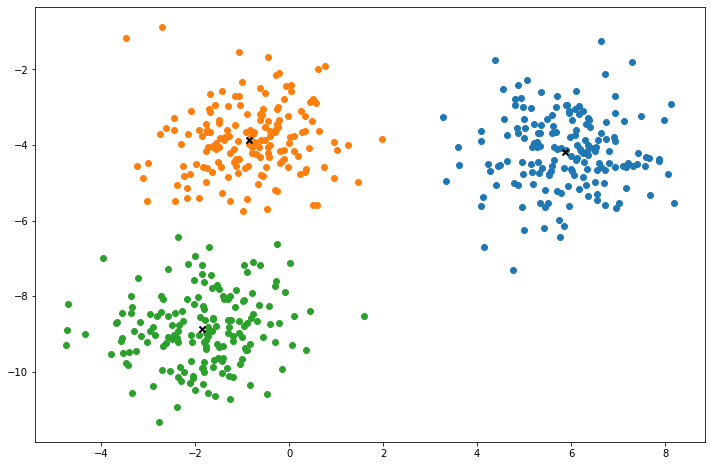

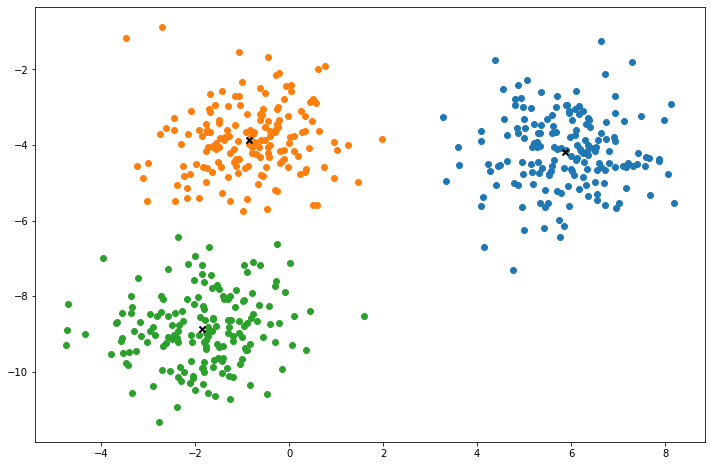

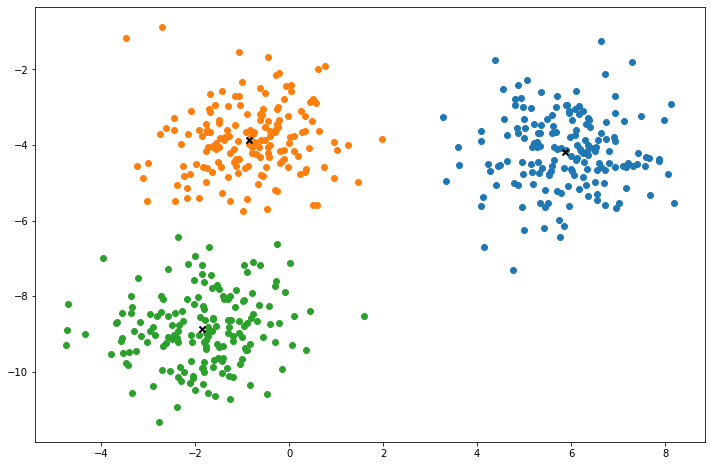

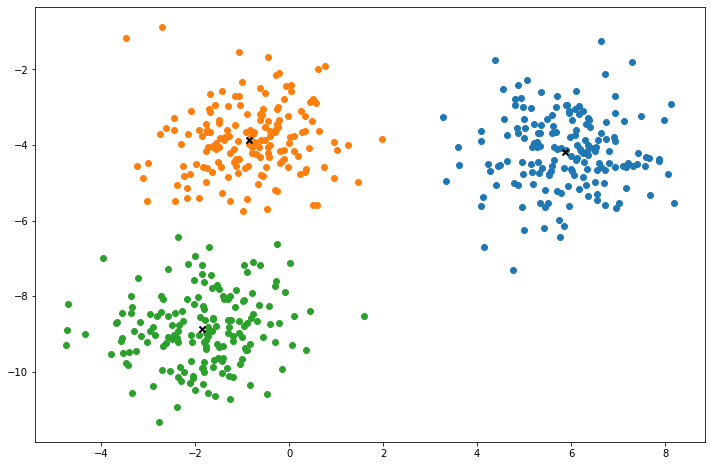

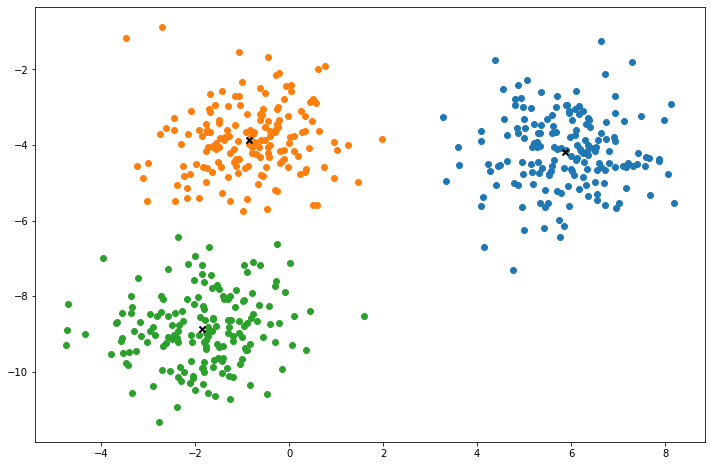

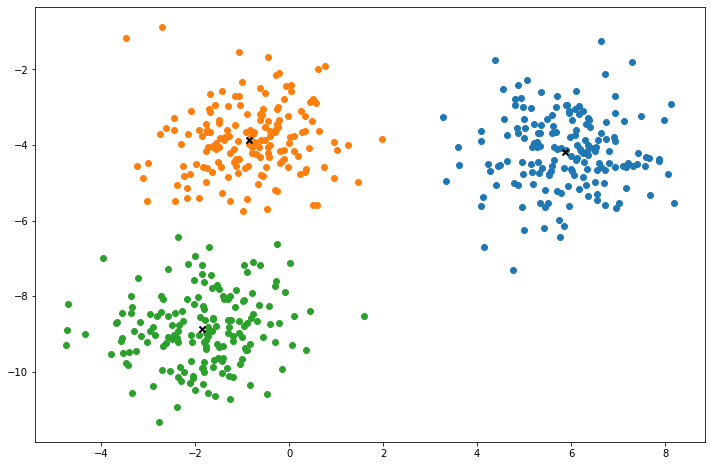

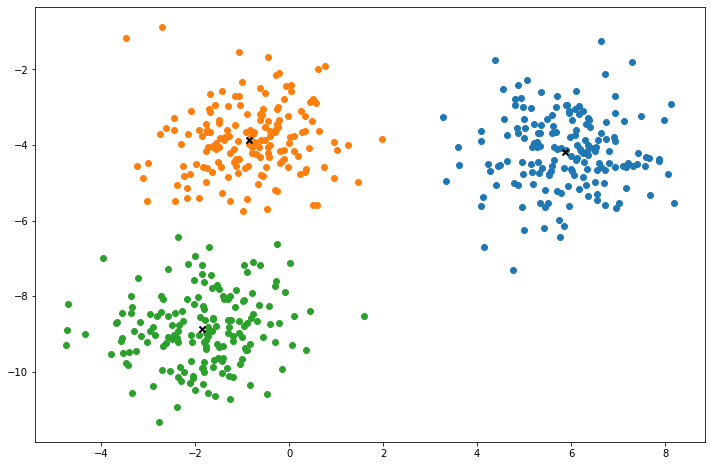

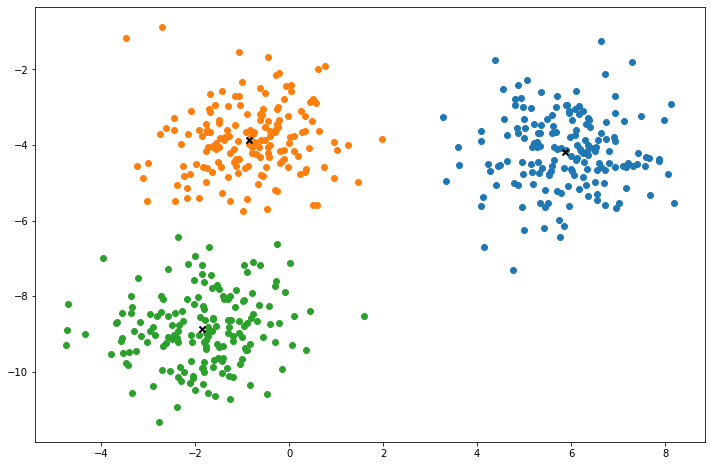

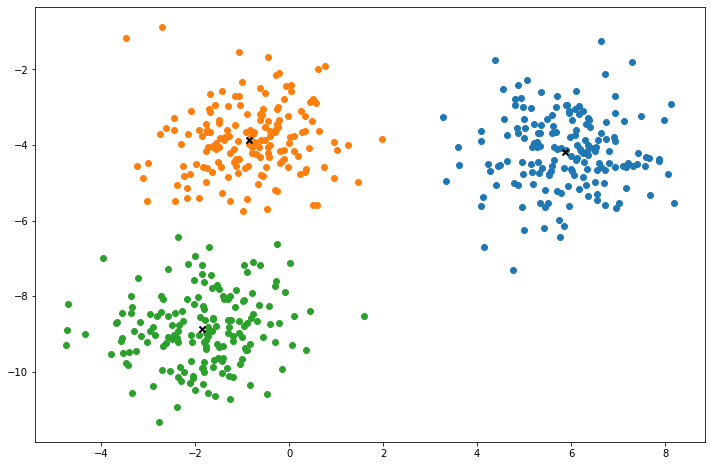

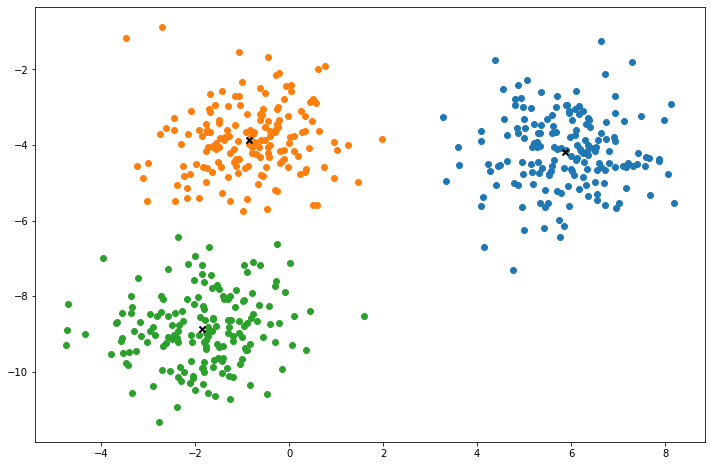

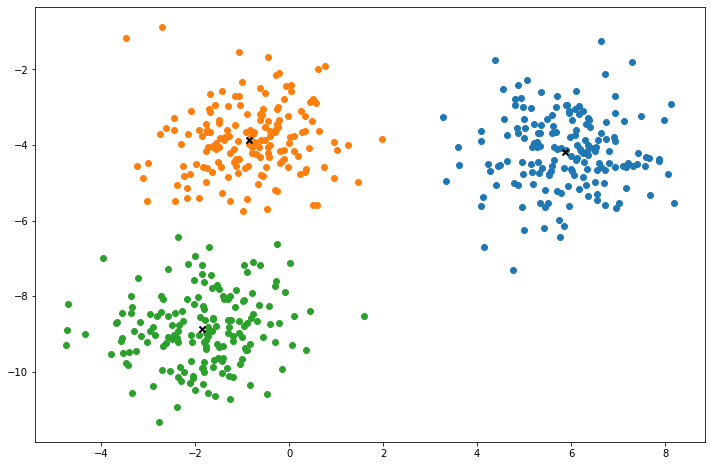

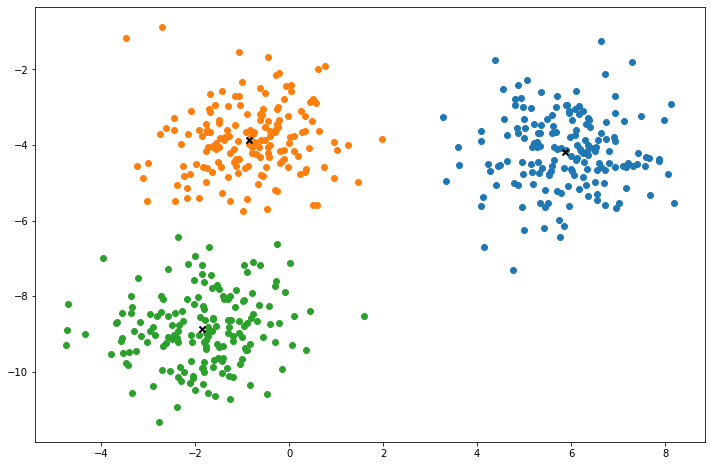

In [8]:
# testing the K-Means algorithim
if __name__ == "__main__":
    from sklearn.datasets import make_blobs
    X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)
    print(X.shape)
    
    clusters = len(np.unique(y))
    print(clusters)
    
    k = KMeans(K=clusters, max_iteration=150, plot_steps=True)
    y_pred = k.predict(X)
    
    k.plot()